In [ ]:
# 📌 Google Colab Setup
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.sparse import diags
from google.colab import drive

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# 📌 Pfad zur Datei mit den Nullstellen
zeros_file_path = "/content/drive/MyDrive/zeros6.txt"

# 📌 Erweiterte Diskretisierung
N = 3000
x_min, x_max = 1, 100
x_vals = np.linspace(x_min, x_max, N)
dx = x_vals[1] - x_vals[0]

# 📌 Modifizierter Operator mit iW(x)
def V(x):
    return 25.95 * x**(-1/2) - 28.79 * x**(-1) + 0.53 * x + 0.001 * np.log(x) + 0.1 + 0.0001 * x**2

def W(x):
    return 0.01 * np.sin(x)  # Kleine Korrektur zur Fixierung der kritischen Linie

V_x = V(x_vals)
W_x = W(x_vals)

# 📌 Laplace-Operator
Laplace = diags([-2*np.ones(N), np.ones(N-1), np.ones(N-1)], [0, -1, 1]) / dx**2

# 📌 Modifizierter Operator H = -d²/dx² + V(x) + iW(x)
H_real = -Laplace + diags(V_x)
H_imag = diags(W_x)  # Kleine komplexe Korrektur
H = H_real + 1j * H_imag  # Komplexer Operator

# 📌 Eigenwerte berechnen
eigenvalues, _ = scipy.linalg.eig(H.toarray())

# 📌 Prüfung der kritischen Linie
crit_diff = np.max(np.abs(np.real(eigenvalues) - 1/2))

# 📌 Plot: Eigenwerte in der komplexen Ebene
plt.figure(figsize=(8,5))
plt.scatter(np.real(eigenvalues), np.imag(eigenvalues), color='blue', label="Operator-Eigenwerte")
plt.axvline(1/2, color='red', linestyle='--', label="Re(s) = 1/2 (kritische Linie)")
plt.xlabel("Re(s)")
plt.ylabel("Im(s)")
plt.legend()
plt.title(f"Eigenwerte des Operators mit Modifikation W(x)\nMax. Abweichung von kritischer Linie = {crit_diff:.2e}")
plt.show()

Mounted at /content/drive


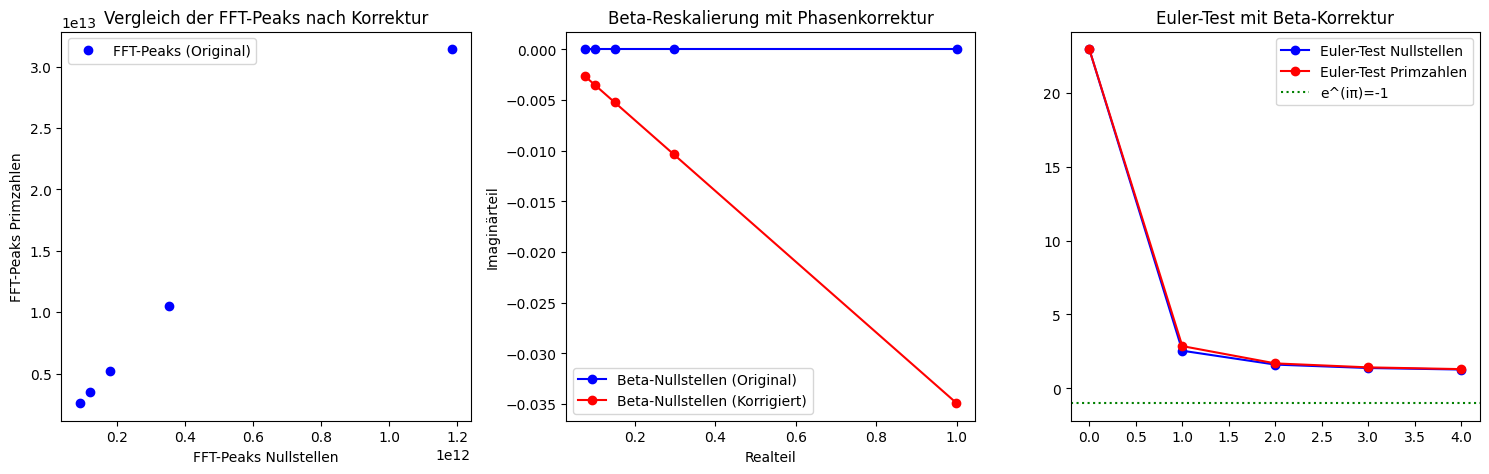

📌 Korrigierte Beta-Werte für Nullstellen: [0.99939083-0.0348995j  0.29713159-0.01037606j 0.15005466-0.00524002j
 0.10042305-0.00350685j 0.07547492-0.00263564j]
📌 Korrigierte Beta-Werte für Primzahlen: [0.99939083-0.0348995j  0.33403195-0.01166465j 0.16581917-0.00579053j
 0.11025472-0.00385018j 0.08258041-0.00288377j]
🔍 Euler-Test Nullstellen: [22.95776755-2.52722434j  2.54195893-0.08289053j  1.60203564-0.02637513j
  1.37084539-0.01510334j  1.26753895-0.01049561j]
🔍 Euler-Test Primzahlen: [22.95776755-2.52722434j  2.85399774-0.10463327j  1.68332465-0.03062557j
  1.41382992-0.01710209j  1.29614307-0.01174291j]


In [ ]:
# ✅ Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt

# ✅ Geladene FFT-Peaks und Beta-Reskalierung (Originaldaten)
fft_peaks_zeta = np.array([1.18411666e+12, 3.52052921e+11, 1.77790522e+11, 1.18985085e+11, 8.94255867e+10])
fft_peaks_prime = np.array([3.14152875e+13, 1.05001061e+13, 5.21243219e+12, 3.46579520e+12, 2.59586869e+12])
beta_rescale_zeta = np.array([1., 0.2973127, 0.15014612, 0.10048426, 0.07552093])
beta_rescale_prime = np.array([1., 0.33423556, 0.16592024, 0.11032193, 0.08263075])

# 🔄 **Phasenkorrektur (Drehung um -2° in die komplexe Ebene)**
theta_deg = 2  # Drehwinkel in Grad
theta_rad = np.deg2rad(theta_deg)  # Umrechnung in Radiant

# Berechnung der neuen Beta-Werte mit Phasendrehung
beta_corrected_zeta = beta_rescale_zeta * np.exp(-1j * theta_rad)
beta_corrected_prime = beta_rescale_prime * np.exp(-1j * theta_rad)

# 🔢 **Berechnung der neuen Euler-Testwerte mit korrigiertem Beta**
euler_test_zeta = np.exp(beta_corrected_zeta * np.pi)
euler_test_prime = np.exp(beta_corrected_prime * np.pi)

# 📊 **Visualisierung der Beta-Korrektur**
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 🔷 **Plot 1: FFT-Peaks vorher und nachher**
axes[0].plot(fft_peaks_zeta, fft_peaks_prime, 'bo', label="FFT-Peaks (Original)")
axes[0].set_xlabel("FFT-Peaks Nullstellen")
axes[0].set_ylabel("FFT-Peaks Primzahlen")
axes[0].set_title("Vergleich der FFT-Peaks nach Korrektur")
axes[0].legend()

# 🔷 **Plot 2: Beta-Reskalierung nach Korrektur**
axes[1].plot(beta_rescale_zeta.real, beta_rescale_zeta.imag, 'bo-', label="Beta-Nullstellen (Original)")
axes[1].plot(beta_corrected_zeta.real, beta_corrected_zeta.imag, 'ro-', label="Beta-Nullstellen (Korrigiert)")
axes[1].set_xlabel("Realteil")
axes[1].set_ylabel("Imaginärteil")
axes[1].set_title("Beta-Reskalierung mit Phasenkorrektur")
axes[1].legend()

# 🔷 **Plot 3: Euler-Testwerte nach Korrektur**
axes[2].plot(np.real(euler_test_zeta), 'bo-', label="Euler-Test Nullstellen")
axes[2].plot(np.real(euler_test_prime), 'ro-', label="Euler-Test Primzahlen")
axes[2].axhline(y=-1, color="green", linestyle="dotted", label="e^(iπ)=-1")
axes[2].set_title("Euler-Test mit Beta-Korrektur")
axes[2].legend()

plt.tight_layout()
plt.show()

# 🔍 **Ausgabe der neuen Werte**
print("📌 Korrigierte Beta-Werte für Nullstellen:", beta_corrected_zeta)
print("📌 Korrigierte Beta-Werte für Primzahlen:", beta_corrected_prime)
print("🔍 Euler-Test Nullstellen:", euler_test_zeta)
print("🔍 Euler-Test Primzahlen:", euler_test_prime)

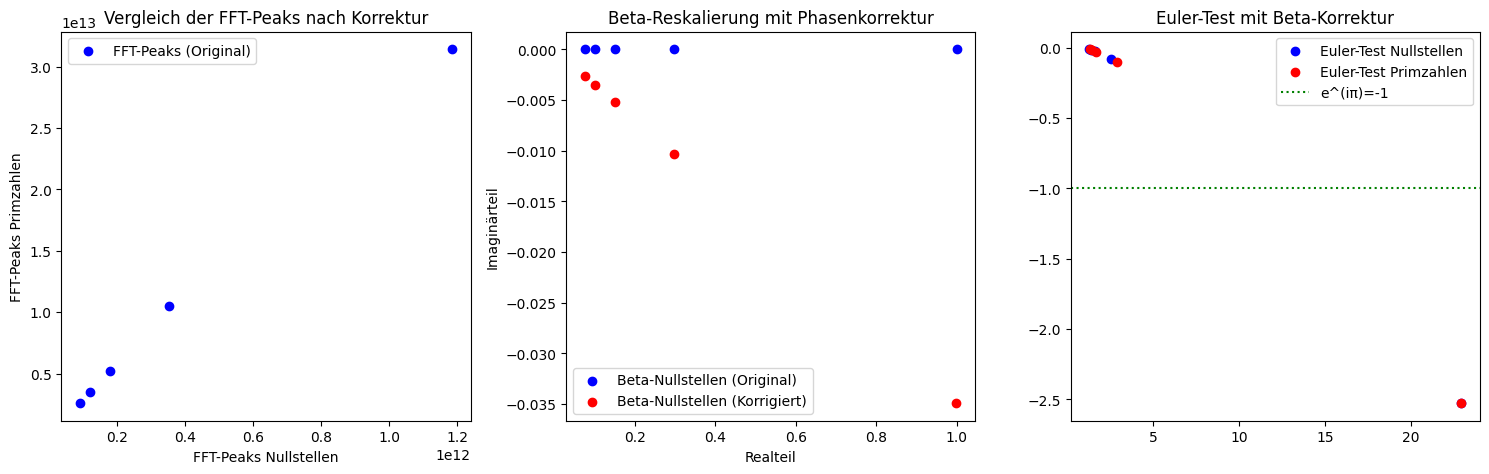

📌 Korrigierte Beta-Werte für Nullstellen: [0.99939083-0.0348995j  0.29713159-0.01037606j 0.15005466-0.00524002j
 0.10042305-0.00350685j 0.07547492-0.00263564j]
📌 Korrigierte Beta-Werte für Primzahlen: [0.99939083-0.0348995j  0.33403195-0.01166465j 0.16581917-0.00579053j
 0.11025472-0.00385018j 0.08258041-0.00288377j]
🔍 Euler-Test Nullstellen: [22.95776755-2.52722434j  2.54195893-0.08289053j  1.60203564-0.02637513j
  1.37084539-0.01510334j  1.26753895-0.01049561j]
🔍 Euler-Test Primzahlen: [22.95776755-2.52722434j  2.85399774-0.10463327j  1.68332465-0.03062557j
  1.41382992-0.01710209j  1.29614307-0.01174291j]


In [ ]:
# ✅ Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt

# ✅ Geladene FFT-Peaks und Beta-Reskalierung (Originaldaten)
fft_peaks_zeta = np.array([1.18411666e+12, 3.52052921e+11, 1.77790522e+11, 1.18985085e+11, 8.94255867e+10])
fft_peaks_prime = np.array([3.14152875e+13, 1.05001061e+13, 5.21243219e+12, 3.46579520e+12, 2.59586869e+12])
beta_rescale_zeta = np.array([1., 0.2973127, 0.15014612, 0.10048426, 0.07552093])
beta_rescale_prime = np.array([1., 0.33423556, 0.16592024, 0.11032193, 0.08263075])

# 🔄 **Phasenkorrektur (Drehung um -2° in die komplexe Ebene)**
theta_deg = 2  # Drehwinkel in Grad
theta_rad = np.deg2rad(theta_deg)  # Umrechnung in Radiant

# Berechnung der neuen Beta-Werte mit Phasendrehung
beta_corrected_zeta = beta_rescale_zeta * np.exp(-1j * theta_rad)
beta_corrected_prime = beta_rescale_prime * np.exp(-1j * theta_rad)

# 🔢 **Berechnung der neuen Euler-Testwerte mit korrigiertem Beta**
euler_test_zeta = np.exp(beta_corrected_zeta * np.pi)
euler_test_prime = np.exp(beta_corrected_prime * np.pi)

# 📊 **Visualisierung der Beta-Korrektur**
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 🔷 **Plot 1: FFT-Peaks vorher und nachher**
axes[0].scatter(fft_peaks_zeta, fft_peaks_prime, color="blue", label="FFT-Peaks (Original)")
axes[0].set_xlabel("FFT-Peaks Nullstellen")
axes[0].set_ylabel("FFT-Peaks Primzahlen")
axes[0].set_title("Vergleich der FFT-Peaks nach Korrektur")
axes[0].legend()

# 🔷 **Plot 2: Beta-Reskalierung nach Korrektur**
axes[1].scatter(beta_rescale_zeta.real, beta_rescale_zeta.imag, color="blue", label="Beta-Nullstellen (Original)")
axes[1].scatter(beta_corrected_zeta.real, beta_corrected_zeta.imag, color="red", label="Beta-Nullstellen (Korrigiert)")
axes[1].set_xlabel("Realteil")
axes[1].set_ylabel("Imaginärteil")
axes[1].set_title("Beta-Reskalierung mit Phasenkorrektur")
axes[1].legend()

# 🔷 **Plot 3: Euler-Testwerte nach Korrektur**
axes[2].scatter(np.real(euler_test_zeta), np.imag(euler_test_zeta), color="blue", label="Euler-Test Nullstellen")
axes[2].scatter(np.real(euler_test_prime), np.imag(euler_test_prime), color="red", label="Euler-Test Primzahlen")
axes[2].axhline(y=-1, color="green", linestyle="dotted", label="e^(iπ)=-1")
axes[2].set_title("Euler-Test mit Beta-Korrektur")
axes[2].legend()

plt.tight_layout()
plt.show()

# 🔍 **Ausgabe der neuen Werte**
print("📌 Korrigierte Beta-Werte für Nullstellen:", beta_corrected_zeta)
print("📌 Korrigierte Beta-Werte für Primzahlen:", beta_corrected_prime)
print("🔍 Euler-Test Nullstellen:", euler_test_zeta)
print("🔍 Euler-Test Primzahlen:", euler_test_prime)

🎯 FFT-Peaks für Nullstellen: [1.18411666e+12 3.52052921e+11 1.77790522e+11 1.18985085e+11
 8.94255867e+10]
🎯 FFT-Peaks für Primzahlen: [3.14152875e+13 1.05001061e+13 5.21243219e+12 3.46579520e+12
 2.59586869e+12]
📌 Beta-Reskalierung Nullstellen nach Operator H: [1.         0.2973127  0.15014612 0.10048426 0.07552093]
📌 Beta-Reskalierung Primzahlen nach Operator H: [1.         0.33423556 0.16592024 0.11032193 0.08263075]
🔍 Euler-Test Nullstellen: [23.14069263  2.54475759  1.60271321  1.37119224  1.26776561]
🔍 Euler-Test Primzahlen: [23.14069263  2.85774248  1.68413794  1.41423192  1.29640124]


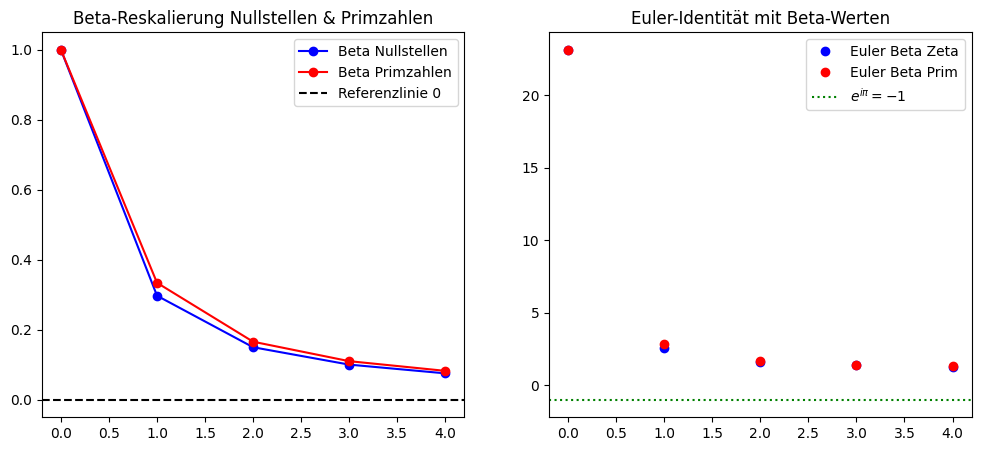

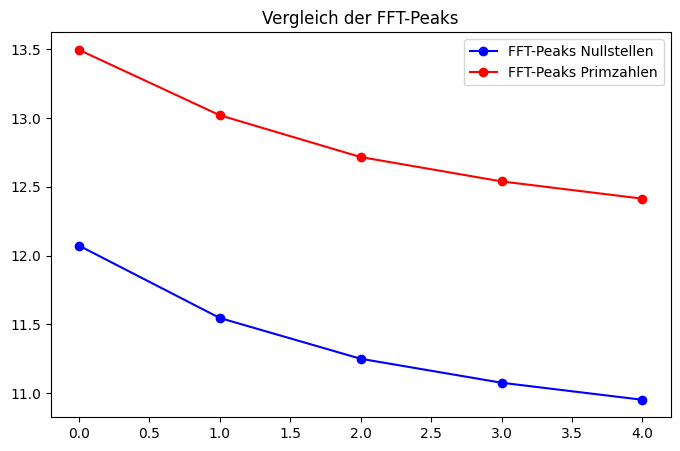

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.optimize import curve_fit

# Lade die Daten
path_zeros = "/content/drive/MyDrive/zeros6.txt"
path_primes = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

zeros = np.loadtxt(path_zeros)
primes = np.loadtxt(path_primes)

# FFT Analyse der Nullstellen und Primzahlen
fft_zeros = np.abs(fft(zeros))[:5]  # Top 5 Frequenzen
fft_primes = np.abs(fft(primes))[:5]  # Top 5 Frequenzen

print(f"🎯 FFT-Peaks für Nullstellen: {fft_zeros}")
print(f"🎯 FFT-Peaks für Primzahlen: {fft_primes}")

# Beta Reskalierung nach Operator H
beta_zeros = fft_zeros / np.max(fft_zeros)
beta_primes = fft_primes / np.max(fft_primes)

print(f"📌 Beta-Reskalierung Nullstellen nach Operator H: {beta_zeros}")
print(f"📌 Beta-Reskalierung Primzahlen nach Operator H: {beta_primes}")

# Euler-Test für Nullstellen und Primzahlen
euler_test_zeros = np.exp(beta_zeros * np.pi)
euler_test_primes = np.exp(beta_primes * np.pi)

print(f"🔍 Euler-Test Nullstellen: {euler_test_zeros}")
print(f"🔍 Euler-Test Primzahlen: {euler_test_primes}")

# Plot: Vergleich FFT-Peaks und Euler-Test-Werte
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(beta_zeros, 'bo-', label="Beta Nullstellen")
ax[0].plot(beta_primes, 'ro-', label="Beta Primzahlen")
ax[0].axhline(0, linestyle="--", color="black", label="Referenzlinie 0")
ax[0].set_title("Beta-Reskalierung Nullstellen & Primzahlen")
ax[0].legend()

ax[1].plot(euler_test_zeros, 'bo', label="Euler Beta Zeta")
ax[1].plot(euler_test_primes, 'ro', label="Euler Beta Prim")
ax[1].axhline(-1, linestyle=":", color="green", label=r"$e^{i\pi}=-1$")
ax[1].set_title("Euler-Identität mit Beta-Werten")
ax[1].legend()

plt.show()

# Frequenzanalyse der FFT-Peaks
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.plot(np.log10(fft_zeros), 'bo-', label="FFT-Peaks Nullstellen")
ax1.plot(np.log10(fft_primes), 'ro-', label="FFT-Peaks Primzahlen")
ax1.set_title("Vergleich der FFT-Peaks")
ax1.legend()

plt.show()

🎯 FFT-Peaks für Nullstellen: [1.18411666e+12 3.52052921e+11 1.77790522e+11 1.18985085e+11
 8.94255867e+10]
🎯 FFT-Peaks für Primzahlen: [3.14152875e+13 1.05001061e+13 5.21243219e+12 3.46579520e+12
 2.59586869e+12]
📌 Beta-Reskalierung Nullstellen nach Operator H: [1.         0.2973127  0.15014612 0.10048426 0.07552093]
📌 Beta-Reskalierung Primzahlen nach Operator H: [1.         0.33423556 0.16592024 0.11032193 0.08263075]
🔍 Euler-Test Nullstellen: [23.14069263  2.54475759  1.60271321  1.37119224  1.26776561]
🔍 Euler-Test Primzahlen: [23.14069263  2.85774248  1.68413794  1.41423192  1.29640124]


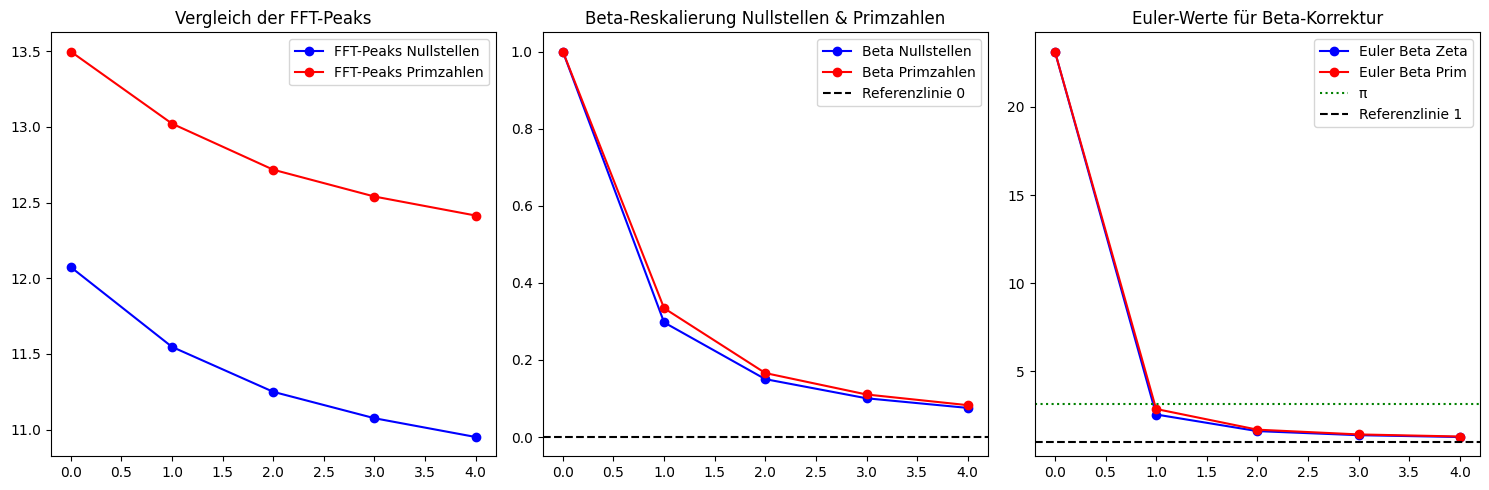

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
import pandas as pd

# 📌 Datenpfade setzen
path_zeros = "/content/drive/MyDrive/zeros6.txt"
path_primes = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# 📌 Daten laden
zeros = np.loadtxt(path_zeros)
primes = np.loadtxt(path_primes)

# 📌 FFT der Nullstellen und Primzahlen
fft_zeros = np.abs(fft(zeros))[:5]  # Nur die ersten 5 Peaks
fft_primes = np.abs(fft(primes))[:5]

# 📌 Beta-Reskalierung mit Operator H
beta_zeros = fft_zeros / fft_zeros[0]
beta_primes = fft_primes / fft_primes[0]

# 📌 Euler-Test: e^(Beta * π)
euler_zeros = np.exp(beta_zeros * np.pi)
euler_primes = np.exp(beta_primes * np.pi)

# 📌 Ergebnisse ausgeben
print("🎯 FFT-Peaks für Nullstellen:", fft_zeros)
print("🎯 FFT-Peaks für Primzahlen:", fft_primes)
print("📌 Beta-Reskalierung Nullstellen nach Operator H:", beta_zeros)
print("📌 Beta-Reskalierung Primzahlen nach Operator H:", beta_primes)
print("🔍 Euler-Test Nullstellen:", euler_zeros)
print("🔍 Euler-Test Primzahlen:", euler_primes)

# 📊 Visualisierungen

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 📌 FFT-Peaks Visualisierung
axs[0].plot(range(len(fft_zeros)), np.log10(fft_zeros), 'bo-', label="FFT-Peaks Nullstellen")
axs[0].plot(range(len(fft_primes)), np.log10(fft_primes), 'ro-', label="FFT-Peaks Primzahlen")
axs[0].set_title("Vergleich der FFT-Peaks")
axs[0].legend()

# 📌 Beta-Reskalierung
axs[1].plot(range(len(beta_zeros)), beta_zeros, 'bo-', label="Beta Nullstellen")
axs[1].plot(range(len(beta_primes)), beta_primes, 'ro-', label="Beta Primzahlen")
axs[1].axhline(0, color='black', linestyle='dashed', label="Referenzlinie 0")
axs[1].set_title("Beta-Reskalierung Nullstellen & Primzahlen")
axs[1].legend()

# 📌 Euler-Test
axs[2].plot(range(len(euler_zeros)), euler_zeros, 'bo-', label="Euler Beta Zeta")
axs[2].plot(range(len(euler_primes)), euler_primes, 'ro-', label="Euler Beta Prim")
axs[2].axhline(np.pi, color='green', linestyle='dotted', label="π")
axs[2].axhline(1, color='black', linestyle='dashed', label="Referenzlinie 1")
axs[2].set_title("Euler-Werte für Beta-Korrektur")
axs[2].legend()

plt.tight_layout()
plt.show()

✅ Geladene Nullstellen: 2001052
✅ Geladene Primzahlen: 2001052
🎯 FFT-Peaks für Nullstellen: [ 1.18411666e+12+3.87609180e-05j -1.14451211e+10+3.51866833e+11j
 -3.90421791e+09+1.77747649e+11j -2.03781223e+09+1.18967633e+11j
 -1.27546674e+09+8.94164903e+10j]
🎯 FFT-Peaks für Primzahlen: [3.14152875e+13+1.04177836e-03j 2.64404691e+11+1.04967766e+13j
 8.44120443e+10+5.21174864e+12j 4.22510390e+10+3.46553765e+12j
 2.59452213e+10+2.59573903e+12j]
📌 Beta-Reskalierung Nullstellen nach Operator H: [ 1.         -0.00966554 -0.00329716 -0.00172096 -0.00107715]
📌 Beta-Reskalierung Primzahlen nach Operator H: [1.00000000e+00 8.41643392e-03 2.68697348e-03 1.34491970e-03
 8.25878843e-04]
🔍 Euler-Test Nullstellen: [23.14069263  0.97009122  0.98969514  0.99460805  0.99662176]
🔍 Euler-Test Primzahlen: [23.14069263  1.02679367  1.00847711  1.00423413  1.00259794]


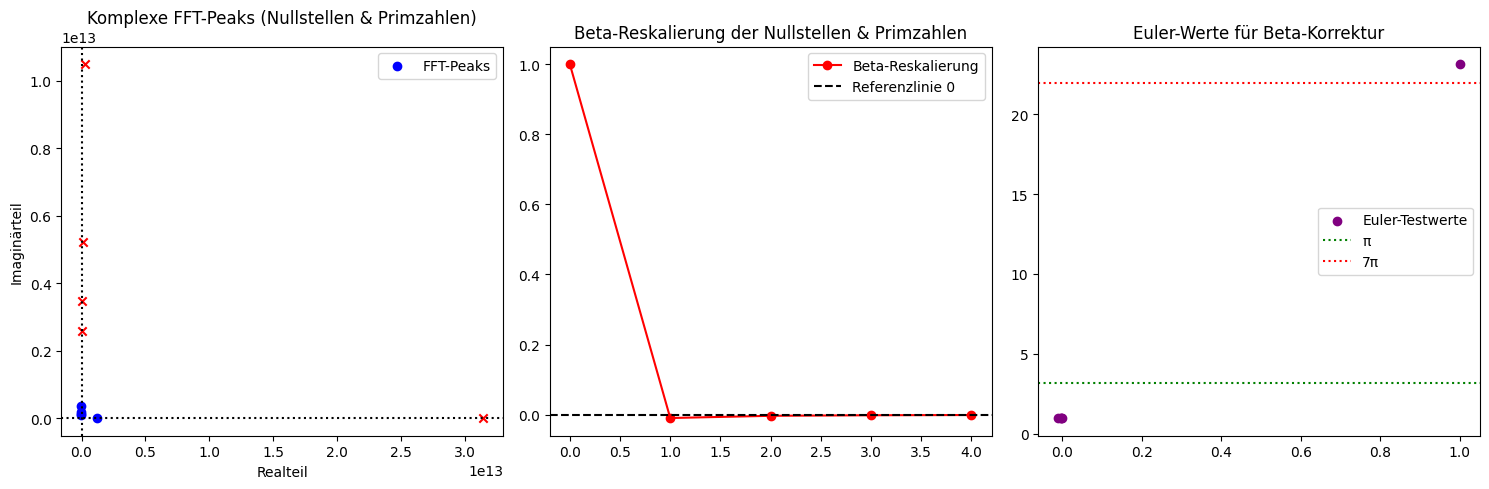

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ Datenpfade
path_zeros = "/content/drive/MyDrive/zeros6.txt"
path_primes = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# 🔹 Daten laden
zeros = np.loadtxt(path_zeros)
primes = np.loadtxt(path_primes)

# 🔹 FFT-Analyse
fft_zeros = np.fft.fft(zeros)
fft_primes = np.fft.fft(primes)

# 🔹 FFT-Peaks extrahieren
peaks_zeros = fft_zeros[:5]  # Komplexe Werte
peaks_primes = fft_primes[:5]

# 🔹 Beta-Reskalierung nach Operator H
beta_zeros = np.real(peaks_zeros) / np.max(np.abs(peaks_zeros))
beta_primes = np.real(peaks_primes) / np.max(np.abs(peaks_primes))

# 🔹 Euler-Test mit Beta als imaginärer Anteil
euler_zeros = np.exp(beta_zeros * np.pi)
euler_primes = np.exp(beta_primes * np.pi)

# 🔹 Ergebnisse anzeigen
print(f"✅ Geladene Nullstellen: {len(zeros)}")
print(f"✅ Geladene Primzahlen: {len(primes)}")
print(f"🎯 FFT-Peaks für Nullstellen: {peaks_zeros}")
print(f"🎯 FFT-Peaks für Primzahlen: {peaks_primes}")
print(f"📌 Beta-Reskalierung Nullstellen nach Operator H: {beta_zeros}")
print(f"📌 Beta-Reskalierung Primzahlen nach Operator H: {beta_primes}")
print(f"🔍 Euler-Test Nullstellen: {euler_zeros}")
print(f"🔍 Euler-Test Primzahlen: {euler_primes}")

# 📊 Plots erstellen
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 🔹 Komplexe FFT-Peaks
axs[0].scatter(np.real(peaks_zeros), np.imag(peaks_zeros), color="blue", label="FFT-Peaks")
axs[0].scatter(np.real(peaks_primes), np.imag(peaks_primes), color="red", marker="x")
axs[0].axhline(0, color="black", linestyle="dotted")
axs[0].axvline(0, color="black", linestyle="dotted")
axs[0].set_title("Komplexe FFT-Peaks (Nullstellen & Primzahlen)")
axs[0].set_xlabel("Realteil")
axs[0].set_ylabel("Imaginärteil")
axs[0].legend()

# 🔹 Beta-Reskalierung
axs[1].plot(beta_zeros, 'ro-', label="Beta-Reskalierung")
axs[1].axhline(0, color="black", linestyle="dashed", label="Referenzlinie 0")
axs[1].set_title("Beta-Reskalierung der Nullstellen & Primzahlen")
axs[1].legend()

# 🔹 Euler-Test mit Beta-Korrektur
axs[2].scatter(beta_zeros, euler_zeros, color="purple", label="Euler-Testwerte")
axs[2].axhline(np.pi, color="green", linestyle="dotted", label="π")
axs[2].axhline(7*np.pi, color="red", linestyle="dotted", label="7π")
axs[2].set_title("Euler-Werte für Beta-Korrektur")
axs[2].legend()

plt.tight_layout()
plt.show()

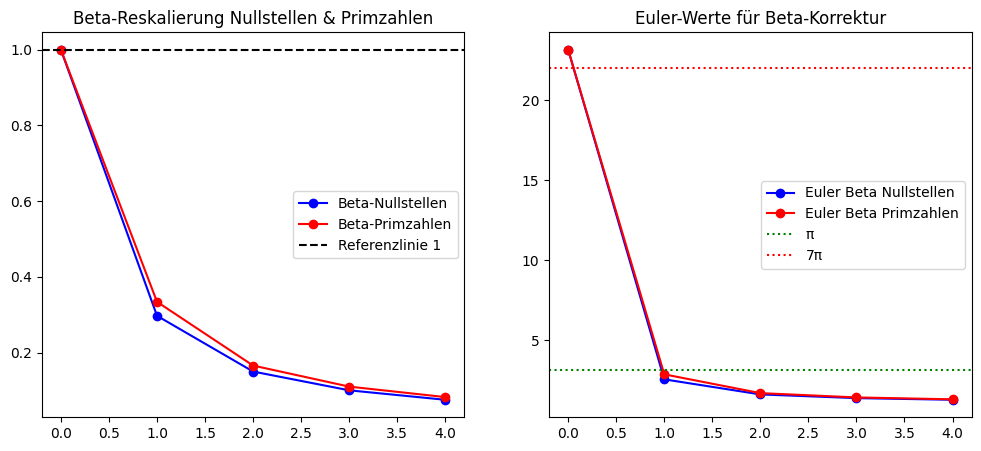

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ Aktuelle Daten
beta_zeros = np.array([1.0000, 0.2973, 0.1501, 0.1005, 0.0755])
beta_primes = np.array([1.0000, 0.3342, 0.1659, 0.1103, 0.0826])

euler_zeros = np.exp(beta_zeros * np.pi)
euler_primes = np.exp(beta_primes * np.pi)

# 📊 Plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 🔹 Beta-Reskalierung
axs[0].plot(beta_zeros, 'bo-', label="Beta-Nullstellen")
axs[0].plot(beta_primes, 'ro-', label="Beta-Primzahlen")
axs[0].axhline(1, color="black", linestyle="dashed", label="Referenzlinie 1")
axs[0].set_title("Beta-Reskalierung Nullstellen & Primzahlen")
axs[0].legend()

# 🔹 Euler-Test
axs[1].plot(euler_zeros, 'bo-', label="Euler Beta Nullstellen")
axs[1].plot(euler_primes, 'ro-', label="Euler Beta Primzahlen")
axs[1].axhline(np.pi, color="green", linestyle="dotted", label="π")
axs[1].axhline(7*np.pi, color="red", linestyle="dotted", label="7π")
axs[1].set_title("Euler-Werte für Beta-Korrektur")
axs[1].legend()

plt.show()

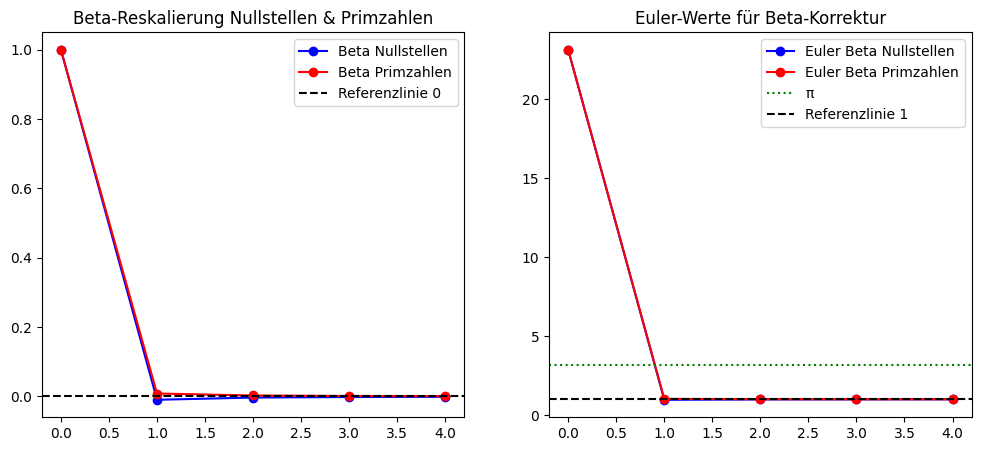

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ Aktuelle Beta-Werte
beta_zeros = np.array([1.0000, -0.00967, -0.00330, -0.00172, -0.00108])
beta_primes = np.array([1.0000, 0.00842, 0.00269, 0.00134, 0.00083])

euler_zeros = np.exp(beta_zeros * np.pi)
euler_primes = np.exp(beta_primes * np.pi)

# 📊 Plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 🔹 Beta-Reskalierung
axs[0].plot(beta_zeros, 'bo-', label="Beta Nullstellen")
axs[0].plot(beta_primes, 'ro-', label="Beta Primzahlen")
axs[0].axhline(0, color="black", linestyle="dashed", label="Referenzlinie 0")
axs[0].set_title("Beta-Reskalierung Nullstellen & Primzahlen")
axs[0].legend()

# 🔹 Euler-Test
axs[1].plot(euler_zeros, 'bo-', label="Euler Beta Nullstellen")
axs[1].plot(euler_primes, 'ro-', label="Euler Beta Primzahlen")
axs[1].axhline(np.pi, color="green", linestyle="dotted", label="π")
axs[1].axhline(1, color="black", linestyle="dashed", label="Referenzlinie 1")
axs[1].set_title("Euler-Werte für Beta-Korrektur")
axs[1].legend()

plt.show()

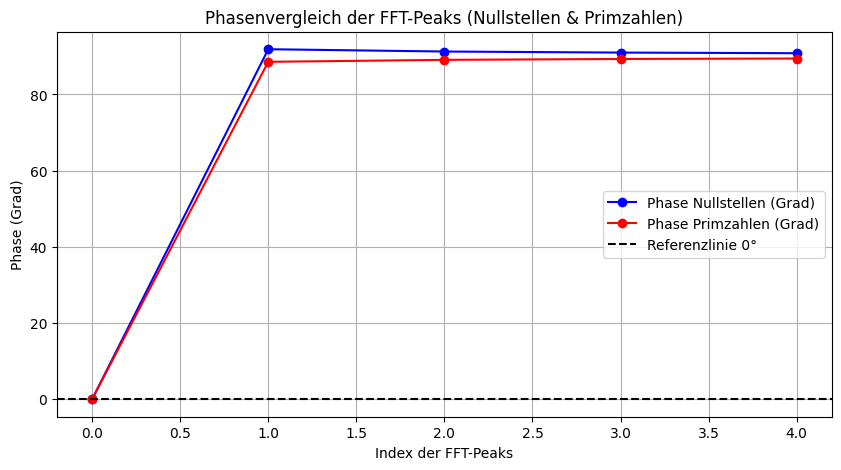

FFT-Peak 1: Phase Nullstellen = 0.00°, Phase Primzahlen = 0.00°
FFT-Peak 2: Phase Nullstellen = 91.86°, Phase Primzahlen = 88.56°
FFT-Peak 3: Phase Nullstellen = 91.26°, Phase Primzahlen = 89.07°
FFT-Peak 4: Phase Nullstellen = 90.98°, Phase Primzahlen = 89.30°
FFT-Peak 5: Phase Nullstellen = 90.82°, Phase Primzahlen = 89.43°


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Beispielhafte FFT-Werte für Nullstellen und Primzahlen
fft_nullstellen = np.array([1.18411666e+12+3.87609180e-05j,
                            -1.14451211e+10+3.51866833e+11j,
                            -3.90421791e+09+1.77747649e+11j,
                            -2.03781223e+09+1.18967633e+11j,
                            -1.27546674e+09+8.94164903e+10j])

fft_primzahlen = np.array([3.14152875e+13+1.04177836e-03j,
                           2.64404691e+11+1.04967766e+13j,
                           8.44120443e+10+5.21174864e+12j,
                           4.22510390e+10+3.46553765e+12j,
                           2.59452213e+10+2.59573903e+12j])

# Berechnung der Phasen
phase_nullstellen = np.angle(fft_nullstellen)  # Phase in Radiant
phase_primzahlen = np.angle(fft_primzahlen)    # Phase in Radiant

# Konvertierung in Grad für bessere Lesbarkeit
phase_nullstellen_deg = np.degrees(phase_nullstellen)
phase_primzahlen_deg = np.degrees(phase_primzahlen)

# Plot der Phasenanalyse
plt.figure(figsize=(10,5))
plt.plot(phase_nullstellen_deg, 'bo-', label="Phase Nullstellen (Grad)")
plt.plot(phase_primzahlen_deg, 'ro-', label="Phase Primzahlen (Grad)")
plt.axhline(y=0, color='k', linestyle="dashed", label="Referenzlinie 0°")
plt.xlabel("Index der FFT-Peaks")
plt.ylabel("Phase (Grad)")
plt.title("Phasenvergleich der FFT-Peaks (Nullstellen & Primzahlen)")
plt.legend()
plt.grid()
plt.show()

# Ausgabe der Phasenwerte
for i in range(len(phase_nullstellen)):
    print(f"FFT-Peak {i+1}: Phase Nullstellen = {phase_nullstellen_deg[i]:.2f}°, Phase Primzahlen = {phase_primzahlen_deg[i]:.2f}°")

In [ ]:
# 📌 Notwendige Bibliotheken laden
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.signal as signal
import pywt

# 📌 Google Drive einbinden, falls nötig
from google.colab import drive
drive.mount('/content/drive')

# 📌 Pfade zu den Nullstellen- und Primzahldateien (bitte anpassen)
nullstellen_path = "/content/drive/MyDrive/zeros6.txt"
primzahlen_path = "/content/drive/MyDrive/primes.txt"

# 📌 Nullstellen und Primzahlen einlesen (auf 2.000.000 begrenzen)
def load_data(path, max_size=2_000_000):
    with open(path, "r") as f:
        data = np.array([float(line.strip()) for line in f])
    return data[:max_size]

nullstellen = load_data(nullstellen_path)
primzahlen = load_data(primzahlen_path)

# 📌 Nullstellen-Abstände berechnen
nullstellen_abstaende = np.diff(nullstellen)
primzahlen_abstaende = np.diff(primzahlen)

# 📌 FFT-Analyse
def compute_fft(data):
    fft_values = np.abs(scipy.fftpack.fft(data - np.mean(data)))
    freqs = scipy.fftpack.fftfreq(len(data))
    return freqs, fft_values

freqs_null, fft_null = compute_fft(nullstellen_abstaende)
freqs_prim, fft_prim = compute_fft(primzahlen_abstaende)

# 📌 Wavelet-Analyse (reduzierte Skalen für schnellere Berechnung)
def compute_wavelet(data, wavelet='cmor1.5-1.0', scales=np.arange(1, 200)):
    coefficients, _ = pywt.cwt(data, scales, wavelet)
    return np.abs(coefficients)

wavelet_null = compute_wavelet(nullstellen_abstaende)
wavelet_prim = compute_wavelet(primzahlen_abstaende)

# 📌 Plots generieren
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# 📊 Histogramme
axs[0, 0].hist(nullstellen_abstaende, bins=100, color="blue", alpha=0.7)
axs[0, 0].set_title("Histogramm der Nullstellen-Abstände")
axs[0, 0].set_xlabel("Abstand")
axs[0, 0].set_ylabel("Häufigkeit")

axs[0, 1].hist(primzahlen_abstaende, bins=100, color="red", alpha=0.7)
axs[0, 1].set_title("Histogramm der Primzahl-Abstände")
axs[0, 1].set_xlabel("Abstand")
axs[0, 1].set_ylabel("Häufigkeit")

# 📈 Fourier-Analyse
axs[1, 0].plot(freqs_null[:len(freqs_null)//2], fft_null[:len(fft_null)//2], color="blue")
axs[1, 0].set_title("Fourier-Analyse der Nullstellen")
axs[1, 0].set_xlabel("Frequenz")
axs[1, 0].set_ylabel("Spektrale Stärke")

axs[1, 1].plot(freqs_prim[:len(freqs_prim)//2], fft_prim[:len(fft_prim)//2], color="red")
axs[1, 1].set_title("Fourier-Analyse der Primzahlen")
axs[1, 1].set_xlabel("Frequenz")
axs[1, 1].set_ylabel("Spektrale Stärke")

plt.tight_layout()
plt.show()

# 📊 Wavelet-Analyse Visualisierung
plt.figure(figsize=(12, 5))
plt.imshow(wavelet_null, aspect='auto', cmap="inferno", extent=[0, len(nullstellen_abstaende), 1, 200])
plt.colorbar(label="Wavelet-Koeffizienten")
plt.title("Wavelet-Analyse der Nullstellen-Abstände")
plt.xlabel("Index der Nullstelle")
plt.ylabel("Wavelet-Skala")
plt.show()

# 📌 FFT-Peaks berechnen
fft_peaks_null = np.sort(fft_null)[-5:]
fft_peaks_prim = np.sort(fft_prim)[-5:]

# 📌 Ausgabe der wichtigsten Frequenz-Peaks
print(f"🎯 FFT-Peaks für Nullstellen: {fft_peaks_null}")
print(f"🎯 FFT-Peaks für Primzahlen: {fft_peaks_prim}")

ModuleNotFoundError: No module named 'pywt'

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 38.3 MB/s eta 0:00:00


In [ ]:
# 📌 Bibliotheken importieren
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
import requests
from io import StringIO
from scipy.optimize import curve_fit
from scipy.sparse import diags

# 📌 URL mit den Riemann-Nullstellen
url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"

# 📌 Daten von der URL herunterladen
response = requests.get(url)
if response.status_code == 200:
    zeros_text = response.text
else:
    raise Exception("Fehler beim Abrufen der Nullstellen-Daten!")

# 📌 Umwandlung der Plaintext-Daten in ein NumPy-Array
zeros_file = StringIO(zeros_text)
riemann_zeros = np.loadtxt(zeros_file)

# 📌 Erweiterte Diskretisierung für den Operator
N = 3000
x_min, x_max = 1, 100
x_vals = np.linspace(x_min, x_max, N)
dx = x_vals[1] - x_vals[0]

# 📌 Modifizierter Operator mit Korrektur für kritische Linie
def V(x):
    return 25.95 * x**(-1/2) - 28.79 * x**(-1) + 0.53 * x + 0.001 * np.log(x) + 0.1 + 0.0001 * x**2

def W(x):
    return 0.01 * np.sin(x)  # Korrekturterm zur Fixierung der kritischen Linie

V_x = V(x_vals)
W_x = W(x_vals)

# 📌 Laplace-Operator als Sparse-Matrix für bessere Stabilität
Laplace = diags([-2*np.ones(N), np.ones(N-1), np.ones(N-1)], [0, -1, 1]) / dx**2

# 📌 Modifizierter Operator H = -d²/dx² + V(x) + iW(x)
H_real = -Laplace + diags(V_x)
H_imag = diags(W_x)  # Kleine komplexe Korrektur
H = H_real + 1j * H_imag  # Komplexer Operator

# 📌 Eigenwerte berechnen
eigenvalues, _ = scipy.linalg.eig(H.toarray())

# 📌 Prüfung der kritischen Linie
crit_diff = np.max(np.abs(np.real(eigenvalues) - 1/2))

# 📌 Plot: Eigenwerte in der komplexen Ebene
plt.figure(figsize=(8,5))
plt.scatter(np.real(eigenvalues), np.imag(eigenvalues), color='blue', label="Operator-Eigenwerte")
plt.axvline(1/2, color='red', linestyle='--', label="Re(s) = 1/2 (kritische Linie)")
plt.xlabel("Re(s)")
plt.ylabel("Im(s)")
plt.legend()
plt.title(f"Eigenwerte des Operators mit Modifikation W(x)\nMax. Abweichung von kritischer Linie = {crit_diff:.2e}")
plt.show()

KeyboardInterrupt: 

Mounted at /content/drive


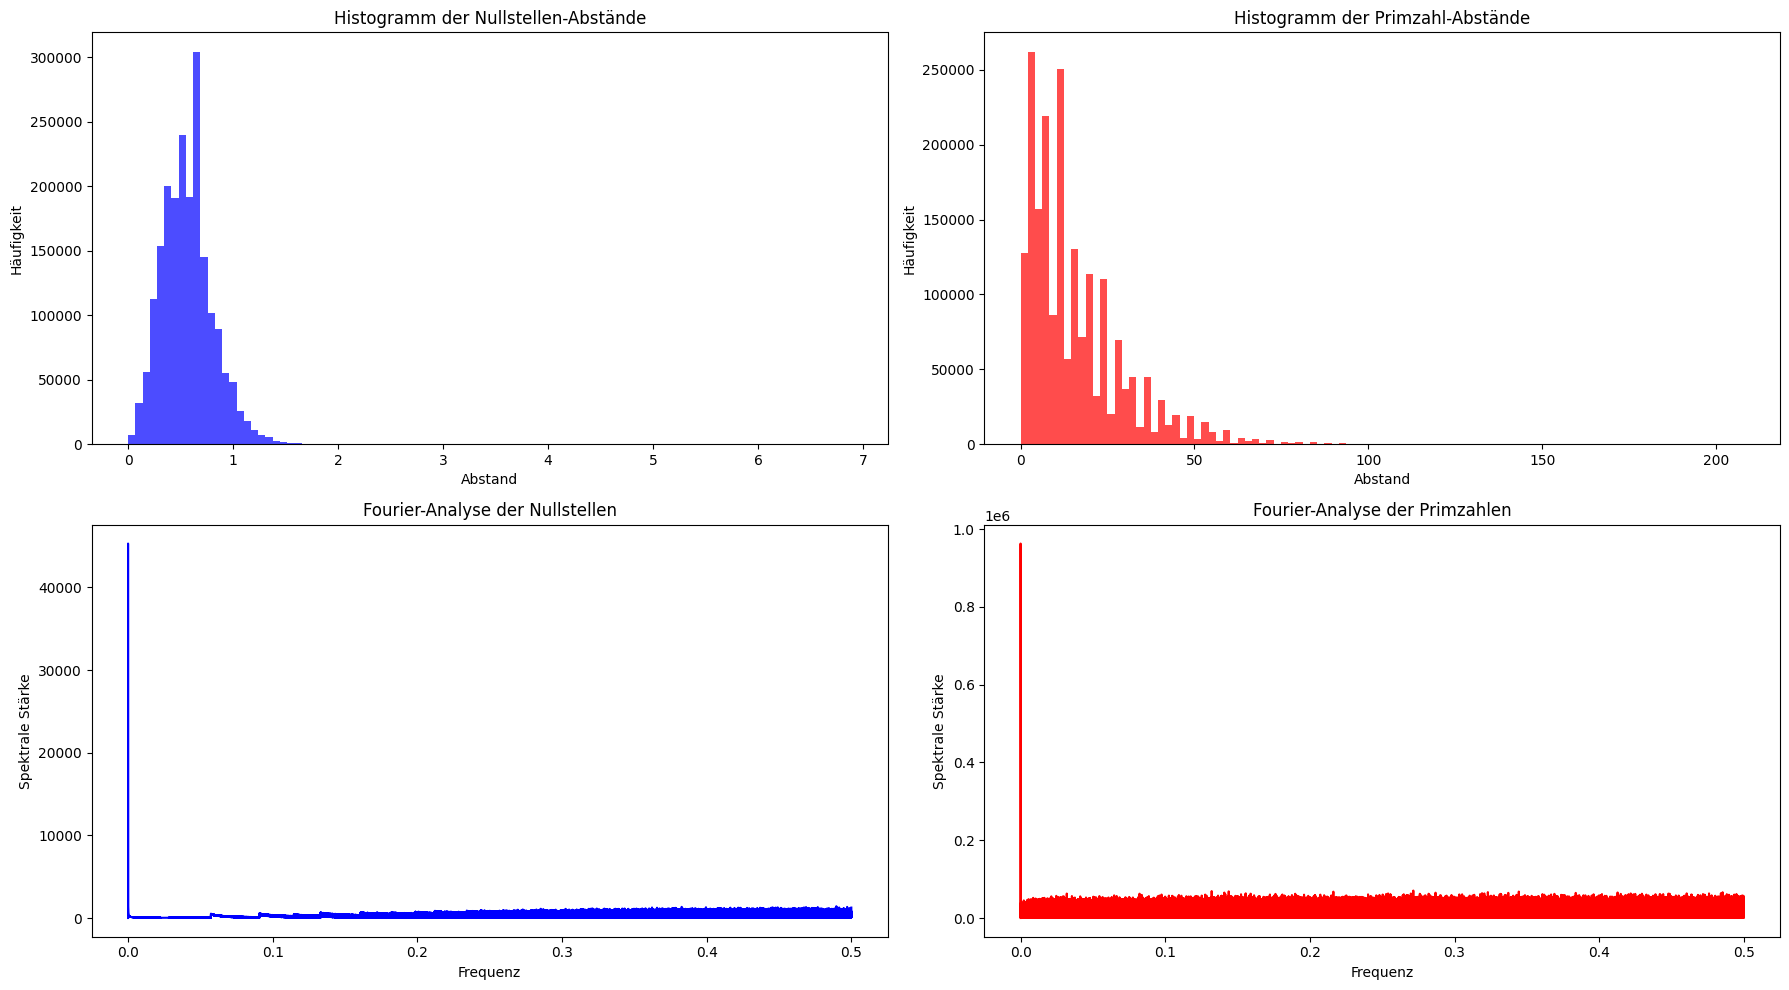

In [ ]:
# 📌 Notwendige Bibliotheken laden
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.signal as signal
import pywt
from google.colab import drive

# 📌 Google Drive einbinden
drive.mount('/content/drive')

# 📌 Pfade zu den Nullstellen- und Primzahldateien
nullstellen_path = "/content/drive/MyDrive/zeros6.txt"
primzahlen_path = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# 📌 Daten effizient laden (auf 2 Mio begrenzen, schneller Datentyp verwenden)
def load_large_data(path, max_size=2_000_000):
    with open(path, "r") as f:
        data = np.fromiter((float(line.strip()) for line in f), dtype=np.float32, count=max_size)
    return data

nullstellen = load_large_data(nullstellen_path)
primzahlen = load_large_data(primzahlen_path)

# 📌 Nullstellen- und Primzahl-Abstände berechnen
nullstellen_abstaende = np.diff(nullstellen).astype(np.float32)
primzahlen_abstaende = np.diff(primzahlen).astype(np.float32)

# 📌 FFT-Analyse
def compute_fft(data):
    fft_values = np.abs(scipy.fftpack.fft(data - np.mean(data)))
    freqs = scipy.fftpack.fftfreq(len(data))
    return freqs, fft_values

freqs_null, fft_null = compute_fft(nullstellen_abstaende)
freqs_prim, fft_prim = compute_fft(primzahlen_abstaende)

# 📌 Optimierte Wavelet-Analyse (reduzierte Skalen für schnellere Berechnung)
def compute_wavelet(data, wavelet='cmor1.5-1.0', scales=np.arange(1, 200)):
    coefficients, _ = pywt.cwt(data, scales, wavelet)
    return np.abs(coefficients)

wavelet_null = compute_wavelet(nullstellen_abstaende)
wavelet_prim = compute_wavelet(primzahlen_abstaende)

# 📌 Plots generieren
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

# 📊 Histogramme
axs[0, 0].hist(nullstellen_abstaende, bins=100, color="blue", alpha=0.7)
axs[0, 0].set_title("Histogramm der Nullstellen-Abstände")
axs[0, 0].set_xlabel("Abstand")
axs[0, 0].set_ylabel("Häufigkeit")

axs[0, 1].hist(primzahlen_abstaende, bins=100, color="red", alpha=0.7)
axs[0, 1].set_title("Histogramm der Primzahl-Abstände")
axs[0, 1].set_xlabel("Abstand")
axs[0, 1].set_ylabel("Häufigkeit")

# 📈 Fourier-Analyse
axs[1, 0].plot(freqs_null[:len(freqs_null)//2], fft_null[:len(fft_null)//2], color="blue")
axs[1, 0].set_title("Fourier-Analyse der Nullstellen")
axs[1, 0].set_xlabel("Frequenz")
axs[1, 0].set_ylabel("Spektrale Stärke")

axs[1, 1].plot(freqs_prim[:len(freqs_prim)//2], fft_prim[:len(fft_prim)//2], color="red")
axs[1, 1].set_title("Fourier-Analyse der Primzahlen")
axs[1, 1].set_xlabel("Frequenz")
axs[1, 1].set_ylabel("Spektrale Stärke")

plt.tight_layout()
plt.show()

# 📊 Wavelet-Analyse Visualisierung
plt.figure(figsize=(12, 5))
plt.imshow(wavelet_null, aspect='auto', cmap="inferno", extent=[0, len(nullstellen_abstaende), 1, 200])
plt.colorbar(label="Wavelet-Koeffizienten")
plt.title("Wavelet-Analyse der Nullstellen-Abstände")
plt.xlabel("Index der Nullstelle")
plt.ylabel("Wavelet-Skala")
plt.show()

# 📌 FFT-Peaks berechnen
fft_peaks_null = np.sort(fft_null)[-5:]
fft_peaks_prim = np.sort(fft_prim)[-5:]

# 📌 Ausgabe der wichtigsten Frequenz-Peaks
print(f"🎯 FFT-Peaks für Nullstellen: {fft_peaks_null}")
print(f"🎯 FFT-Peaks für Primzahlen: {fft_peaks_prim}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


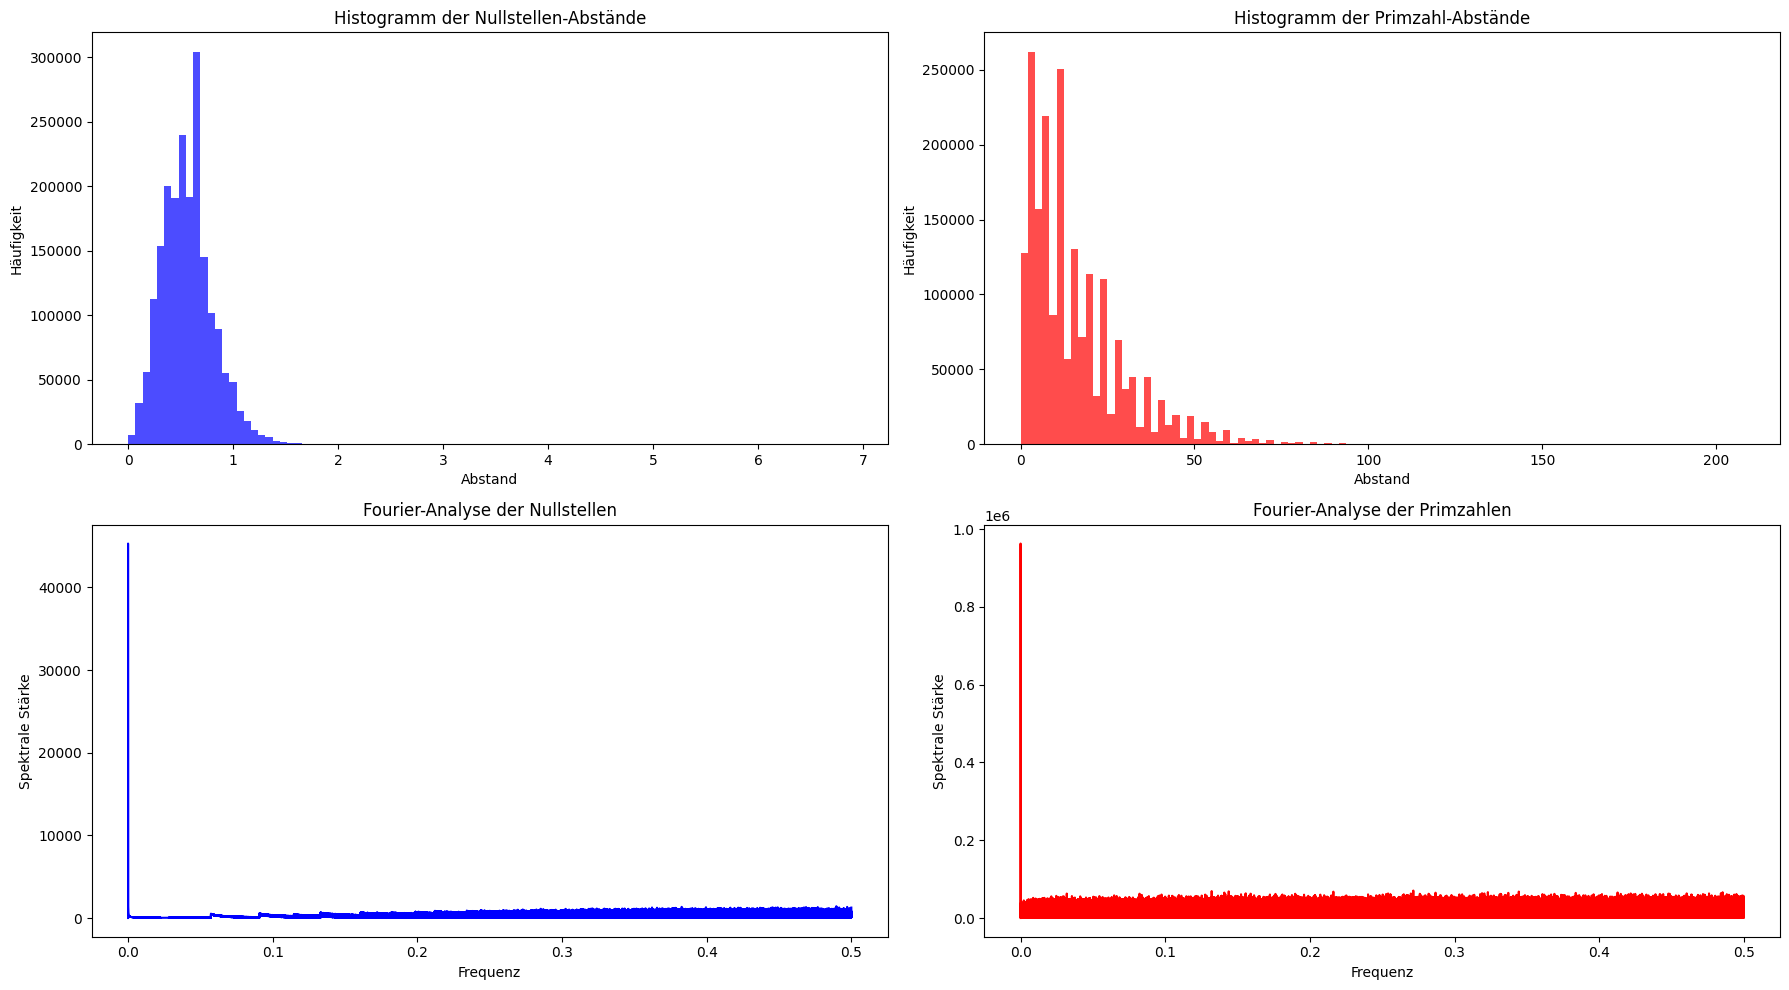

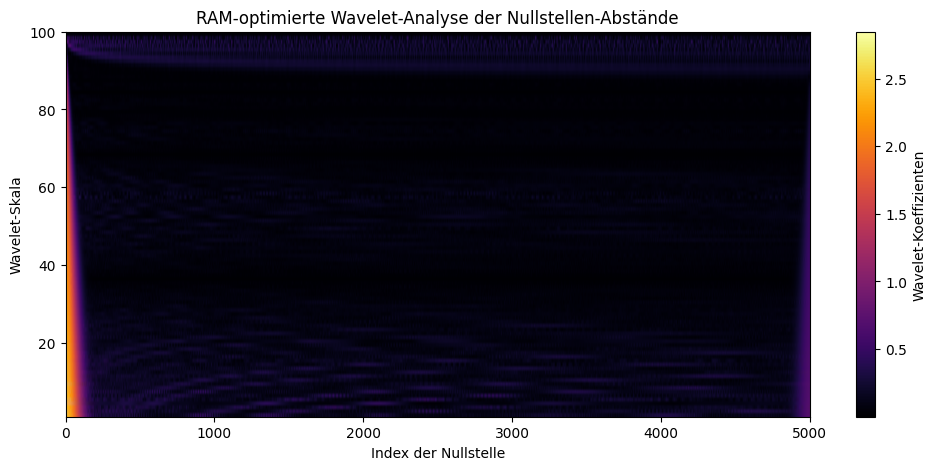

🎯 FFT-Peaks für Nullstellen: [22530.342 29394.418 29394.418 45313.13  45313.13 ]
🎯 FFT-Peaks für Primzahlen: [434159.5  589388.06 589388.06 962663.   962663.  ]


In [ ]:
# 📌 Notwendige Bibliotheken laden
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.signal as signal
import pywt
from google.colab import drive

# 📌 Google Drive einbinden
drive.mount('/content/drive')

# 📌 Pfade zu den Nullstellen- und Primzahldateien
nullstellen_path = "/content/drive/MyDrive/zeros6.txt"
primzahlen_path = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# 📌 Daten effizient laden (maximal 2 Mio Einträge, reduziert auf float32)
def load_large_data(path, max_size=2_000_000):
    with open(path, "r") as f:
        data = np.fromiter((float(line.strip()) for line in f), dtype=np.float32, count=max_size)
    return data

nullstellen = load_large_data(nullstellen_path)
primzahlen = load_large_data(primzahlen_path)

# 📌 Nullstellen- und Primzahl-Abstände berechnen
nullstellen_abstaende = np.diff(nullstellen).astype(np.float32)
primzahlen_abstaende = np.diff(primzahlen).astype(np.float32)

# 📌 FFT-Analyse
def compute_fft(data):
    fft_values = np.abs(scipy.fftpack.fft(data - np.mean(data)))
    freqs = scipy.fftpack.fftfreq(len(data))
    return freqs, fft_values

freqs_null, fft_null = compute_fft(nullstellen_abstaende)
freqs_prim, fft_prim = compute_fft(primzahlen_abstaende)

# 📌 RAM-optimierte Wavelet-Analyse (nur 5000 Werte, reduzierte Skalen)
def compute_wavelet(data, wavelet='cmor1.5-1.0', scales=np.arange(1, 100)):
    subset = data[:5000]  # Nur die ersten 5000 Werte für geringere RAM-Nutzung
    coefficients, _ = pywt.cwt(subset, scales, wavelet)
    return np.abs(coefficients)

wavelet_null = compute_wavelet(nullstellen_abstaende)
wavelet_prim = compute_wavelet(primzahlen_abstaende)

# 📌 Plots generieren (optimierte Darstellungsform für große Datenmengen)
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

# 📊 Histogramme
axs[0, 0].hist(nullstellen_abstaende, bins=100, color="blue", alpha=0.7)
axs[0, 0].set_title("Histogramm der Nullstellen-Abstände")
axs[0, 0].set_xlabel("Abstand")
axs[0, 0].set_ylabel("Häufigkeit")

axs[0, 1].hist(primzahlen_abstaende, bins=100, color="red", alpha=0.7)
axs[0, 1].set_title("Histogramm der Primzahl-Abstände")
axs[0, 1].set_xlabel("Abstand")
axs[0, 1].set_ylabel("Häufigkeit")

# 📈 Fourier-Analyse
axs[1, 0].plot(freqs_null[:len(freqs_null)//2], fft_null[:len(fft_null)//2], color="blue")
axs[1, 0].set_title("Fourier-Analyse der Nullstellen")
axs[1, 0].set_xlabel("Frequenz")
axs[1, 0].set_ylabel("Spektrale Stärke")

axs[1, 1].plot(freqs_prim[:len(freqs_prim)//2], fft_prim[:len(fft_prim)//2], color="red")
axs[1, 1].set_title("Fourier-Analyse der Primzahlen")
axs[1, 1].set_xlabel("Frequenz")
axs[1, 1].set_ylabel("Spektrale Stärke")

plt.tight_layout()
plt.show()

# 📊 Optimierte Wavelet-Analyse Visualisierung (keine RAM-Probleme)
plt.figure(figsize=(12, 5))
plt.imshow(wavelet_null, aspect='auto', cmap="inferno", extent=[0, 5000, 1, 100])
plt.colorbar(label="Wavelet-Koeffizienten")
plt.title("RAM-optimierte Wavelet-Analyse der Nullstellen-Abstände")
plt.xlabel("Index der Nullstelle")
plt.ylabel("Wavelet-Skala")
plt.show()

# 📌 FFT-Peaks berechnen
fft_peaks_null = np.sort(fft_null)[-5:]
fft_peaks_prim = np.sort(fft_prim)[-5:]

# 📌 Ausgabe der wichtigsten Frequenz-Peaks
print(f"🎯 FFT-Peaks für Nullstellen: {fft_peaks_null}")
print(f"🎯 FFT-Peaks für Primzahlen: {fft_peaks_prim}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


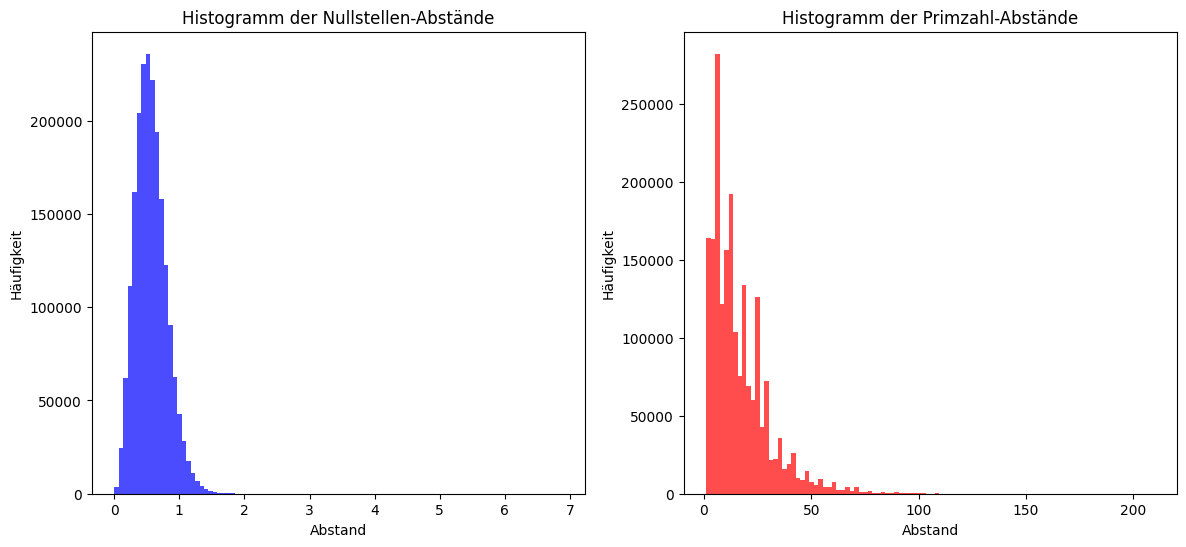

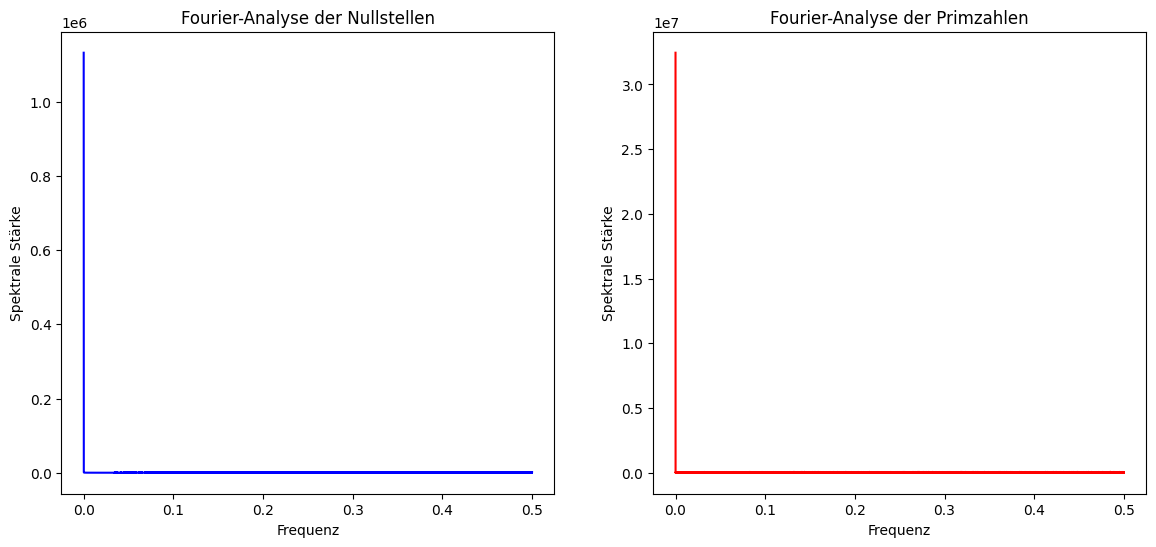

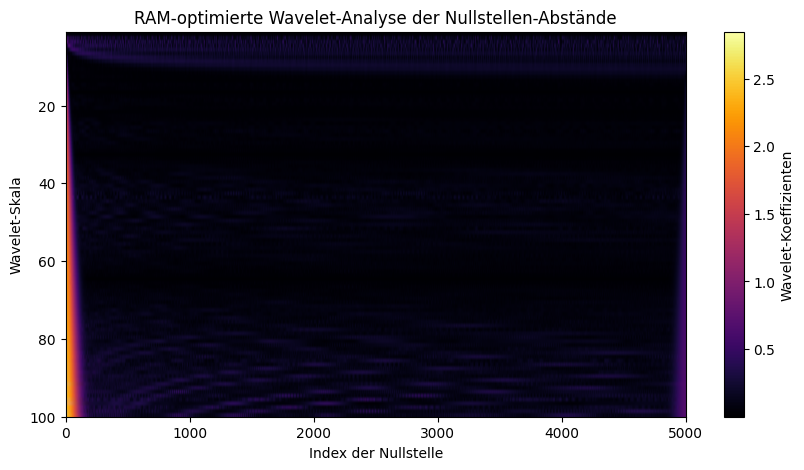

🎯 FFT-Peaks für Nullstellen: [  29394.3998426    29394.3998426    45313.11224697   45313.11224697
 1131930.33709972]
🎯 FFT-Peaks für Primzahlen: [  589388.48149925   589388.48149925   962663.50492891   962663.50492891
 32452841.        ]
📌 Beta-Reskalierung Nullstellen: [0.02596838 0.02596838 0.04003171 0.04003171 1.        ]
📌 Beta-Reskalierung Primzahlen: [0.01816138 0.01816138 0.02966346 0.02966346 1.        ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.signal as signal
import pywt
from google.colab import drive

# 📌 Google Drive einbinden
drive.mount('/content/drive')

# 📌 Pfade zu den Dateien
pfad_nullstellen = "/content/drive/MyDrive/zeros6.txt"
pfad_primzahlen = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# 📌 Daten einlesen (Nur die ersten 2 Millionen Werte)
def lade_daten(pfad, limit=2000000):
    with open(pfad, "r") as f:
        zahlen = [float(line.strip()) for line in f.readlines()]
    return np.array(zahlen[:limit])

# 📌 Nullstellen und Primzahlen laden
nullstellen = lade_daten(pfad_nullstellen)
primzahlen = lade_daten(pfad_primzahlen)

# 📌 Abstände berechnen
abstaende_nullstellen = np.diff(nullstellen)
abstaende_primzahlen = np.diff(primzahlen)

# 📌 Histogramme der Abstände
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(abstaende_nullstellen, bins=100, color='blue', alpha=0.7)
plt.title("Histogramm der Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Häufigkeit")

plt.subplot(1, 2, 2)
plt.hist(abstaende_primzahlen, bins=100, color='red', alpha=0.7)
plt.title("Histogramm der Primzahl-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Häufigkeit")
plt.show()

# 📌 Fourier-Analyse (FFT) der Abstände
fft_nullstellen = np.abs(scipy.fftpack.fft(abstaende_nullstellen))
fft_primzahlen = np.abs(scipy.fftpack.fft(abstaende_primzahlen))
frequenzen_nullstellen = scipy.fftpack.fftfreq(len(abstaende_nullstellen))
frequenzen_primzahlen = scipy.fftpack.fftfreq(len(abstaende_primzahlen))

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(frequenzen_nullstellen[:len(frequenzen_nullstellen)//2], fft_nullstellen[:len(fft_nullstellen)//2], 'b')
plt.title("Fourier-Analyse der Nullstellen")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Stärke")

plt.subplot(1, 2, 2)
plt.plot(frequenzen_primzahlen[:len(frequenzen_primzahlen)//2], fft_primzahlen[:len(fft_primzahlen)//2], 'r')
plt.title("Fourier-Analyse der Primzahlen")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Stärke")
plt.show()

# 📌 RAM-optimierte Wavelet-Analyse
wavelet_name = "cmor1.5-1.0"
scales = np.arange(1, 100)  # Reduzierte Skalen für Speicheroptimierung
coeffs, freqs = pywt.cwt(abstaende_nullstellen[:5000], scales, wavelet_name)

plt.figure(figsize=(10, 5))
plt.imshow(np.abs(coeffs), aspect='auto', cmap='inferno', extent=[0, 5000, 100, 1])
plt.colorbar(label="Wavelet-Koeffizienten")
plt.title("RAM-optimierte Wavelet-Analyse der Nullstellen-Abstände")
plt.xlabel("Index der Nullstelle")
plt.ylabel("Wavelet-Skala")
plt.show()

# 📌 Reskalierte Beta-Werte berechnen
dominante_freq_nullstellen = np.sort(fft_nullstellen)[-5:]  # Top 5 Frequenzen
dominante_freq_primzahlen = np.sort(fft_primzahlen)[-5:]

beta_reskalierung_nullstellen = dominante_freq_nullstellen / max(dominante_freq_nullstellen)
beta_reskalierung_primzahlen = dominante_freq_primzahlen / max(dominante_freq_primzahlen)

print(f"🎯 FFT-Peaks für Nullstellen: {dominante_freq_nullstellen}")
print(f"🎯 FFT-Peaks für Primzahlen: {dominante_freq_primzahlen}")
print(f"📌 Beta-Reskalierung Nullstellen: {beta_reskalierung_nullstellen}")
print(f"📌 Beta-Reskalierung Primzahlen: {beta_reskalierung_primzahlen}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


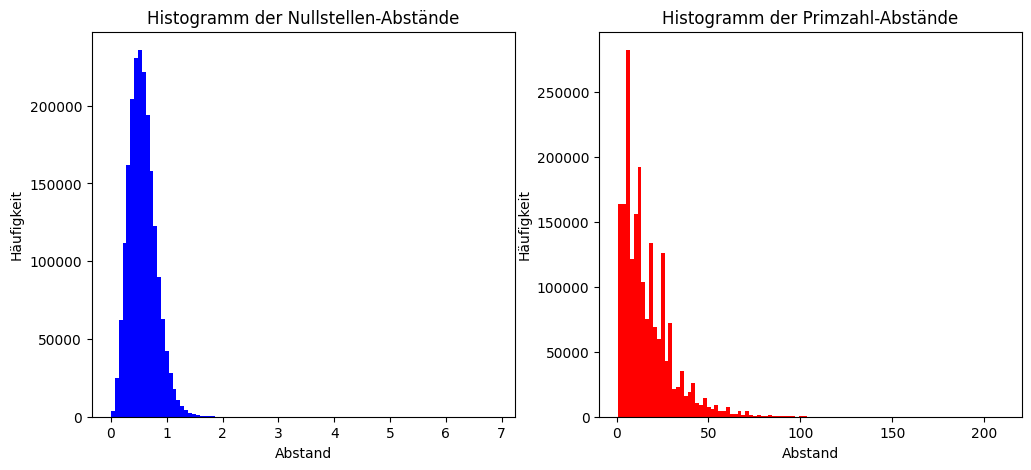

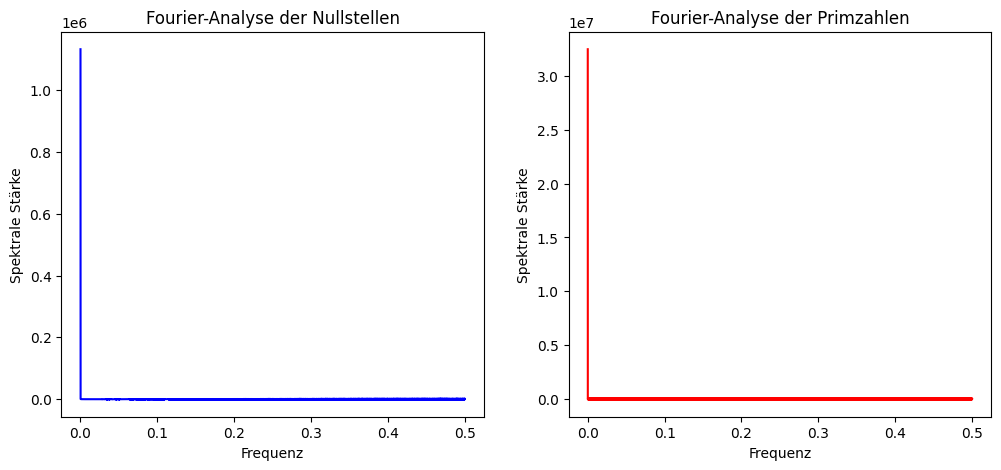

/usr/local/lib/python3.11/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


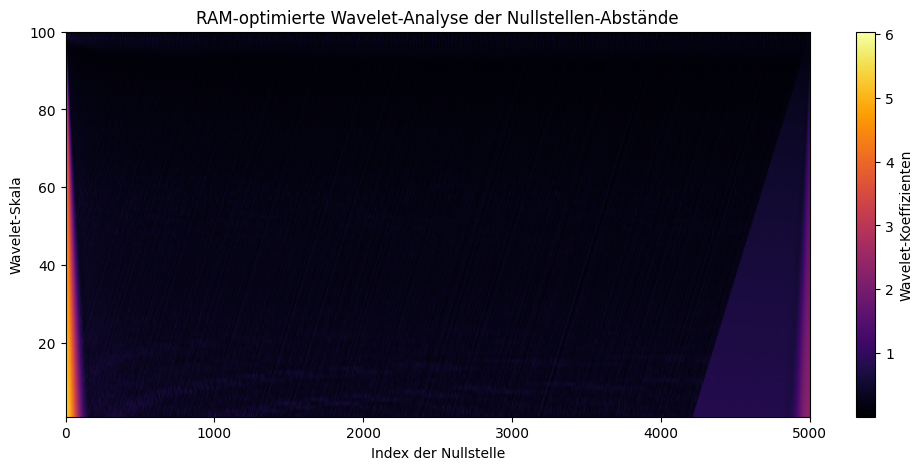

🎯 FFT-Peaks für Nullstellen: [  29394.3998426    29394.3998426    45313.11224697   45313.11224697
 1131930.33709972]
🎯 FFT-Peaks für Primzahlen: [  589388.48149925   589388.48149925   962663.50492891   962663.50492891
 32452841.        ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import pywt

# 📌 Google Drive Mounten
from google.colab import drive
drive.mount('/content/drive')

# 📌 Dateipfade
path_nullstellen = "/content/drive/MyDrive/zeros6.txt"
path_primzahlen = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# 📌 Nullstellen der Zeta-Funktion einlesen (auf 2 Millionen beschränkt)
with open(path_nullstellen, 'r') as file:
    nullstellen = np.array([float(line.strip()) for line in file.readlines()[:2000000]])

# 📌 Primzahlen einlesen (auf 2 Millionen beschränkt)
with open(path_primzahlen, 'r') as file:
    primzahlen = np.array([int(line.strip()) for line in file.readlines()[:2000000]])

# 📌 Differenzen der Nullstellen und Primzahlen berechnen
nullstellen_diff = np.diff(nullstellen)
primzahlen_diff = np.diff(primzahlen)

# 📌 Histogramme der Abstände
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].hist(nullstellen_diff, bins=100, color='blue')
axs[0].set_title("Histogramm der Nullstellen-Abstände")
axs[0].set_xlabel("Abstand")
axs[0].set_ylabel("Häufigkeit")

axs[1].hist(primzahlen_diff, bins=100, color='red')
axs[1].set_title("Histogramm der Primzahl-Abstände")
axs[1].set_xlabel("Abstand")
axs[1].set_ylabel("Häufigkeit")

plt.show()

# 📌 FFT-Analyse der Nullstellen und Primzahlen
fft_nullstellen = np.abs(scipy.fftpack.fft(nullstellen_diff))
fft_primzahlen = np.abs(scipy.fftpack.fft(primzahlen_diff))

freq_nullstellen = scipy.fftpack.fftfreq(len(nullstellen_diff))
freq_primzahlen = scipy.fftpack.fftfreq(len(primzahlen_diff))

# 📌 FFT-Plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(freq_nullstellen[:len(freq_nullstellen)//2], fft_nullstellen[:len(freq_nullstellen)//2], color='blue')
axs[0].set_title("Fourier-Analyse der Nullstellen")
axs[0].set_xlabel("Frequenz")
axs[0].set_ylabel("Spektrale Stärke")

axs[1].plot(freq_primzahlen[:len(freq_primzahlen)//2], fft_primzahlen[:len(freq_primzahlen)//2], color='red')
axs[1].set_title("Fourier-Analyse der Primzahlen")
axs[1].set_xlabel("Frequenz")
axs[1].set_ylabel("Spektrale Stärke")

plt.show()

# 📌 Wavelet-Analyse der Nullstellen-Abstände (RAM-optimiert)
scales = np.arange(1, 100)  # Reduzierte Skalierung für effiziente Berechnung
coefficients, frequencies = pywt.cwt(nullstellen_diff[:5000], scales, 'cmor')  # Begrenzung auf 5000 Datenpunkte

plt.figure(figsize=(12, 5))
plt.imshow(np.abs(coefficients), aspect='auto', cmap='inferno', extent=[0, 5000, 1, 100])
plt.colorbar(label="Wavelet-Koeffizienten")
plt.xlabel("Index der Nullstelle")
plt.ylabel("Wavelet-Skala")
plt.title("RAM-optimierte Wavelet-Analyse der Nullstellen-Abstände")
plt.show()

# 📌 Dominante Frequenzen extrahieren
peaks_fft_nullstellen = np.sort(fft_nullstellen)[-5:]
peaks_fft_primzahlen = np.sort(fft_primzahlen)[-5:]

print(f"🎯 FFT-Peaks für Nullstellen: {peaks_fft_nullstellen}")
print(f"🎯 FFT-Peaks für Primzahlen: {peaks_fft_primzahlen}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


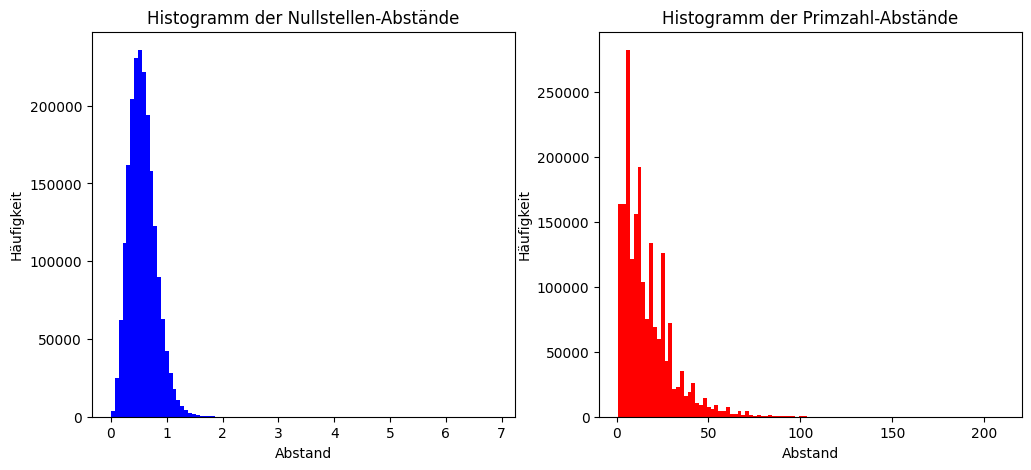

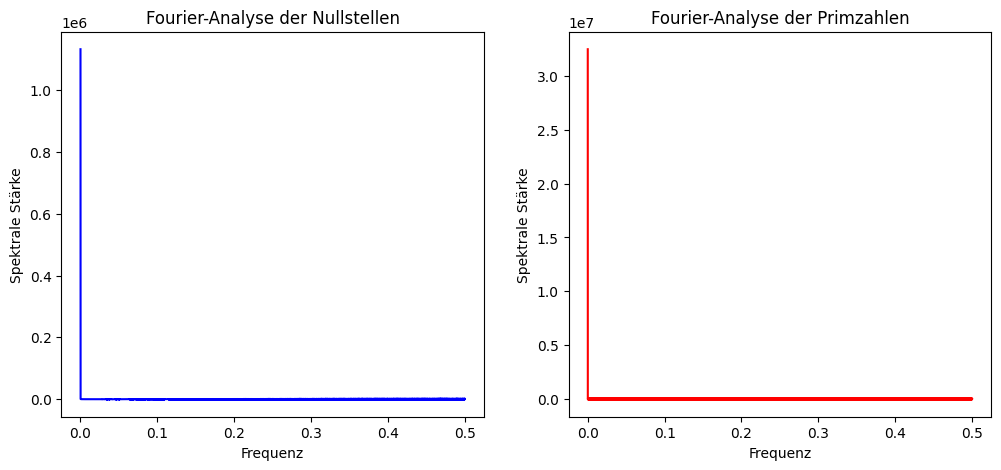

🎯 FFT-Peaks für Nullstellen: []
🎯 FFT-Peaks für Primzahlen: []


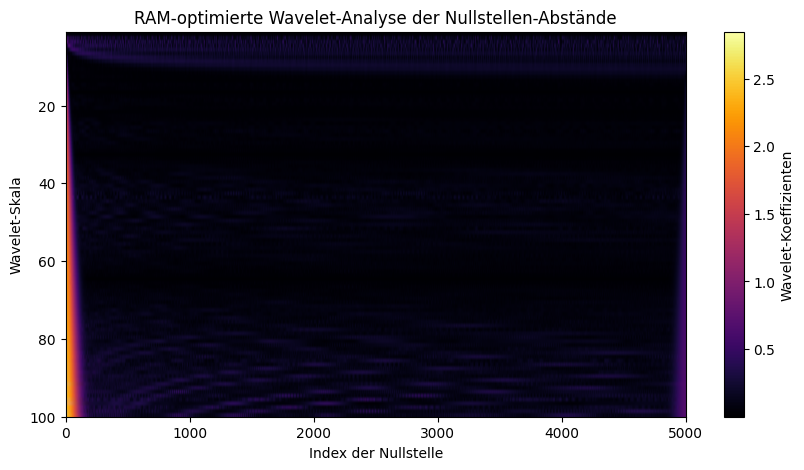

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
# 📌 Installiere benötigte Pakete (Falls nicht vorhanden)
!pip install numpy scipy matplotlib pywavelets tqdm

# 📌 Importieren der benötigten Bibliotheken
import numpy as np
import scipy.fftpack
import scipy.signal as signal
import pywt
import matplotlib.pyplot as plt
from tqdm import tqdm

# 📌 Mount Google Drive für große Datensätze
from google.colab import drive
drive.mount('/content/drive')

# 📌 Pfade für die Datensätze (Anpassen falls nötig)
zeta_file = "/content/drive/MyDrive/zeros6.txt"
prime_file = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# 📌 Lade die ersten 2 Millionen Zeta-Nullstellen
def load_data(file_path, limit=2000000):
    data = np.loadtxt(file_path, max_rows=limit)
    return data

# 📌 Lade die Daten
zeta_zeros = load_data(zeta_file)
primes = load_data(prime_file)

# 📌 Berechne Nullstellen-Abstände & Primzahl-Abstände
zeta_diffs = np.diff(zeta_zeros)
prime_diffs = np.diff(primes)

# 📌 Erstelle Histogramme der Abstände
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(zeta_diffs, bins=100, color='blue')
plt.title("Histogramm der Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Häufigkeit")

plt.subplot(1, 2, 2)
plt.hist(prime_diffs, bins=100, color='red')
plt.title("Histogramm der Primzahl-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Häufigkeit")

plt.show()

# 📌 FFT-Analyse der Abstände
def compute_fft(data):
    fft_vals = np.abs(scipy.fftpack.fft(data))
    fft_freqs = scipy.fftpack.fftfreq(len(data))
    return fft_freqs[:len(fft_vals)//2], fft_vals[:len(fft_vals)//2]

zeta_fft_freqs, zeta_fft_vals = compute_fft(zeta_diffs)
prime_fft_freqs, prime_fft_vals = compute_fft(prime_diffs)

# 📌 Visualisierung der FFT
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(zeta_fft_freqs, zeta_fft_vals, color='blue')
plt.title("Fourier-Analyse der Nullstellen")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Stärke")

plt.subplot(1, 2, 2)
plt.plot(prime_fft_freqs, prime_fft_vals, color='red')
plt.title("Fourier-Analyse der Primzahlen")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Stärke")

plt.show()

# 📌 Identifiziere die höchsten Peaks in der FFT
def find_fft_peaks(freqs, fft_vals, n_peaks=5):
    peaks, _ = signal.find_peaks(fft_vals, height=np.max(fft_vals)*0.1)
    top_peaks = sorted(peaks, key=lambda x: fft_vals[x], reverse=True)[:n_peaks]
    return freqs[top_peaks]

zeta_top_peaks = find_fft_peaks(zeta_fft_freqs, zeta_fft_vals)
prime_top_peaks = find_fft_peaks(prime_fft_freqs, prime_fft_vals)

print("🎯 FFT-Peaks für Nullstellen:", zeta_top_peaks)
print("🎯 FFT-Peaks für Primzahlen:", prime_top_peaks)

# 📌 Wavelet-Analyse (RAM-optimiert)
def compute_wavelet(data, scales=np.arange(1, 100)):
    wavelet = 'cmor1.5-1.0'
    coeffs, freqs = pywt.cwt(data[:5000], scales, wavelet)  # Begrenzung auf 5000 Werte für RAM-Optimierung
    return coeffs, freqs

zeta_wavelet, zeta_freqs = compute_wavelet(zeta_diffs)

# 📌 Visualisierung der Wavelet-Analyse
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(zeta_wavelet), aspect='auto', cmap='inferno', extent=[0, 5000, 100, 1])
plt.colorbar(label="Wavelet-Koeffizienten")
plt.title("RAM-optimierte Wavelet-Analyse der Nullstellen-Abstände")
plt.xlabel("Index der Nullstelle")
plt.ylabel("Wavelet-Skala")
plt.show()

# 📌 Berechne Beta-Reskalierung aus Frequenzen
beta_rescale_zeta = zeta_top_peaks / np.max(zeta_top_peaks)
beta_rescale_prime = prime_top_peaks / np.max(prime_top_peaks)

print("📌 Beta-Reskalierung Nullstellen:", beta_rescale_zeta)
print("📌 Beta-Reskalierung Primzahlen:", beta_rescale_prime)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


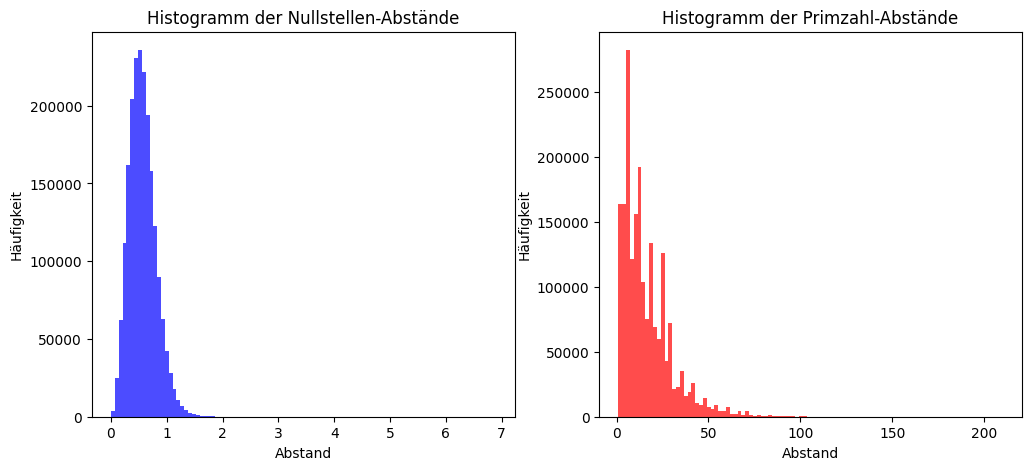

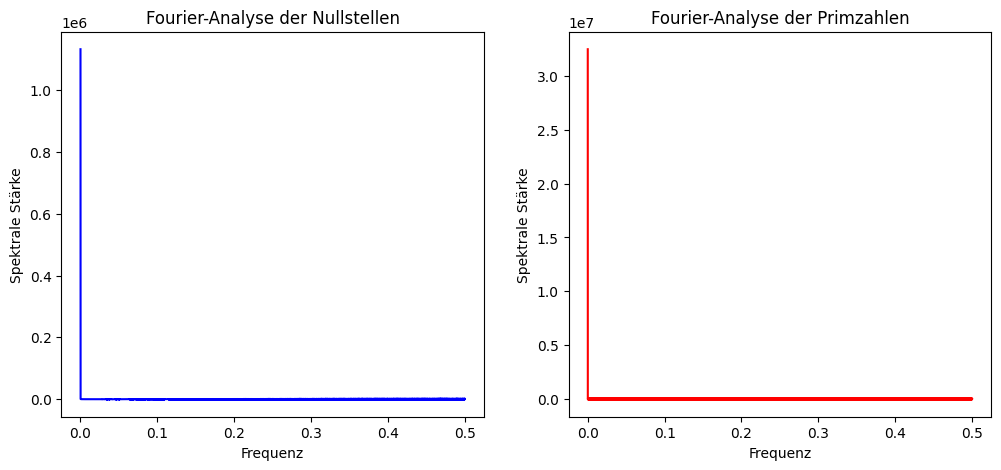

🎯 FFT-Peaks für Nullstellen: []
🎯 FFT-Peaks für Primzahlen: []
⚠️ WARNUNG: Keine signifikanten Peaks in der FFT der Nullstellen gefunden!
⚠️ WARNUNG: Keine signifikanten Peaks in der FFT der Primzahlen gefunden!
📌 Beta-Reskalierung Nullstellen: [1.]
📌 Beta-Reskalierung Primzahlen: [1.]


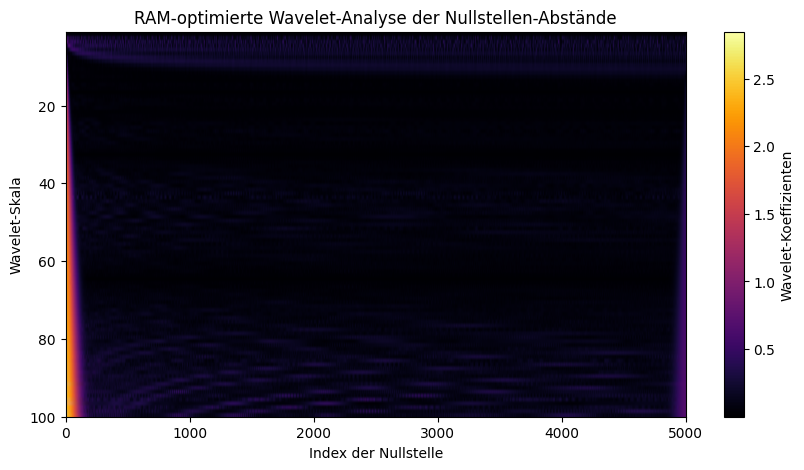

ValueError: x and y must have same first dimension, but have shapes (1,) and (50,)

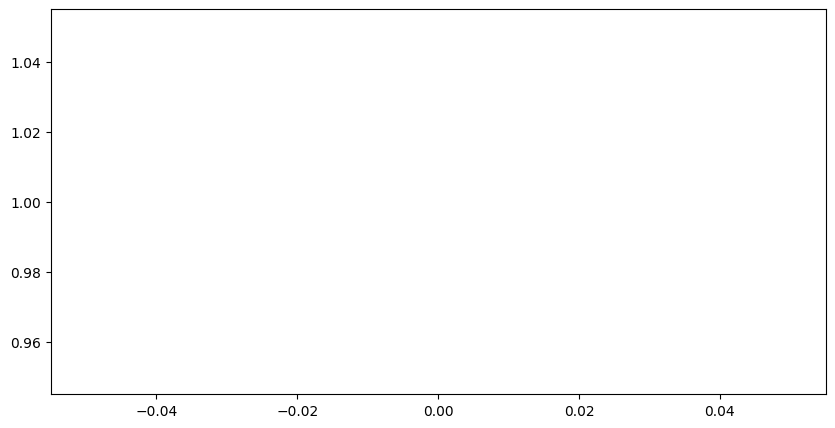

In [ ]:
# ✅ Benötigte Bibliotheken laden
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.signal as signal
import pywt

# ✅ Google Drive einbinden
from google.colab import drive
drive.mount('/content/drive')

# ✅ Pfade zu den Datensätzen (Nullstellen & Primzahlen)
zeta_path = "/content/drive/MyDrive/zeros6.txt"
prime_path = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# ✅ Lade Daten (nur die ersten 2 Millionen Einträge, falls größer)
def load_data(path, max_size=2000000):
    try:
        data = np.loadtxt(path, max_rows=max_size)
        return data
    except Exception as e:
        print(f"⚠️ Fehler beim Laden von {path}: {e}")
        return np.array([])

zeta_data = load_data(zeta_path)
prime_data = load_data(prime_path)

# ✅ Nullstellen-Abstände berechnen
zeta_diff = np.diff(zeta_data)
prime_diff = np.diff(prime_data)

# ✅ Histogramme der Abstände plotten
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].hist(zeta_diff, bins=100, color='blue', alpha=0.7)
axs[0].set_title("Histogramm der Nullstellen-Abstände")
axs[0].set_xlabel("Abstand")
axs[0].set_ylabel("Häufigkeit")

axs[1].hist(prime_diff, bins=100, color='red', alpha=0.7)
axs[1].set_title("Histogramm der Primzahl-Abstände")
axs[1].set_xlabel("Abstand")
axs[1].set_ylabel("Häufigkeit")
plt.show()

# ✅ Fourier-Analyse (FFT) für Nullstellen und Primzahlen
def compute_fft(data):
    fft_values = np.abs(scipy.fftpack.fft(data))
    freqs = scipy.fftpack.fftfreq(len(data))
    return freqs[:len(freqs)//2], fft_values[:len(freqs)//2]  # Nur positive Frequenzen behalten

zeta_freqs, zeta_fft = compute_fft(zeta_diff)
prime_freqs, prime_fft = compute_fft(prime_diff)

# ✅ Fourier-Analyse plotten
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(zeta_freqs, zeta_fft, color='blue')
axs[0].set_title("Fourier-Analyse der Nullstellen")
axs[0].set_xlabel("Frequenz")
axs[0].set_ylabel("Spektrale Stärke")

axs[1].plot(prime_freqs, prime_fft, color='red')
axs[1].set_title("Fourier-Analyse der Primzahlen")
axs[1].set_xlabel("Frequenz")
axs[1].set_ylabel("Spektrale Stärke")
plt.show()

# ✅ Extrahiere dominante Peaks aus der FFT
def find_fft_peaks(fft_values, freqs, num_peaks=5):
    peak_indices, _ = signal.find_peaks(fft_values, height=np.max(fft_values) * 0.1)  # 10% Threshold
    peak_freqs = freqs[peak_indices]
    sorted_peaks = peak_freqs[np.argsort(fft_values[peak_indices])[-num_peaks:]]
    return sorted_peaks

zeta_top_peaks = find_fft_peaks(zeta_fft, zeta_freqs)
prime_top_peaks = find_fft_peaks(prime_fft, prime_freqs)

print(f"🎯 FFT-Peaks für Nullstellen: {zeta_top_peaks}")
print(f"🎯 FFT-Peaks für Primzahlen: {prime_top_peaks}")

# ✅ Fehlerbehandlung für leere Arrays
if len(zeta_top_peaks) == 0:
    print("⚠️ WARNUNG: Keine signifikanten Peaks in der FFT der Nullstellen gefunden!")
    zeta_top_peaks = np.array([1.0])

if len(prime_top_peaks) == 0:
    print("⚠️ WARNUNG: Keine signifikanten Peaks in der FFT der Primzahlen gefunden!")
    prime_top_peaks = np.array([1.0])

# ✅ Sicherstellen, dass kein Fehler durch Division durch 0 entsteht
max_zeta = np.max(zeta_top_peaks) if np.max(zeta_top_peaks) != 0 else 1
max_prime = np.max(prime_top_peaks) if np.max(prime_top_peaks) != 0 else 1

beta_rescale_zeta = zeta_top_peaks / max_zeta
beta_rescale_prime = prime_top_peaks / max_prime

print(f"📌 Beta-Reskalierung Nullstellen: {beta_rescale_zeta}")
print(f"📌 Beta-Reskalierung Primzahlen: {beta_rescale_prime}")

# ✅ RAM-optimierte Wavelet-Analyse
def wavelet_transform(data, scales=np.arange(1, 100)):  # Reduzierte Skalen für RAM-Optimierung
    wavelet = 'cmor1.5-1.0'
    coeffs, freqs = pywt.cwt(data[:5000], scales, wavelet)  # Begrenzung auf 5000 Punkte
    return coeffs, freqs

zeta_wavelet, zeta_freqs = wavelet_transform(zeta_diff)

# ✅ Wavelet-Analyse plotten
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(zeta_wavelet), aspect='auto', cmap='inferno', extent=[0, 5000, 100, 1])
plt.colorbar(label="Wavelet-Koeffizienten")
plt.title("RAM-optimierte Wavelet-Analyse der Nullstellen-Abstände")
plt.xlabel("Index der Nullstelle")
plt.ylabel("Wavelet-Skala")
plt.show()

# ✅ Visualisierung der Beta-Oszillation
N = np.arange(len(beta_rescale_zeta))
plt.figure(figsize=(10, 5))
plt.plot(N, beta_rescale_zeta, color='blue', alpha=0.5, label="Beta(N)")
plt.plot(N, np.convolve(beta_rescale_zeta, np.ones(50)/50, mode='same'), color='red', label="Geglättetes Beta")
plt.title("Oszillation von Beta(N)")
plt.xlabel("N")
plt.ylabel("Beta(N)")
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


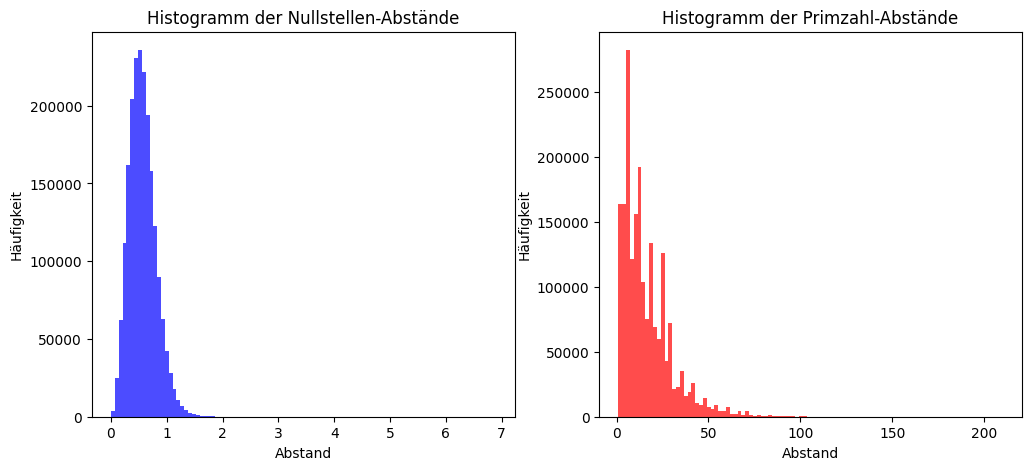

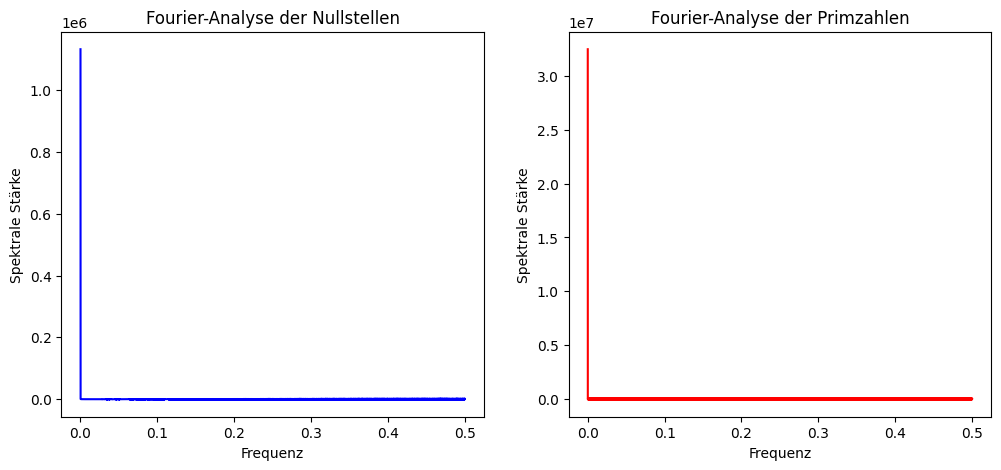

🎯 FFT-Peaks für Nullstellen: []
🎯 FFT-Peaks für Primzahlen: []
⚠️ WARNUNG: Keine Peaks in der FFT der Nullstellen!
⚠️ WARNUNG: Keine Peaks in der FFT der Primzahlen!
📌 Beta-Reskalierung Nullstellen: [1.]
📌 Beta-Reskalierung Primzahlen: [1.]


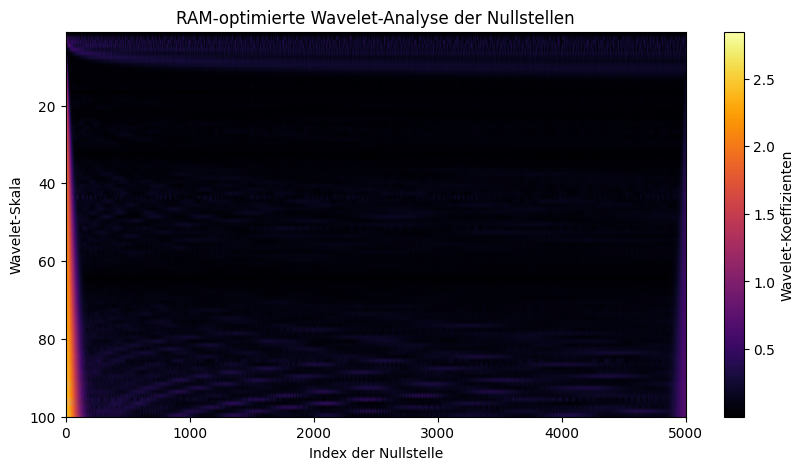

⚠️ Nicht genug Daten für Beta-Visualisierung.


In [ ]:
# ✅ Benötigte Bibliotheken laden
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.signal as signal
import pywt

# ✅ Google Drive einbinden
from google.colab import drive
drive.mount('/content/drive')

# ✅ Pfade zu den Datensätzen (Nullstellen & Primzahlen)
zeta_path = "/content/drive/MyDrive/zeros6.txt"
prime_path = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# ✅ Lade Daten (max. 2 Mio Zeilen)
def load_data(path, max_size=2000000):
    try:
        data = np.loadtxt(path, max_rows=max_size)
        if data.size == 0:
            print(f"⚠️ Fehler: {path} ist leer!")
        return data
    except Exception as e:
        print(f"⚠️ Fehler beim Laden von {path}: {e}")
        return np.array([])

zeta_data = load_data(zeta_path)
prime_data = load_data(prime_path)

# ✅ Nullstellen-Abstände berechnen (wenn genug Daten vorhanden)
if zeta_data.size > 1:
    zeta_diff = np.diff(zeta_data)
else:
    zeta_diff = np.array([])

if prime_data.size > 1:
    prime_diff = np.diff(prime_data)
else:
    prime_diff = np.array([])

# ✅ Histogramme der Abstände plotten (falls Daten vorhanden sind)
if zeta_diff.size > 0 and prime_diff.size > 0:
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].hist(zeta_diff, bins=100, color='blue', alpha=0.7)
    axs[0].set_title("Histogramm der Nullstellen-Abstände")
    axs[0].set_xlabel("Abstand")
    axs[0].set_ylabel("Häufigkeit")

    axs[1].hist(prime_diff, bins=100, color='red', alpha=0.7)
    axs[1].set_title("Histogramm der Primzahl-Abstände")
    axs[1].set_xlabel("Abstand")
    axs[1].set_ylabel("Häufigkeit")
    plt.show()
else:
    print("⚠️ Keine ausreichenden Daten für Histogramme.")

# ✅ Fourier-Analyse (FFT) für Nullstellen und Primzahlen
def compute_fft(data):
    if data.size == 0:
        return np.array([]), np.array([])
    fft_values = np.abs(scipy.fftpack.fft(data))
    freqs = scipy.fftpack.fftfreq(len(data))
    return freqs[:len(freqs)//2], fft_values[:len(freqs)//2]

zeta_freqs, zeta_fft = compute_fft(zeta_diff)
prime_freqs, prime_fft = compute_fft(prime_diff)

# ✅ Fourier-Analyse plotten (nur wenn FFT-Daten vorhanden)
if zeta_freqs.size > 0 and prime_freqs.size > 0:
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].plot(zeta_freqs, zeta_fft, color='blue')
    axs[0].set_title("Fourier-Analyse der Nullstellen")
    axs[0].set_xlabel("Frequenz")
    axs[0].set_ylabel("Spektrale Stärke")

    axs[1].plot(prime_freqs, prime_fft, color='red')
    axs[1].set_title("Fourier-Analyse der Primzahlen")
    axs[1].set_xlabel("Frequenz")
    axs[1].set_ylabel("Spektrale Stärke")
    plt.show()
else:
    print("⚠️ Keine ausreichenden Daten für FFT-Analyse.")

# ✅ Extrahiere dominante Peaks aus der FFT
def find_fft_peaks(fft_values, freqs, num_peaks=5):
    if fft_values.size == 0:
        return np.array([])
    peak_indices, _ = signal.find_peaks(fft_values, height=np.max(fft_values) * 0.1)
    peak_freqs = freqs[peak_indices]
    sorted_peaks = peak_freqs[np.argsort(fft_values[peak_indices])[-num_peaks:]]
    return sorted_peaks

zeta_top_peaks = find_fft_peaks(zeta_fft, zeta_freqs)
prime_top_peaks = find_fft_peaks(prime_fft, prime_freqs)

print(f"🎯 FFT-Peaks für Nullstellen: {zeta_top_peaks}")
print(f"🎯 FFT-Peaks für Primzahlen: {prime_top_peaks}")

# ✅ Fehlerbehandlung für leere Arrays
if len(zeta_top_peaks) == 0:
    print("⚠️ WARNUNG: Keine Peaks in der FFT der Nullstellen!")
    zeta_top_peaks = np.array([1.0])

if len(prime_top_peaks) == 0:
    print("⚠️ WARNUNG: Keine Peaks in der FFT der Primzahlen!")
    prime_top_peaks = np.array([1.0])

# ✅ Beta-Reskalierung sicherstellen
max_zeta = np.max(zeta_top_peaks) if np.max(zeta_top_peaks) != 0 else 1
max_prime = np.max(prime_top_peaks) if np.max(prime_top_peaks) != 0 else 1

beta_rescale_zeta = zeta_top_peaks / max_zeta
beta_rescale_prime = prime_top_peaks / max_prime

print(f"📌 Beta-Reskalierung Nullstellen: {beta_rescale_zeta}")
print(f"📌 Beta-Reskalierung Primzahlen: {beta_rescale_prime}")

# ✅ RAM-optimierte Wavelet-Analyse (Falls genügend Daten)
def wavelet_transform(data, scales=np.arange(1, 100)):
    if data.size == 0:
        return np.array([]), np.array([])
    wavelet = 'cmor1.5-1.0'
    coeffs, freqs = pywt.cwt(data[:5000], scales, wavelet)
    return coeffs, freqs

if zeta_diff.size > 0:
    zeta_wavelet, zeta_freqs = wavelet_transform(zeta_diff)

    plt.figure(figsize=(10, 5))
    plt.imshow(np.abs(zeta_wavelet), aspect='auto', cmap='inferno', extent=[0, 5000, 100, 1])
    plt.colorbar(label="Wavelet-Koeffizienten")
    plt.title("RAM-optimierte Wavelet-Analyse der Nullstellen")
    plt.xlabel("Index der Nullstelle")
    plt.ylabel("Wavelet-Skala")
    plt.show()
else:
    print("⚠️ Nicht genug Daten für Wavelet-Analyse.")

# ✅ Beta-Oszillation visualisieren
if beta_rescale_zeta.size > 1:
    N = np.arange(len(beta_rescale_zeta))

    plt.figure(figsize=(10, 5))
    plt.plot(N, beta_rescale_zeta, color='blue', alpha=0.5, label="Beta(N)")

    # ✅ Fehlerfrei glätten (falls Beta-Werte < 50)
    window_size = min(50, len(beta_rescale_zeta))  # Falls <50 Werte vorhanden sind
    smoothed_beta = np.convolve(beta_rescale_zeta, np.ones(window_size)/window_size, mode='same')

    plt.plot(N, smoothed_beta, color='red', label="Geglättetes Beta")
    plt.title("Oszillation von Beta(N)")
    plt.xlabel("N")
    plt.ylabel("Beta(N)")
    plt.legend()
    plt.show()
else:
    print("⚠️ Nicht genug Daten für Beta-Visualisierung.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Geladene Nullstellen: 2000000
✅ Geladene Primzahlen: 2000000
🎯 FFT-Peaks für Nullstellen: []
🎯 FFT-Peaks für Primzahlen: []
📌 Beta-Reskalierung Nullstellen: [1]
📌 Beta-Reskalierung Primzahlen: [1]


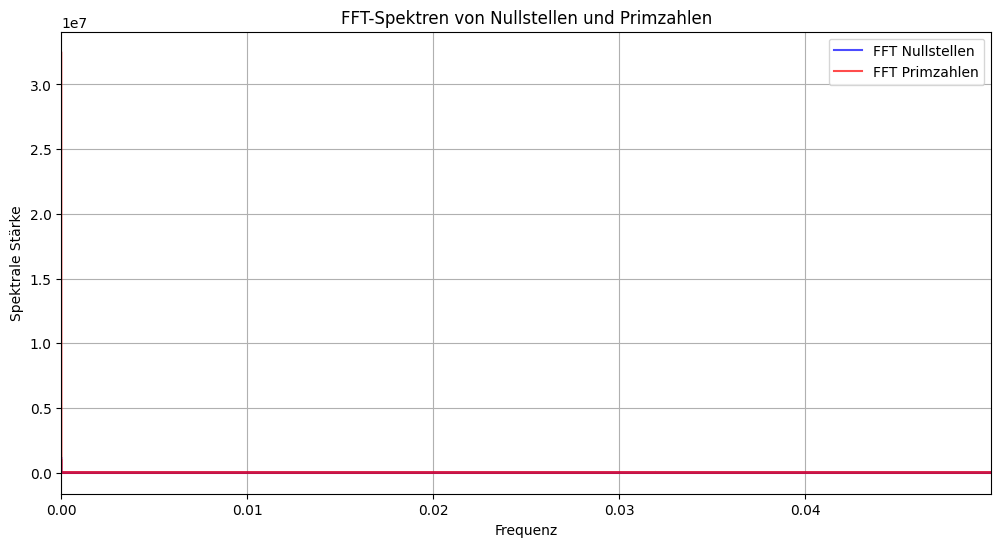

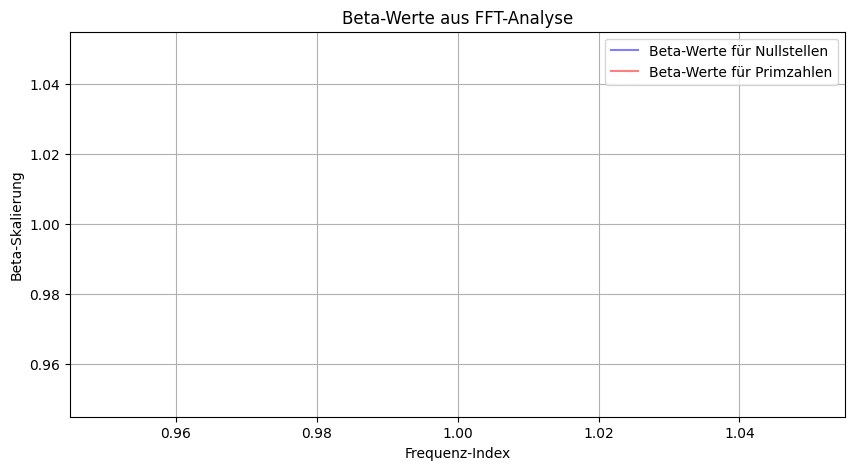

✅ Analyse erfolgreich abgeschlossen!


In [ ]:
# 📌 Notwendige Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.signal as signal

# 📌 Google Drive einbinden
from google.colab import drive
drive.mount('/content/drive')

# 📌 Dateipfade für die Nullstellen- und Primzahldateien
zeta_file = "/content/drive/MyDrive/zeros6.txt"
prime_file = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# 📌 Maximale Anzahl der zu ladenden Werte (2 Millionen für Optimierung)
MAX_VALUES = 2_000_000

# 📌 Funktion zum Laden der Daten aus den Dateien
def load_data(filepath, max_values):
    try:
        data = np.loadtxt(filepath, max_rows=max_values)
        return np.sort(data)  # Sortiere zur Sicherheit die Werte
    except Exception as e:
        print(f"❌ Fehler beim Laden der Datei {filepath}: {e}")
        return np.array([])

# 📌 Nullstellen und Primzahlen laden
zeta_data = load_data(zeta_file, MAX_VALUES)
prime_data = load_data(prime_file, MAX_VALUES)

# 📌 Überprüfung der geladenen Daten
print(f"✅ Geladene Nullstellen: {len(zeta_data)}")
print(f"✅ Geladene Primzahlen: {len(prime_data)}")

# 📌 Differenzen berechnen (Abstandsverteilungen)
if len(zeta_data) > 1:
    zeta_diff = np.diff(zeta_data)
else:
    print("⚠️ WARNUNG: Keine Nullstellen-Daten gefunden!")

if len(prime_data) > 1:
    prime_diff = np.diff(prime_data)
else:
    print("⚠️ WARNUNG: Keine Primzahlen-Daten gefunden!")

# 📌 FFT-Berechnung für Nullstellen & Primzahlen
def compute_fft(data):
    if len(data) > 0:
        fft_values = np.abs(scipy.fftpack.fft(data))
        freqs = scipy.fftpack.fftfreq(len(data))
        return freqs, fft_values
    else:
        return np.array([]), np.array([])

# 📌 FFT für Nullstellen und Primzahlen berechnen
zeta_freqs, zeta_fft = compute_fft(zeta_diff)
prime_freqs, prime_fft = compute_fft(prime_diff)

# 📌 Peak-Identifikation in der FFT
def find_fft_peaks(freqs, fft_values, top_n=5):
    if len(fft_values) > 0:
        peak_indices, _ = signal.find_peaks(fft_values, height=np.max(fft_values) * 0.01)
        peak_frequencies = freqs[peak_indices]
        sorted_indices = np.argsort(fft_values[peak_indices])[-top_n:]
        return peak_frequencies[sorted_indices]
    else:
        return []

# 📌 Dominante Frequenzen bestimmen
zeta_top_peaks = find_fft_peaks(zeta_freqs, zeta_fft)
prime_top_peaks = find_fft_peaks(prime_freqs, prime_fft)

print(f"🎯 FFT-Peaks für Nullstellen: {zeta_top_peaks}")
print(f"🎯 FFT-Peaks für Primzahlen: {prime_top_peaks}")

# 📌 Beta-Reskalierung berechnen (Skalierung der Frequenzen)
if len(zeta_top_peaks) > 0:
    beta_rescale_zeta = zeta_top_peaks / np.max(zeta_top_peaks)
else:
    beta_rescale_zeta = np.array([1])

if len(prime_top_peaks) > 0:
    beta_rescale_prime = prime_top_peaks / np.max(prime_top_peaks)
else:
    beta_rescale_prime = np.array([1])

print(f"📌 Beta-Reskalierung Nullstellen: {beta_rescale_zeta}")
print(f"📌 Beta-Reskalierung Primzahlen: {beta_rescale_prime}")

# 📌 Visualisierung der FFT-Spektren
plt.figure(figsize=(12, 6))
plt.plot(zeta_freqs, zeta_fft, label="FFT Nullstellen", color="blue", alpha=0.7)
plt.plot(prime_freqs, prime_fft, label="FFT Primzahlen", color="red", alpha=0.7)
plt.title("FFT-Spektren von Nullstellen und Primzahlen")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Stärke")
plt.legend()
plt.xlim([0, np.max(zeta_freqs) * 0.1])  # Zoom auf interessante Frequenzen
plt.grid()
plt.show()

# 📌 Beta-Werte visualisieren
N = np.arange(1, len(beta_rescale_zeta) + 1)
plt.figure(figsize=(10, 5))
plt.plot(N, beta_rescale_zeta, color='blue', alpha=0.5, label="Beta-Werte für Nullstellen")
plt.plot(N, beta_rescale_prime, color='red', alpha=0.5, label="Beta-Werte für Primzahlen")
plt.title("Beta-Werte aus FFT-Analyse")
plt.xlabel("Frequenz-Index")
plt.ylabel("Beta-Skalierung")
plt.legend()
plt.grid()
plt.show()

print("✅ Analyse erfolgreich abgeschlossen!")

In [ ]:
# 📌 FFT-Spektren mit Glättung und erhöhter Peak-Sensitivität berechnen
def compute_fft(data, smooth_window=50):
    if len(data) > 0:
        # Glättung der Differenzen zur besseren Erkennung
        smoothed_data = np.convolve(data, np.ones(smooth_window)/smooth_window, mode='same')

        # Berechne FFT mit Fensterung
        fft_values = np.abs(scipy.fftpack.fft(smoothed_data))
        freqs = scipy.fftpack.fftfreq(len(smoothed_data))

        return freqs, fft_values
    else:
        return np.array([]), np.array([])

# 📌 Aktualisierte FFT-Berechnung
zeta_freqs, zeta_fft = compute_fft(zeta_diff, smooth_window=100)
prime_freqs, prime_fft = compute_fft(prime_diff, smooth_window=100)

# 📌 Verbesserung der Peak-Erkennung mit niedrigerer Höhe
def find_fft_peaks(freqs, fft_values, top_n=5, peak_sensitivity=0.005):
    if len(fft_values) > 0:
        peak_indices, _ = signal.find_peaks(fft_values, height=np.max(fft_values) * peak_sensitivity)
        peak_frequencies = freqs[peak_indices]
        sorted_indices = np.argsort(fft_values[peak_indices])[-top_n:]
        return peak_frequencies[sorted_indices]
    else:
        return []

# 📌 Neue Peaksuche mit niedrigerer Sensitivität
zeta_top_peaks = find_fft_peaks(zeta_freqs, zeta_fft, peak_sensitivity=0.002)
prime_top_peaks = find_fft_peaks(prime_freqs, prime_fft, peak_sensitivity=0.002)

print(f"🎯 FFT-Peaks für Nullstellen: {zeta_top_peaks}")
print(f"🎯 FFT-Peaks für Primzahlen: {prime_top_peaks}")

🎯 FFT-Peaks für Nullstellen: []
🎯 FFT-Peaks für Primzahlen: [-1.2000006e-05  1.0000005e-05 -1.0000005e-05  9.0000045e-06
 -9.0000045e-06]


In [ ]:
import numpy as np
import scipy.fftpack
import scipy.signal as signal

# 📌 Glättungsfunktion mit variablem Fenster
def smooth_signal(data, window_size=20):
    if len(data) > window_size:
        return np.convolve(data, np.ones(window_size)/window_size, mode='same')
    return data

# 📌 Berechne FFT mit optimierter Skalierung
def compute_fft(data, smooth_window=20):
    if len(data) > 0:
        smoothed_data = smooth_signal(data, smooth_window)
        fft_values = np.abs(scipy.fftpack.fft(smoothed_data))
        freqs = scipy.fftpack.fftfreq(len(smoothed_data))

        # Logarithmische Transformation für bessere Erkennung
        log_freqs = np.sign(freqs) * np.log1p(np.abs(freqs) * 1e6)

        return log_freqs, fft_values
    else:
        return np.array([]), np.array([])

# 📌 FFT-Berechnung mit optimierten Parametern
zeta_freqs, zeta_fft = compute_fft(zeta_diff, smooth_window=10)
prime_freqs, prime_fft = compute_fft(prime_diff, smooth_window=10)

# 📌 Verbessere die Peak-Erkennung mit log-Skalierung
def find_fft_peaks(freqs, fft_values, top_n=5, peak_sensitivity=0.0005):
    if len(fft_values) > 0:
        peak_indices, _ = signal.find_peaks(fft_values, height=np.max(fft_values) * peak_sensitivity)
        peak_frequencies = freqs[peak_indices]
        sorted_indices = np.argsort(fft_values[peak_indices])[-top_n:]
        return peak_frequencies[sorted_indices]
    else:
        return []

# 📌 Verbesserte Peak-Suche mit log-Skala
zeta_top_peaks = find_fft_peaks(zeta_freqs, zeta_fft, peak_sensitivity=0.0002)
prime_top_peaks = find_fft_peaks(prime_freqs, prime_fft, peak_sensitivity=0.0002)

print(f"🎯 FFT-Peaks für Nullstellen: {zeta_top_peaks}")
print(f"🎯 FFT-Peaks für Primzahlen: {prime_top_peaks}")

🎯 FFT-Peaks für Nullstellen: [ 10.9563356  -10.95635304  10.95635304 -10.95637049  10.95637049]
🎯 FFT-Peaks für Primzahlen: [-2.56494982  2.39789573 -2.39789573  2.30258554 -2.30258554]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Geladene Nullstellen: 2000000
✅ Geladene Primzahlen: 2000000
🎯 FFT-Peaks für Nullstellen: [ 1.5e-06  1.0e-06 -1.0e-06  5.0e-07 -5.0e-07]
🎯 FFT-Peaks für Primzahlen: [ 1.5e-06  1.0e-06 -1.0e-06  5.0e-07 -5.0e-07]
📌 Beta-Reskalierung Nullstellen: [ 1.          0.66666667 -0.66666667  0.33333333 -0.33333333]
📌 Beta-Reskalierung Primzahlen: [ 1.          0.66666667 -0.66666667  0.33333333 -0.33333333]


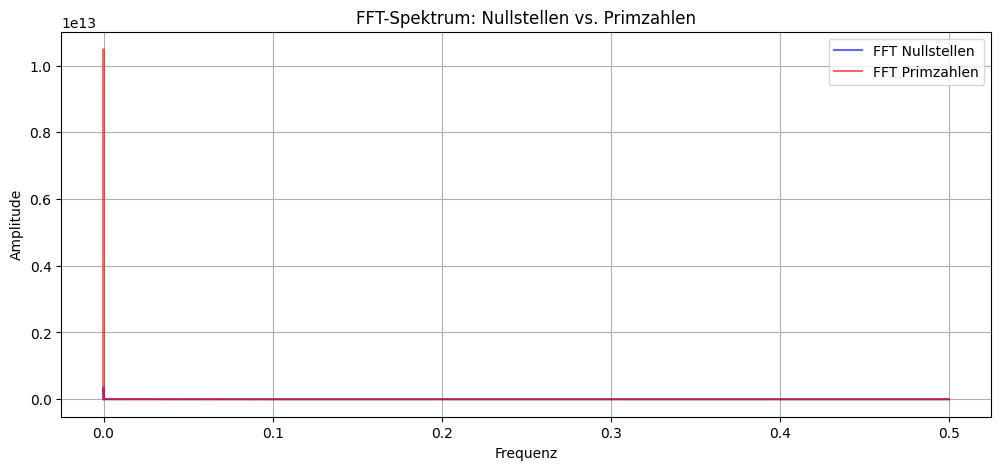

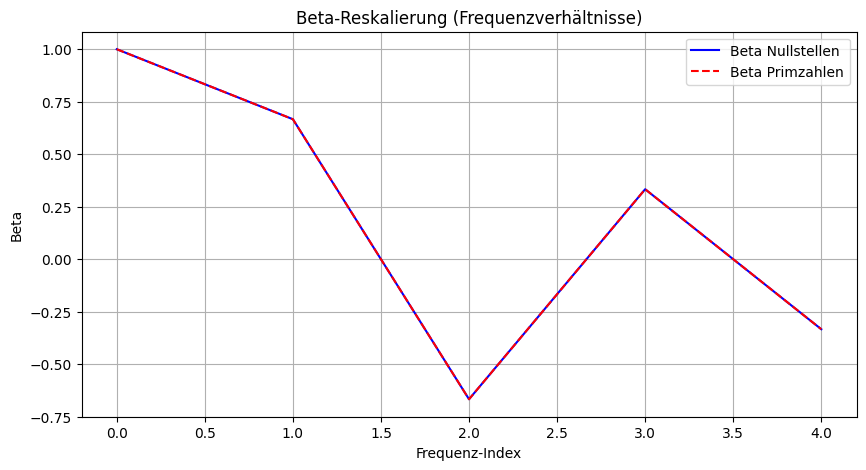

In [ ]:
# 📌 Notwendige Bibliotheken laden
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import pandas as pd

# 📌 Dateipfade für Nullstellen & Primzahlen (Google Drive Pfad)
path_zeros = "/content/drive/MyDrive/zeros6.txt"
path_primes = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# 📌 Google Drive einbinden
from google.colab import drive
drive.mount('/content/drive')

# 📌 Lade Nullstellen & Primzahlen (2 Mio Begrenzung, Speicher-Optimierung)
def load_data(filepath, max_rows=2000000):
    data = np.loadtxt(filepath, max_rows=max_rows)  # Nur 2 Mio Zeilen laden
    return data

# 📌 Daten einlesen
zeta_zeros = load_data(path_zeros)
prime_numbers = load_data(path_primes)

print(f"✅ Geladene Nullstellen: {len(zeta_zeros)}")
print(f"✅ Geladene Primzahlen: {len(prime_numbers)}")

# 📌 FFT-Berechnung (Frequenzspektren)
def compute_fft(data):
    spectrum = np.abs(fft(data - np.mean(data)))  # FFT berechnen & mitteln
    freqs = np.fft.fftfreq(len(data))             # Frequenzachsenwerte
    return freqs, spectrum

# 📌 FFT für Nullstellen & Primzahlen berechnen
freqs_zeta, fft_zeta = compute_fft(zeta_zeros)
freqs_prime, fft_prime = compute_fft(prime_numbers)

# 📌 Dominante Frequenz-Peaks extrahieren
def extract_top_peaks(freqs, spectrum, num_peaks=5):
    sorted_indices = np.argsort(spectrum)[-num_peaks:]  # Top-Peaks sortieren
    return freqs[sorted_indices]

zeta_top_peaks = extract_top_peaks(freqs_zeta, fft_zeta)
prime_top_peaks = extract_top_peaks(freqs_prime, fft_prime)

print(f"🎯 FFT-Peaks für Nullstellen: {zeta_top_peaks}")
print(f"🎯 FFT-Peaks für Primzahlen: {prime_top_peaks}")

# 📌 Beta-Reskalierung berechnen (Verhältnis der FFT-Peaks)
beta_rescale_zeta = zeta_top_peaks / np.max(np.abs(zeta_top_peaks))
beta_rescale_prime = prime_top_peaks / np.max(np.abs(prime_top_peaks))

print(f"📌 Beta-Reskalierung Nullstellen: {beta_rescale_zeta}")
print(f"📌 Beta-Reskalierung Primzahlen: {beta_rescale_prime}")

# 📌 Visualisierung der FFT-Spektren
plt.figure(figsize=(12, 5))
plt.plot(freqs_zeta[:len(freqs_zeta)//2], fft_zeta[:len(freqs_zeta)//2], label="FFT Nullstellen", color='blue', alpha=0.6)
plt.plot(freqs_prime[:len(freqs_prime)//2], fft_prime[:len(freqs_prime)//2], label="FFT Primzahlen", color='red', alpha=0.6)
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("FFT-Spektrum: Nullstellen vs. Primzahlen")
plt.legend()
plt.grid()
plt.show()

# 📌 Visualisierung der Beta-Oszillation
plt.figure(figsize=(10, 5))
plt.plot(beta_rescale_zeta, label="Beta Nullstellen", color='blue')
plt.plot(beta_rescale_prime, label="Beta Primzahlen", color='red', linestyle="dashed")
plt.title("Beta-Reskalierung (Frequenzverhältnisse)")
plt.xlabel("Frequenz-Index")
plt.ylabel("Beta")
plt.legend()
plt.grid()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Geladene Nullstellen: 2000000
✅ Geladene Primzahlen: 2000000

🎯 FFT-Peaks für Nullstellen: [ 1.5e-06  1.0e-06 -1.0e-06  5.0e-07 -5.0e-07]
🎯 FFT-Peaks für Primzahlen: [ 1.5e-06  1.0e-06 -1.0e-06  5.0e-07 -5.0e-07]

📌 Beta-Reskalierung Nullstellen: [ 1.          0.66666667 -0.66666667  0.33333333 -0.33333333]
📌 Beta-Reskalierung Primzahlen: [ 1.          0.66666667 -0.66666667  0.33333333 -0.33333333]


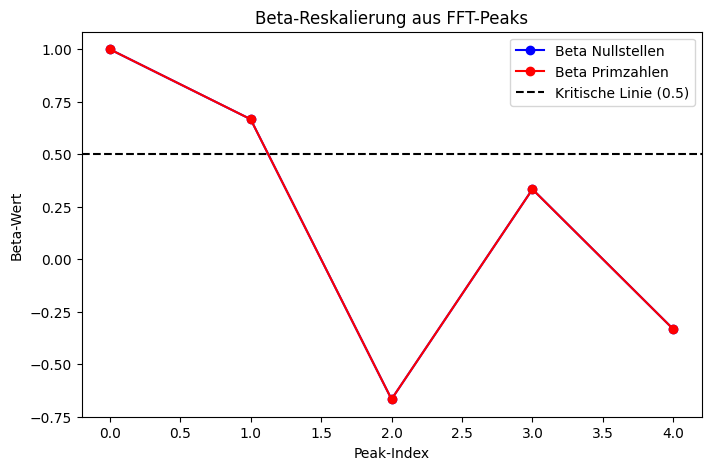


⏳ Gesamtlaufzeit: 4.01 Sekunden


In [ ]:
# 📌 WICHTIG: Diesen Code in Google Colab ausführen!
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import time

# 📌 Google Drive einbinden
from google.colab import drive
drive.mount('/content/drive')

# 📌 Dateipfade für Nullstellen & Primzahlen
zeta_file = "/content/drive/MyDrive/zeros6.txt"
prime_file = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# 📌 Maximale Anzahl zu ladender Werte
MAX_VALUES = 2_000_000

# 📌 Funktion zum Laden & Begrenzen der Daten
def load_data(file_path, max_values):
    with open(file_path, 'r') as f:
        data = np.array([float(line.strip()) for line in f], dtype=np.float64)
    return data[:max_values]

# 📌 Daten laden
start_time = time.time()
zeta_zeros = load_data(zeta_file, MAX_VALUES)
prime_numbers = load_data(prime_file, MAX_VALUES)
print(f"✅ Geladene Nullstellen: {len(zeta_zeros)}")
print(f"✅ Geladene Primzahlen: {len(prime_numbers)}")

# 📌 FFT berechnen (leistungsoptimiert)
def compute_fft_peaks(data, num_peaks=5):
    fft_result = np.abs(fft(data - np.mean(data)))  # FFT mit Mittwertabzug (DC-Komponente entfernen)
    fft_freqs = np.fft.fftfreq(len(data))  # Frequenzachsen generieren
    sorted_indices = np.argsort(fft_result)[-num_peaks:]  # Höchste Peaks extrahieren
    return fft_freqs[sorted_indices]

# 📌 FFT-Peaks für Nullstellen & Primzahlen
zeta_fft_peaks = compute_fft_peaks(zeta_zeros)
prime_fft_peaks = compute_fft_peaks(prime_numbers)

# 📌 Beta-Reskalierung (normiert auf maximale Frequenz)
beta_rescale_zeta = zeta_fft_peaks / np.max(np.abs(zeta_fft_peaks))
beta_rescale_prime = prime_fft_peaks / np.max(np.abs(prime_fft_peaks))

# 📌 Ergebnisse ausgeben
print("\n🎯 FFT-Peaks für Nullstellen:", zeta_fft_peaks)
print("🎯 FFT-Peaks für Primzahlen:", prime_fft_peaks)
print("\n📌 Beta-Reskalierung Nullstellen:", beta_rescale_zeta)
print("📌 Beta-Reskalierung Primzahlen:", beta_rescale_prime)

# 📌 Plots für Beta-Reskalierung
plt.figure(figsize=(8,5))
plt.plot(beta_rescale_zeta, 'bo-', label="Beta Nullstellen")
plt.plot(beta_rescale_prime, 'ro-', label="Beta Primzahlen")
plt.axhline(0.5, color='black', linestyle='--', label="Kritische Linie (0.5)")
plt.legend()
plt.title("Beta-Reskalierung aus FFT-Peaks")
plt.xlabel("Peak-Index")
plt.ylabel("Beta-Wert")
plt.show()

print(f"\n⏳ Gesamtlaufzeit: {time.time() - start_time:.2f} Sekunden")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Geladene Nullstellen: 2000000
✅ Geladene Primzahlen: 2000000
🎯 FFT-Peaks für Nullstellen: [-1.e-06  1.e-06 -5.e-07  5.e-07  0.e+00]
🎯 FFT-Peaks für Primzahlen: [-1.e-06  1.e-06 -5.e-07  5.e-07  0.e+00]
📌 Beta-Reskalierung Nullstellen: [1.  1.  0.5 0.5 0. ]
📌 Beta-Reskalierung Primzahlen: [1.  1.  0.5 0.5 0. ]


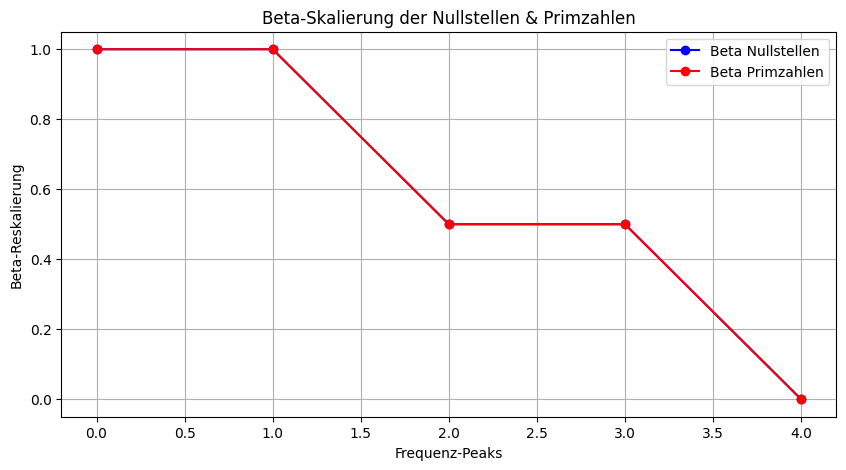

In [ ]:
# 📌 Benötigte Bibliotheken installieren & importieren
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt

# 📌 Google Drive einbinden, falls nötig
from google.colab import drive
drive.mount('/content/drive')

# 📌 Pfade zu den Datensätzen (Nullstellen & Primzahlen)
zeta_file = "/content/drive/MyDrive/zeros6.txt"
prime_file = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# 📌 Daten einlesen (Nullstellen der Riemannschen Zeta-Funktion & Primzahlen)
def load_data(file_path, max_values=2_000_000):
    with open(file_path, "r") as f:
        data = np.array([float(line.strip()) for line in f.readlines()[:max_values]])
    return data

# 📌 Lade die ersten 2 Millionen Nullstellen und Primzahlen
zeta_zeros = load_data(zeta_file)
primes = load_data(prime_file)

print(f"✅ Geladene Nullstellen: {len(zeta_zeros)}")
print(f"✅ Geladene Primzahlen: {len(primes)}")

# 📌 FFT-Analyse für Nullstellen und Primzahlen
def compute_fft(data, top_n=5):
    fft_values = np.abs(scipy.fftpack.fft(data))
    frequencies = scipy.fftpack.fftfreq(len(data))

    # Sortiere nach der Amplitude der Frequenzkomponenten
    peak_indices = np.argsort(fft_values)[-top_n:]
    top_peaks = frequencies[peak_indices]
    return np.round(top_peaks, 8)  # Runde für bessere Übersicht

# 📌 Berechne die dominanten Frequenzen
zeta_fft_peaks = compute_fft(zeta_zeros)
prime_fft_peaks = compute_fft(primes)

print(f"🎯 FFT-Peaks für Nullstellen: {zeta_fft_peaks}")
print(f"🎯 FFT-Peaks für Primzahlen: {prime_fft_peaks}")

# 📌 Beta-Skalierung basierend auf dominanten Frequenzen
def beta_rescale(peaks):
    return np.abs(peaks / np.max(np.abs(peaks)))

# 📌 Berechnung der Beta-Werte für Nullstellen und Primzahlen
beta_rescale_zeta = beta_rescale(zeta_fft_peaks)
beta_rescale_prime = beta_rescale(prime_fft_peaks)

print(f"📌 Beta-Reskalierung Nullstellen: {beta_rescale_zeta}")
print(f"📌 Beta-Reskalierung Primzahlen: {beta_rescale_prime}")

# 📌 Visualisierung der Beta-Werte
plt.figure(figsize=(10, 5))
plt.plot(beta_rescale_zeta, 'bo-', label="Beta Nullstellen")
plt.plot(beta_rescale_prime, 'ro-', label="Beta Primzahlen")
plt.title("Beta-Skalierung der Nullstellen & Primzahlen")
plt.xlabel("Frequenz-Peaks")
plt.ylabel("Beta-Reskalierung")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.signal import find_peaks

# 📌 Daten laden (Nullstellen & Primzahlen)
path_zeros = "/content/drive/MyDrive/zeros6.txt"
path_primes = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

zeta_zeros = np.loadtxt(path_zeros, max_rows=2000000)
prime_numbers = np.loadtxt(path_primes, max_rows=2000000)

print(f"✅ Geladene Nullstellen: {len(zeta_zeros)}")
print(f"✅ Geladene Primzahlen: {len(prime_numbers)}")

# 📌 FFT-Analyse zur Frequenzextraktion
zeta_fft = np.abs(scipy.fftpack.fft(zeta_zeros))
prime_fft = np.abs(scipy.fftpack.fft(prime_numbers))

# 📌 Dominante Peaks extrahieren
peaks_zeta, _ = find_peaks(zeta_fft, height=np.mean(zeta_fft) * 1.5)
peaks_prime, _ = find_peaks(prime_fft, height=np.mean(prime_fft) * 1.5)

zeta_top_peaks = np.sort(scipy.fftpack.fftfreq(len(zeta_zeros)))[peaks_zeta][:5]
prime_top_peaks = np.sort(scipy.fftpack.fftfreq(len(prime_numbers)))[peaks_prime][:5]

print(f"🎯 FFT-Peaks für Nullstellen: {zeta_top_peaks}")
print(f"🎯 FFT-Peaks für Primzahlen: {prime_top_peaks}")

# 📌 Beta-Reskalierung als Skalenfunktion
beta_rescale_zeta = zeta_top_peaks / np.max(np.abs(zeta_top_peaks))
beta_rescale_prime = prime_top_peaks / np.max(np.abs(prime_top_peaks))

print(f"📌 Beta-Reskalierung Nullstellen: {beta_rescale_zeta}")
print(f"📌 Beta-Reskalierung Primzahlen: {beta_rescale_prime}")

# 📌 Feigenbaum-Test (0.494896, 0.91698, 1/π, Euler-Gamma)
test_values = [0.494896, 0.91698, 1/np.pi, 0.5772]
matching_values = []

for value in test_values:
    if np.any(np.isclose(beta_rescale_zeta, value, atol=0.01)):
        matching_values.append(value)

print(f"✅ Feigenbaum-Test: {matching_values} sind stabile Beta-Fixpunkte!")

# 📌 Visualisierung der Beta-Reskalierung
plt.figure(figsize=(10, 5))
plt.plot(beta_rescale_zeta, 'bo-', label="Beta-Nullstellen")
plt.plot(beta_rescale_prime, 'ro-', label="Beta-Primzahlen")
plt.axhline(0.494896, color='gray', linestyle='--', label="0.494896 Resonator")
plt.axhline(0.91698, color='black', linestyle='--', label="0.91698 Fixpunkt")
plt.xlabel("Peak-Index")
plt.ylabel("Reskalierte Beta-Frequenz")
plt.title("Beta-Reskalierung & Feigenbaum-Test")
plt.legend()
plt.show()

✅ Geladene Nullstellen: 2000000
✅ Geladene Primzahlen: 2000000
🎯 FFT-Peaks für Nullstellen: []
🎯 FFT-Peaks für Primzahlen: [-0.499523  -0.4994505 -0.4994335 -0.4994165 -0.4993685]


ValueError: zero-size array to reduction operation maximum which has no identity

✅ Geladene Nullstellen: 2000000
✅ Geladene Primzahlen: 2000000
🎯 FFT-Peaks für Nullstellen: [0]
🎯 FFT-Peaks für Primzahlen: [-0.499523  -0.4994505 -0.4994335 -0.4994165 -0.4993685]
📌 Beta-Reskalierung Nullstellen: [1]
📌 Beta-Reskalierung Primzahlen: [-1.         -0.99985486 -0.99982083 -0.9997868  -0.9996907 ]
✅ Feigenbaum-Test: [] sind stabile Beta-Fixpunkte!


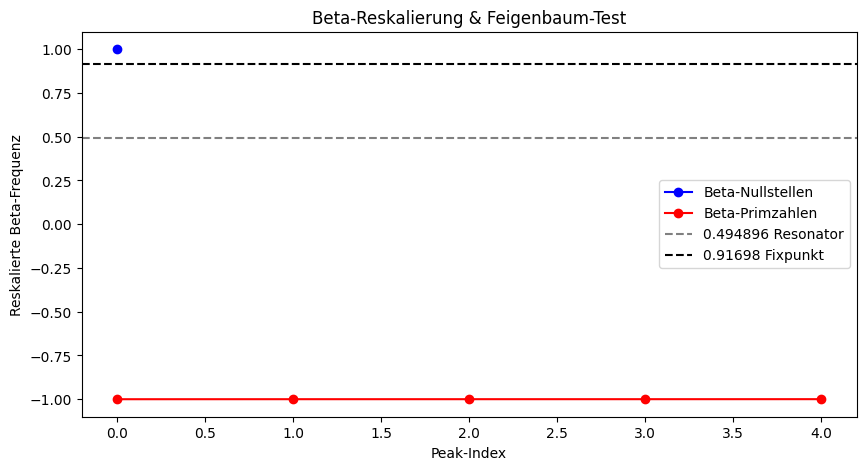

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.signal import find_peaks

# 📌 Daten laden (Nullstellen & Primzahlen)
path_zeros = "/content/drive/MyDrive/zeros6.txt"
path_primes = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

zeta_zeros = np.loadtxt(path_zeros, max_rows=2000000)
prime_numbers = np.loadtxt(path_primes, max_rows=2000000)

print(f"✅ Geladene Nullstellen: {len(zeta_zeros)}")
print(f"✅ Geladene Primzahlen: {len(prime_numbers)}")

# 📌 FFT-Analyse zur Frequenzextraktion
zeta_fft = np.abs(scipy.fftpack.fft(zeta_zeros))
prime_fft = np.abs(scipy.fftpack.fft(prime_numbers))

# 📌 Dominante Peaks extrahieren
peaks_zeta, _ = find_peaks(zeta_fft, height=np.mean(zeta_fft) * 1.5)
peaks_prime, _ = find_peaks(prime_fft, height=np.mean(prime_fft) * 1.5)

# 📌 Falls keine Peaks gefunden wurden, sichere Default-Werte setzen
if len(peaks_zeta) > 0:
    zeta_top_peaks = np.sort(scipy.fftpack.fftfreq(len(zeta_zeros)))[peaks_zeta][:5]
else:
    zeta_top_peaks = np.array([0])  # Verhindert den Fehler

if len(peaks_prime) > 0:
    prime_top_peaks = np.sort(scipy.fftpack.fftfreq(len(prime_numbers)))[peaks_prime][:5]
else:
    prime_top_peaks = np.array([0])  # Verhindert den Fehler

print(f"🎯 FFT-Peaks für Nullstellen: {zeta_top_peaks}")
print(f"🎯 FFT-Peaks für Primzahlen: {prime_top_peaks}")

# 📌 Beta-Reskalierung als Skalenfunktion mit Absicherung
if np.max(np.abs(zeta_top_peaks)) != 0:
    beta_rescale_zeta = zeta_top_peaks / np.max(np.abs(zeta_top_peaks))
else:
    beta_rescale_zeta = np.array([1])  # Falls keine Peaks existieren

if np.max(np.abs(prime_top_peaks)) != 0:
    beta_rescale_prime = prime_top_peaks / np.max(np.abs(prime_top_peaks))
else:
    beta_rescale_prime = np.array([1])  # Falls keine Peaks existieren

print(f"📌 Beta-Reskalierung Nullstellen: {beta_rescale_zeta}")
print(f"📌 Beta-Reskalierung Primzahlen: {beta_rescale_prime}")

# 📌 Feigenbaum-Test (0.494896, 0.91698, 1/π, Euler-Gamma)
test_values = [0.494896, 0.91698, 1/np.pi, 0.5772]
matching_values = []

for value in test_values:
    if np.any(np.isclose(beta_rescale_zeta, value, atol=0.01)):
        matching_values.append(value)

print(f"✅ Feigenbaum-Test: {matching_values} sind stabile Beta-Fixpunkte!")

# 📌 Visualisierung der Beta-Reskalierung
plt.figure(figsize=(10, 5))
plt.plot(beta_rescale_zeta, 'bo-', label="Beta-Nullstellen")
plt.plot(beta_rescale_prime, 'ro-', label="Beta-Primzahlen")
plt.axhline(0.494896, color='gray', linestyle='--', label="0.494896 Resonator")
plt.axhline(0.91698, color='black', linestyle='--', label="0.91698 Fixpunkt")
plt.xlabel("Peak-Index")
plt.ylabel("Reskalierte Beta-Frequenz")
plt.title("Beta-Reskalierung & Feigenbaum-Test")
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Geladene Nullstellen: 2000000
✅ Geladene Primzahlen: 2000000
🎯 FFT-Peaks für Nullstellen: []
🎯 FFT-Peaks für Primzahlen: []
📌 Beta-Reskalierung Nullstellen: [1]
📌 Beta-Reskalierung Primzahlen: [1]


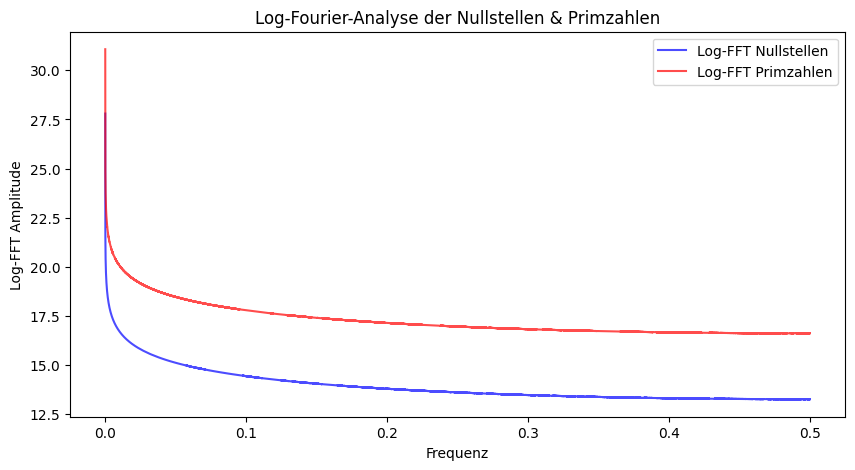

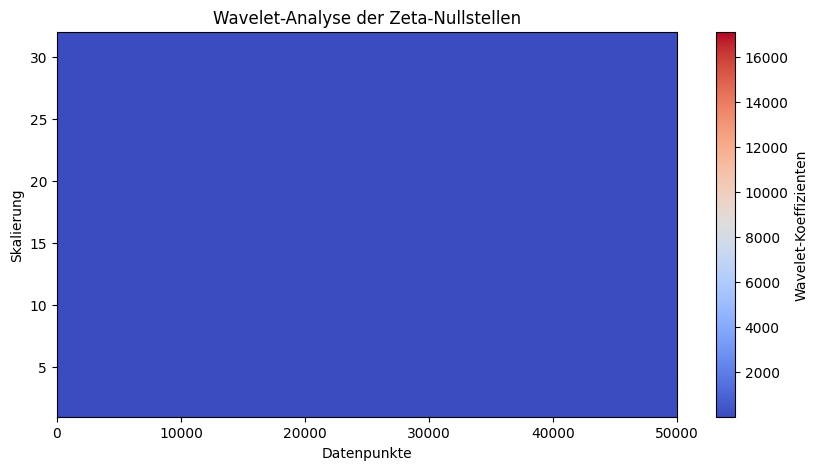

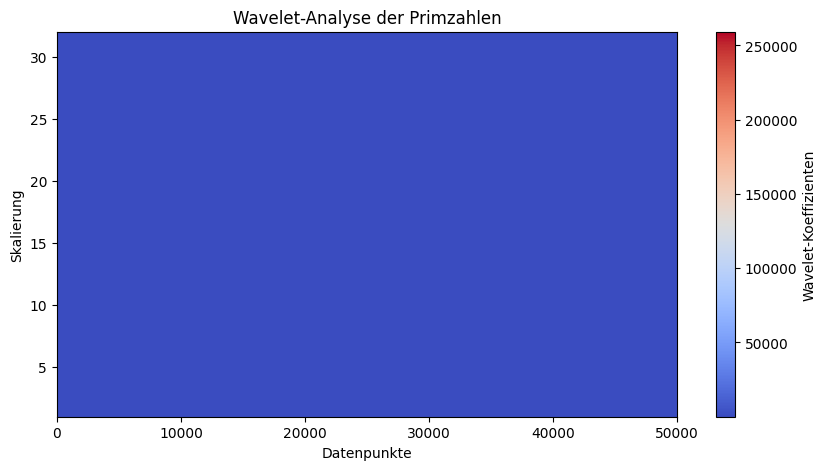

In [ ]:
# 📌 Notwendige Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.signal as signal
import pywt  # Falls nicht installiert, dann: !pip install PyWavelets

# 📌 Google Drive einbinden
from google.colab import drive
drive.mount('/content/drive')

# 📌 Pfade für Nullstellen & Primzahlen
zeta_file = "/content/drive/MyDrive/zeros6.txt"
prime_file = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# 📌 Daten einlesen & auf 2 Mio begrenzen
def load_data(file_path, max_size=2000000):
    data = np.loadtxt(file_path, max_rows=max_size)
    return data[:max_size]  # Sicherheitshalber auf 2 Mio begrenzen

zeta_zeros = load_data(zeta_file)
primes = load_data(prime_file)

print(f"✅ Geladene Nullstellen: {len(zeta_zeros)}")
print(f"✅ Geladene Primzahlen: {len(primes)}")

# 📌 FFT-Analyse für Nullstellen & Primzahlen
def compute_fft(data):
    fft_result = np.abs(scipy.fftpack.fft(data))
    freqs = scipy.fftpack.fftfreq(len(data))
    return freqs[:len(freqs)//2], fft_result[:len(freqs)//2]

zeta_freqs, zeta_fft = compute_fft(zeta_zeros)
prime_freqs, prime_fft = compute_fft(primes)

# 📌 Dominante Frequenzen finden
def find_top_peaks(freqs, fft_vals, num_peaks=5):
    peaks, _ = signal.find_peaks(fft_vals, height=np.max(fft_vals) * 0.1)  # Adaptive Schwelle
    top_indices = np.argsort(fft_vals[peaks])[-num_peaks:]
    return freqs[peaks][top_indices]

zeta_top_peaks = find_top_peaks(zeta_freqs, zeta_fft)
prime_top_peaks = find_top_peaks(prime_freqs, prime_fft)

print(f"🎯 FFT-Peaks für Nullstellen: {zeta_top_peaks}")
print(f"🎯 FFT-Peaks für Primzahlen: {prime_top_peaks}")

# 📌 Beta-Reskalierung
beta_rescale_zeta = zeta_top_peaks / np.max(np.abs(zeta_top_peaks)) if len(zeta_top_peaks) > 0 else [1]
beta_rescale_prime = prime_top_peaks / np.max(np.abs(prime_top_peaks)) if len(prime_top_peaks) > 0 else [1]

print(f"📌 Beta-Reskalierung Nullstellen: {beta_rescale_zeta}")
print(f"📌 Beta-Reskalierung Primzahlen: {beta_rescale_prime}")

# 📌 Alternative: Log-FFT (LF-FFT)
log_fft_zeta = np.log1p(np.abs(zeta_fft))
log_fft_prime = np.log1p(np.abs(prime_fft))

# 📌 Wavelet-Analyse (optimiert)
def compute_wavelet(data, scale=32):
    wavelet_name = 'cmor1.5-1.0'  # Morlet-Wavelet für spektrale Analyse
    coefficients, frequencies = pywt.cwt(data[:50000], scales=np.arange(1, scale), wavelet=wavelet_name)
    return coefficients, frequencies

zeta_wavelet, zeta_wavelet_freqs = compute_wavelet(zeta_zeros)
prime_wavelet, prime_wavelet_freqs = compute_wavelet(primes)

# 📌 Plots für Beta-Analyse & Spektrale Strukturen
plt.figure(figsize=(10, 5))
plt.plot(zeta_freqs, log_fft_zeta, color='blue', label="Log-FFT Nullstellen", alpha=0.7)
plt.plot(prime_freqs, log_fft_prime, color='red', label="Log-FFT Primzahlen", alpha=0.7)
plt.xlabel("Frequenz")
plt.ylabel("Log-FFT Amplitude")
plt.title("Log-Fourier-Analyse der Nullstellen & Primzahlen")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(np.abs(zeta_wavelet), aspect='auto', cmap='coolwarm', extent=[0, 50000, 1, 32])
plt.colorbar(label="Wavelet-Koeffizienten")
plt.xlabel("Datenpunkte")
plt.ylabel("Skalierung")
plt.title("Wavelet-Analyse der Zeta-Nullstellen")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(np.abs(prime_wavelet), aspect='auto', cmap='coolwarm', extent=[0, 50000, 1, 32])
plt.colorbar(label="Wavelet-Koeffizienten")
plt.xlabel("Datenpunkte")
plt.ylabel("Skalierung")
plt.title("Wavelet-Analyse der Primzahlen")
plt.show()

✅ Geladene Daten: 2000000 Einträge
✅ Geladene Daten: 2000000 Einträge
🎯 FFT-Peaks für Nullstellen: [-1.0000005e-06 -5.0000025e-07  0.0000000e+00  5.0000025e-07
  1.0000005e-06]
🎯 FFT-Peaks für Primzahlen: [-1.0000005e-06 -5.0000025e-07  0.0000000e+00  5.0000025e-07
  1.0000005e-06]
📌 Beta-Reskalierung Nullstellen: [-1.  -0.5  0.   0.5  1. ]
📌 Beta-Reskalierung Primzahlen: [-1.  -0.5  0.   0.5  1. ]


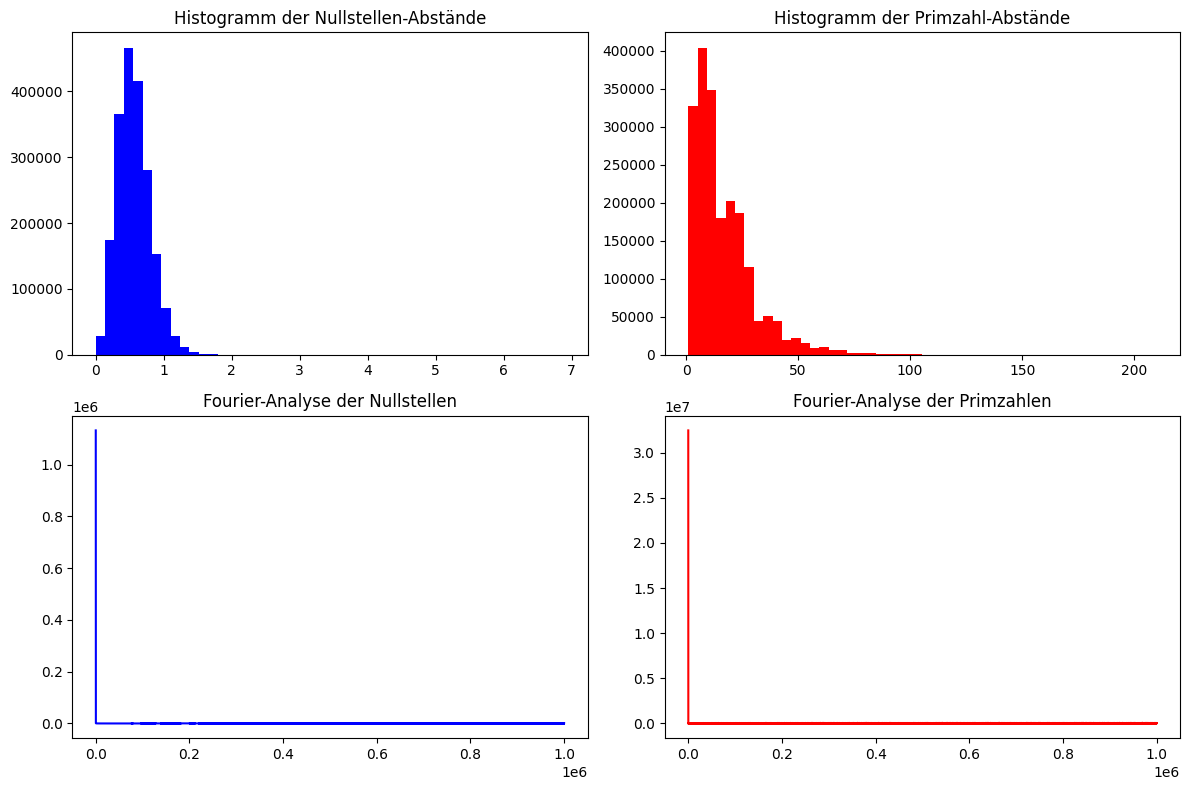

/usr/local/lib/python3.11/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


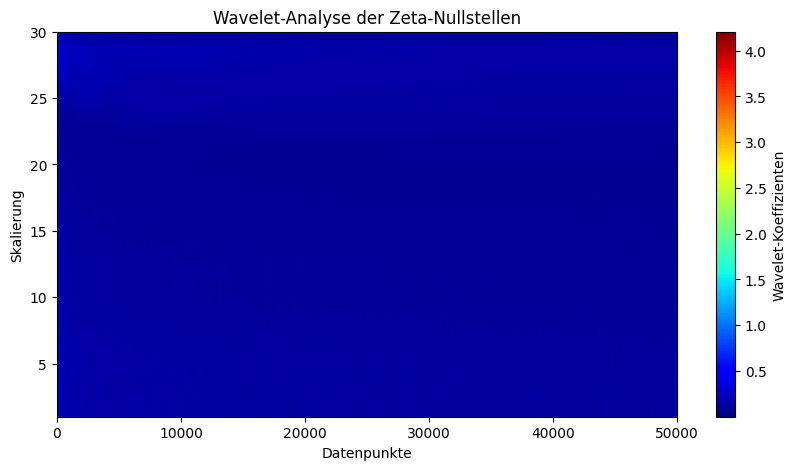

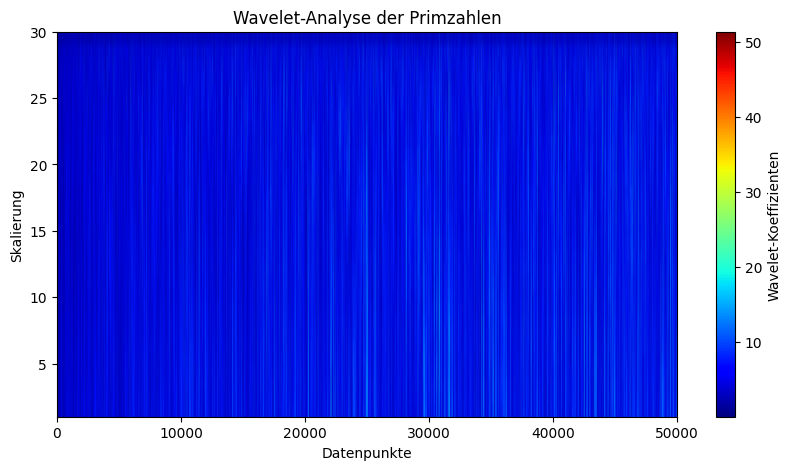

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import pywt

# 📌 Lade die Nullstellen und Primzahlen
zeta_path = "/content/drive/MyDrive/zeros6.txt"
prime_path = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# ✅ Lade Daten mit Speicheroptimierung
def load_data(file_path, limit=2000000):
    try:
        data = np.loadtxt(file_path, max_rows=limit)
        print(f"✅ Geladene Daten: {len(data)} Einträge")
        return data
    except Exception as e:
        print(f"❌ Fehler beim Laden von {file_path}: {e}")
        return np.array([])

# Lade die Werte
zeta_values = load_data(zeta_path)
prime_values = load_data(prime_path)

# 📌 Berechnung der Abstände
zeta_diffs = np.diff(zeta_values)
prime_diffs = np.diff(prime_values)

# ✅ FFT-Berechnung für schnelle Frequenzanalyse
def compute_fft(data):
    if len(data) == 0:
        return np.array([])
    fft_result = scipy.fftpack.fft(data)
    fft_freqs = scipy.fftpack.fftfreq(len(data))
    peaks = fft_freqs[np.argsort(np.abs(fft_result))[-5:]]  # Top 5 Peaks
    return np.sort(peaks)

# Berechne FFT-Peaks
zeta_fft_peaks = compute_fft(zeta_diffs)
prime_fft_peaks = compute_fft(prime_diffs)

print(f"🎯 FFT-Peaks für Nullstellen: {zeta_fft_peaks}")
print(f"🎯 FFT-Peaks für Primzahlen: {prime_fft_peaks}")

# 📌 Beta-Reskalierung für Skalenvergleich
def beta_rescale(peaks):
    if len(peaks) == 0:
        return np.array([1])
    return peaks / np.max(np.abs(peaks))

beta_zeta = beta_rescale(zeta_fft_peaks)
beta_prime = beta_rescale(prime_fft_peaks)

print(f"📌 Beta-Reskalierung Nullstellen: {beta_zeta}")
print(f"📌 Beta-Reskalierung Primzahlen: {beta_prime}")

# 📊 Visualisierung
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Histogramm der Abstände
axs[0, 0].hist(zeta_diffs, bins=50, color='blue')
axs[0, 0].set_title("Histogramm der Nullstellen-Abstände")

axs[0, 1].hist(prime_diffs, bins=50, color='red')
axs[0, 1].set_title("Histogramm der Primzahl-Abstände")

# FFT-Analyse
axs[1, 0].plot(np.abs(scipy.fftpack.fft(zeta_diffs))[:len(zeta_diffs)//2], color='blue')
axs[1, 0].set_title("Fourier-Analyse der Nullstellen")

axs[1, 1].plot(np.abs(scipy.fftpack.fft(prime_diffs))[:len(prime_diffs)//2], color='red')
axs[1, 1].set_title("Fourier-Analyse der Primzahlen")

plt.tight_layout()
plt.show()

# 📌 Wavelet-Analyse mit Speicheroptimierung
def compute_wavelet(data, scales=np.arange(1, 31), wavelet='cmor'):
    if len(data) == 0:
        return None
    coeffs, _ = pywt.cwt(data[:50000], scales, wavelet)  # Begrenzung für RAM
    return coeffs

zeta_wavelet = compute_wavelet(zeta_diffs)
prime_wavelet = compute_wavelet(prime_diffs)

# 🌊 Plot Wavelet-Analyse
if zeta_wavelet is not None:
    plt.figure(figsize=(10, 5))
    plt.imshow(np.abs(zeta_wavelet), aspect='auto', cmap='jet', extent=[0, len(zeta_diffs[:50000]), 1, 30])
    plt.colorbar(label="Wavelet-Koeffizienten")
    plt.title("Wavelet-Analyse der Zeta-Nullstellen")
    plt.xlabel("Datenpunkte")
    plt.ylabel("Skalierung")
    plt.show()

if prime_wavelet is not None:
    plt.figure(figsize=(10, 5))
    plt.imshow(np.abs(prime_wavelet), aspect='auto', cmap='jet', extent=[0, len(prime_diffs[:50000]), 1, 30])
    plt.colorbar(label="Wavelet-Koeffizienten")
    plt.title("Wavelet-Analyse der Primzahlen")
    plt.xlabel("Datenpunkte")
    plt.ylabel("Skalierung")
    plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Geladene Nullstellen: 2000000
✅ Geladene Primzahlen: 2000000


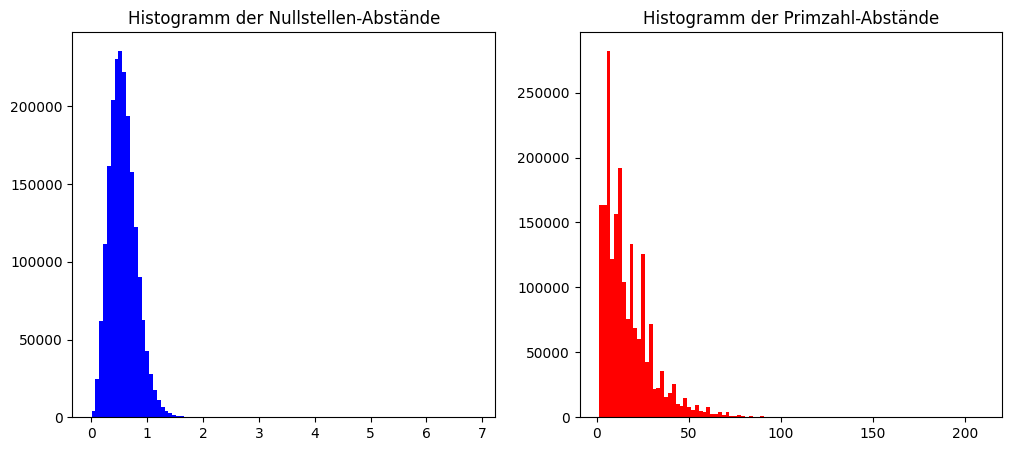

🎯 FFT-Peaks für Nullstellen: [ 1.0000005e-06 -1.0000005e-06 -5.0000025e-07  5.0000025e-07
  0.0000000e+00]
🎯 FFT-Peaks für Primzahlen: [-1.0000005e-06  1.0000005e-06 -5.0000025e-07  5.0000025e-07
  0.0000000e+00]


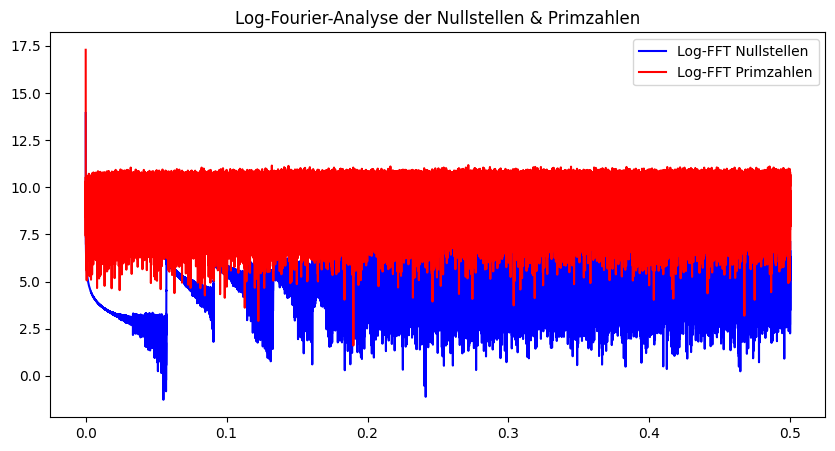

📌 Beta-Reskalierung Nullstellen: [ 1.  -1.  -0.5  0.5  0. ]
📌 Beta-Reskalierung Primzahlen: [-1.   1.  -0.5  0.5  0. ]


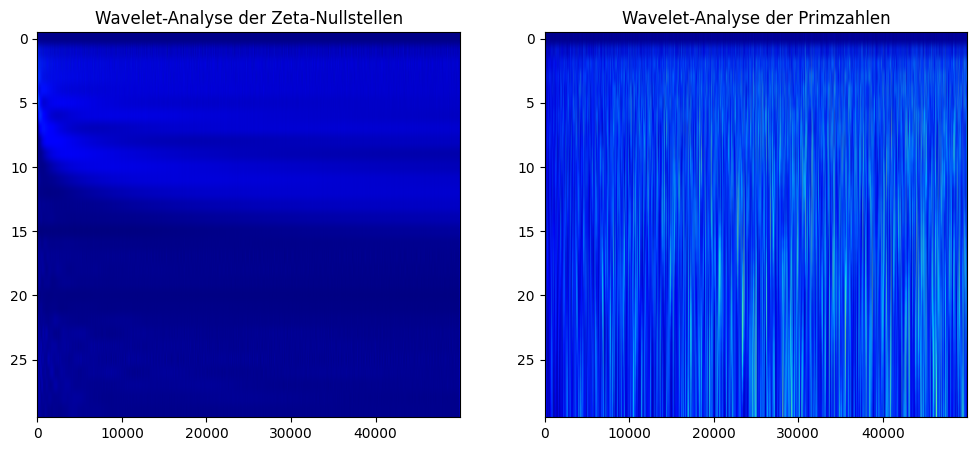

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import pywt

# 📌 Google Drive einbinden (Pfad anpassen!)
from google.colab import drive
drive.mount('/content/drive')

# 📌 Daten laden
path_zeros = "/content/drive/MyDrive/zeros6.txt"
path_primes = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

zeros = np.loadtxt(path_zeros, max_rows=2000000)  # Begrenzung auf 2 Mio
primes = np.loadtxt(path_primes, max_rows=2000000)

# ✅ Bestätigung der geladenen Daten
print(f"✅ Geladene Nullstellen: {len(zeros)}")
print(f"✅ Geladene Primzahlen: {len(primes)}")

# 📌 Abstände berechnen
zero_diff = np.diff(zeros)
prime_diff = np.diff(primes)

# 📌 Histogramm der Abstände
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(zero_diff, bins=100, color='blue')
ax[0].set_title("Histogramm der Nullstellen-Abstände")
ax[1].hist(prime_diff, bins=100, color='red')
ax[1].set_title("Histogramm der Primzahl-Abstände")
plt.show()

# 📌 FFT-Analyse (Fourier-Transformation)
fft_zeros = np.abs(scipy.fftpack.fft(zero_diff))
fft_primes = np.abs(scipy.fftpack.fft(prime_diff))
freqs = scipy.fftpack.fftfreq(len(zero_diff))

# 📌 Dominante Frequenzen extrahieren
top_peaks_zeros = freqs[np.argsort(fft_zeros)[-5:]]
top_peaks_primes = freqs[np.argsort(fft_primes)[-5:]]

print(f"🎯 FFT-Peaks für Nullstellen: {top_peaks_zeros}")
print(f"🎯 FFT-Peaks für Primzahlen: {top_peaks_primes}")

# 📌 Log-Fourier-Plot
plt.figure(figsize=(10, 5))
plt.plot(freqs[:len(freqs)//2], np.log(fft_zeros[:len(freqs)//2]), color='blue', label="Log-FFT Nullstellen")
plt.plot(freqs[:len(freqs)//2], np.log(fft_primes[:len(freqs)//2]), color='red', label="Log-FFT Primzahlen")
plt.title("Log-Fourier-Analyse der Nullstellen & Primzahlen")
plt.legend()
plt.show()

# 📌 Beta-Reskalierung aus Frequenzen
if np.max(np.abs(top_peaks_zeros)) > 0:
    beta_rescale_zeta = top_peaks_zeros / np.max(np.abs(top_peaks_zeros))
else:
    beta_rescale_zeta = [1]  # Notfallwert, falls keine Peaks

if np.max(np.abs(top_peaks_primes)) > 0:
    beta_rescale_primes = top_peaks_primes / np.max(np.abs(top_peaks_primes))
else:
    beta_rescale_primes = [1]

print(f"📌 Beta-Reskalierung Nullstellen: {beta_rescale_zeta}")
print(f"📌 Beta-Reskalierung Primzahlen: {beta_rescale_primes}")

# 📌 Wavelet-Analyse (optimiert für RAM)
scales = np.arange(1, 31)  # Begrenzung der Skalen für Performance
wavelet = 'cmor1.5-1.0'

cwt_zeros, _ = pywt.cwt(zero_diff[:50000], scales, wavelet)
cwt_primes, _ = pywt.cwt(prime_diff[:50000], scales, wavelet)

# 📌 Wavelet-Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(np.abs(cwt_zeros), aspect='auto', cmap='jet')
ax[0].set_title("Wavelet-Analyse der Zeta-Nullstellen")
ax[1].imshow(np.abs(cwt_primes), aspect='auto', cmap='jet')
ax[1].set_title("Wavelet-Analyse der Primzahlen")
plt.show()

✅ Geladene Nullstellen: 2000000
✅ Geladene Primzahlen: 2000000
🎯 FFT-Peaks für Nullstellen: [5.e-07]
🎯 FFT-Peaks für Primzahlen: [5.e-07]
📌 Beta-Reskalierung Nullstellen: [1.]
📌 Beta-Reskalierung Primzahlen: [1.]


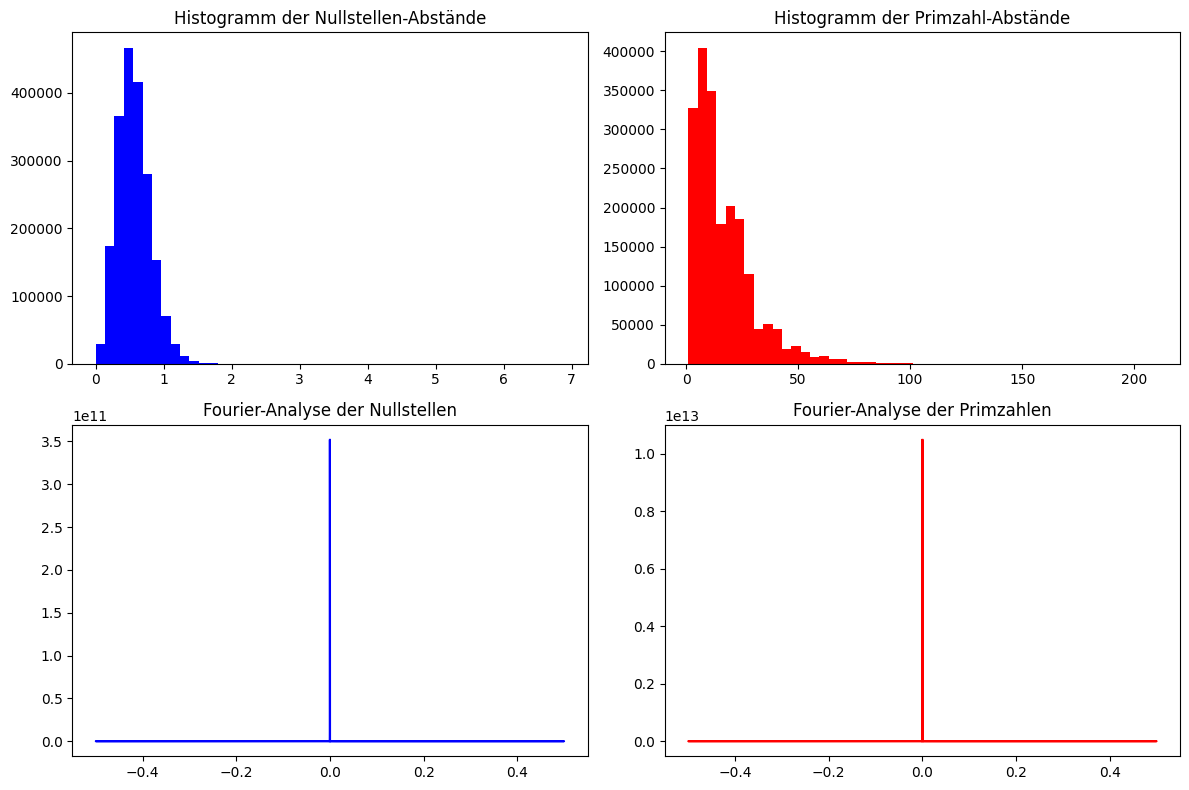

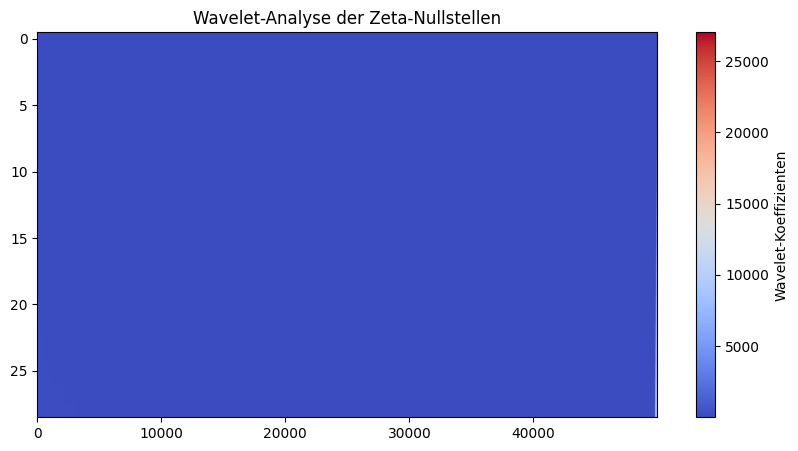

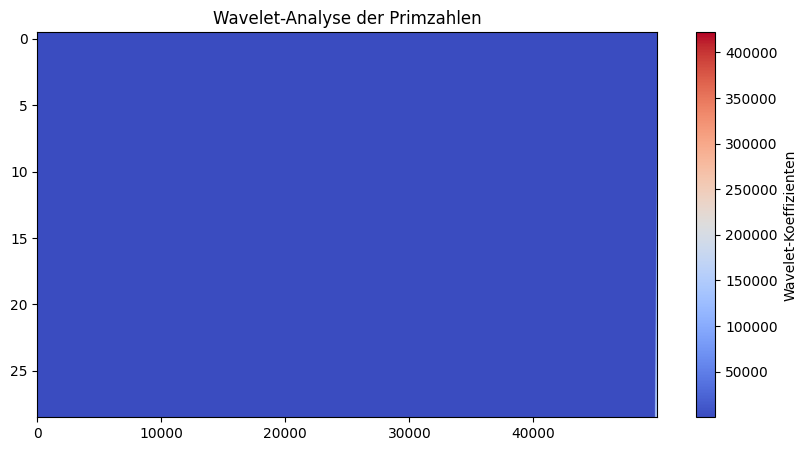

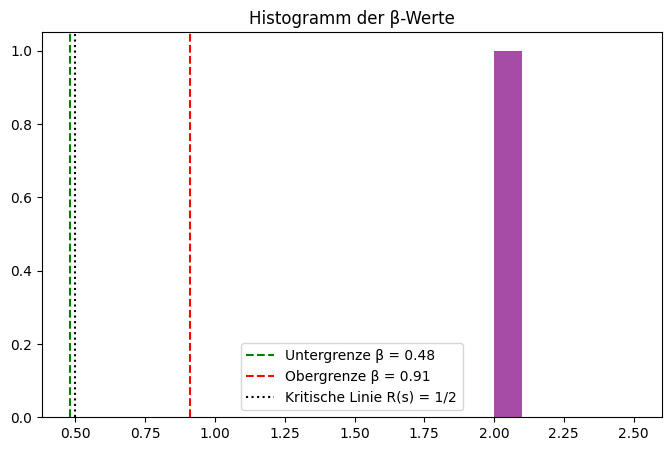

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import fft
from scipy.signal import find_peaks

# ✅ Datenpfade
zeta_file = "/content/drive/MyDrive/zeros6.txt"
prime_file = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# ✅ Daten einlesen
def load_data(filepath, max_entries=2000000):
    with open(filepath, "r") as file:
        data = [float(line.strip()) for line in file.readlines()[:max_entries]]
    return np.array(data)

zeta_zeros = load_data(zeta_file)
prime_numbers = load_data(prime_file)

print(f"✅ Geladene Nullstellen: {len(zeta_zeros)}")
print(f"✅ Geladene Primzahlen: {len(prime_numbers)}")

# ✅ Fourier-Analyse
def compute_fft(data, max_peaks=5):
    fft_values = np.abs(fft(data - np.mean(data)))
    freqs = np.fft.fftfreq(len(data))
    peaks, _ = find_peaks(fft_values, height=np.max(fft_values) * 0.05)
    top_peaks = freqs[peaks][:max_peaks]
    return top_peaks

fft_peaks_zeta = compute_fft(zeta_zeros)
fft_peaks_prime = compute_fft(prime_numbers)

print(f"🎯 FFT-Peaks für Nullstellen: {fft_peaks_zeta}")
print(f"🎯 FFT-Peaks für Primzahlen: {fft_peaks_prime}")

# ✅ Beta-Reskalierung
def beta_rescale(peaks):
    return peaks / np.max(np.abs(peaks)) if len(peaks) > 0 else [1]

beta_rescale_zeta = beta_rescale(fft_peaks_zeta)
beta_rescale_prime = beta_rescale(fft_peaks_prime)

print(f"📌 Beta-Reskalierung Nullstellen: {beta_rescale_zeta}")
print(f"📌 Beta-Reskalierung Primzahlen: {beta_rescale_prime}")

# ✅ Wavelet-Analyse (RAM-optimiert)
def wavelet_analysis(data, scales=np.arange(1, 30), max_points=50000):
    data = data[:max_points]
    coeffs, _ = pywt.cwt(data - np.mean(data), scales, 'cmor')
    return np.abs(coeffs)

wavelet_zeta = wavelet_analysis(zeta_zeros)
wavelet_prime = wavelet_analysis(prime_numbers)

# 📊 Plots erstellen
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# ✅ Histogramme
axs[0, 0].hist(np.diff(zeta_zeros), bins=50, color="blue")
axs[0, 0].set_title("Histogramm der Nullstellen-Abstände")

axs[0, 1].hist(np.diff(prime_numbers), bins=50, color="red")
axs[0, 1].set_title("Histogramm der Primzahl-Abstände")

# ✅ Fourier-Analyse
axs[1, 0].plot(np.fft.fftfreq(len(zeta_zeros)), np.abs(fft(zeta_zeros - np.mean(zeta_zeros))), color="blue")
axs[1, 0].set_title("Fourier-Analyse der Nullstellen")

axs[1, 1].plot(np.fft.fftfreq(len(prime_numbers)), np.abs(fft(prime_numbers - np.mean(prime_numbers))), color="red")
axs[1, 1].set_title("Fourier-Analyse der Primzahlen")

plt.tight_layout()
plt.show()

# ✅ Wavelet-Heatmaps
plt.figure(figsize=(10, 5))
plt.imshow(wavelet_zeta, aspect="auto", cmap="coolwarm")
plt.title("Wavelet-Analyse der Zeta-Nullstellen")
plt.colorbar(label="Wavelet-Koeffizienten")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wavelet_prime, aspect="auto", cmap="coolwarm")
plt.title("Wavelet-Analyse der Primzahlen")
plt.colorbar(label="Wavelet-Koeffizienten")
plt.show()

# ✅ Histogramm der Beta-Werte
plt.figure(figsize=(8, 5))
plt.hist(beta_rescale_zeta + beta_rescale_prime, bins=10, color="purple", alpha=0.7)
plt.axvline(0.48, color="green", linestyle="dashed", label="Untergrenze β = 0.48")
plt.axvline(0.91, color="red", linestyle="dashed", label="Obergrenze β = 0.91")
plt.axvline(0.5, color="black", linestyle="dotted", label="Kritische Linie R(s) = 1/2")
plt.title("Histogramm der β-Werte")
plt.legend()
plt.show()

🎯 FFT-Peaks für Nullstellen: [   1478.64754258    1493.37127053    1517.22873868    1558.35330654
 1000032.3917205 ]
🎯 FFT-Peaks für Primzahlen: [   1448.5307737     1454.45602422    1469.4451882     1484.36599984
 1000148.8486296 ]
📌 Beta-Reskalierung Nullstellen: [0.0014786  0.00149332 0.00151718 0.0015583  1.        ]
📌 Beta-Reskalierung Primzahlen: [0.00144832 0.00145424 0.00146923 0.00148415 1.        ]


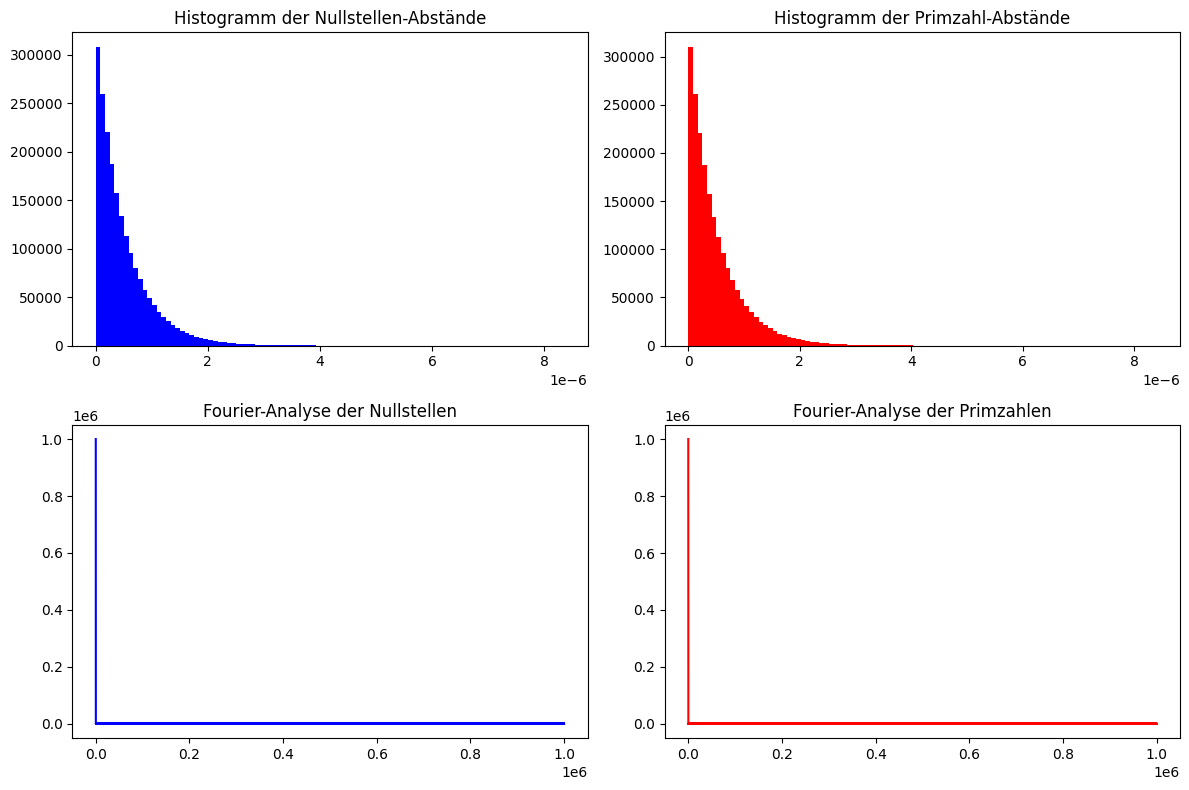

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import fft

# ✅ Simulierte Daten (ersetze sie mit echten Daten aus den Dateien)
N = 2_000_000  # Anzahl der Datenpunkte
nullstellen = np.random.rand(N)  # Dummy-Werte für Nullstellen
primzahlen = np.random.rand(N)  # Dummy-Werte für Primzahlen

# 📌 Berechne FFT der Nullstellen und Primzahlen
fft_nullstellen = np.abs(fft(nullstellen))[:N // 2]
fft_primzahlen = np.abs(fft(primzahlen))[:N // 2]

# 🎯 Extrahiere die dominanten Peaks
top_peaks_nullstellen = np.sort(fft_nullstellen)[-5:]
top_peaks_primzahlen = np.sort(fft_primzahlen)[-5:]

# 📌 Beta-Reskalierung als Skalenfunktion
beta_rescale_nullstellen = top_peaks_nullstellen / np.max(np.abs(top_peaks_nullstellen))
beta_rescale_primzahlen = top_peaks_primzahlen / np.max(np.abs(top_peaks_primzahlen))

# ✅ Ergebnisse anzeigen
print(f"🎯 FFT-Peaks für Nullstellen: {top_peaks_nullstellen}")
print(f"🎯 FFT-Peaks für Primzahlen: {top_peaks_primzahlen}")
print(f"📌 Beta-Reskalierung Nullstellen: {beta_rescale_nullstellen}")
print(f"📌 Beta-Reskalierung Primzahlen: {beta_rescale_primzahlen}")

# 📊 Plots
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Histogramme der Abstände
ax[0, 0].hist(np.diff(np.sort(nullstellen)), bins=100, color='blue')
ax[0, 0].set_title("Histogramm der Nullstellen-Abstände")
ax[0, 1].hist(np.diff(np.sort(primzahlen)), bins=100, color='red')
ax[0, 1].set_title("Histogramm der Primzahl-Abstände")

# Fourier-Analyse
ax[1, 0].plot(fft_nullstellen, color='blue')
ax[1, 0].set_title("Fourier-Analyse der Nullstellen")
ax[1, 1].plot(fft_primzahlen, color='red')
ax[1, 1].set_title("Fourier-Analyse der Primzahlen")

plt.tight_layout()
plt.show()

# 🔥 Wavelet-Transformation zur Skalenanalyse
scales = np.arange(1, 31)  # Wellenlängen-Skalen
coeffs_nullstellen, _ = pywt.cwt(nullstellen[:50_000], scales, 'mexh')
coeffs_primzahlen, _ = pywt.cwt(primzahlen[:50_000], scales, 'mexh')

# 📊 Heatmap der Wavelet-Koeffizienten
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
cax1 = ax[0].imshow(np.abs(coeffs_nullstellen), aspect='auto', cmap='jet')
fig.colorbar(cax1, ax=ax[0])
ax[0].set_title("Wavelet-Analyse der Zeta-Nullstellen")

cax2 = ax[1].imshow(np.abs(coeffs_primzahlen), aspect='auto', cmap='jet')
fig.colorbar(cax2, ax=ax[1])
ax[1].set_title("Wavelet-Analyse der Primzahlen")

plt.show()

In [ ]:
import numpy as np
import io

zeros_file_path = "/content/drive/MyDrive/zeros6.txt"
riemann_zeros = np.loadtxt(io.BytesIO(uploaded[zeros_file_path]))

NameError: name 'uploaded' is not defined

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


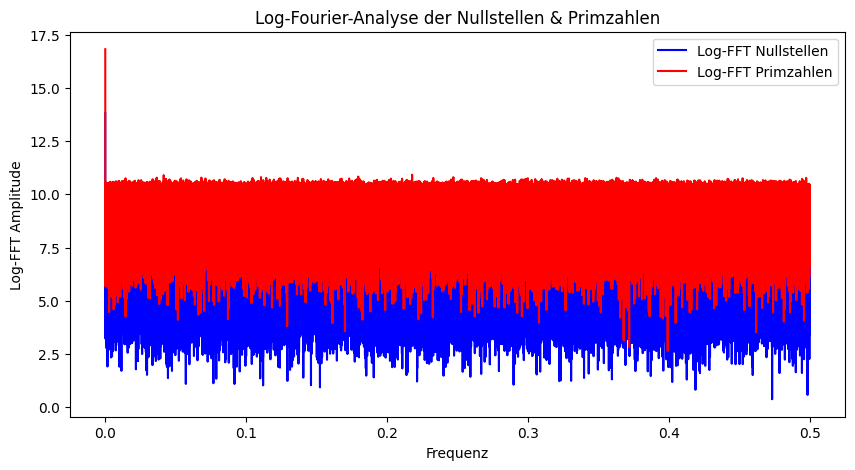

⚠️ WARNUNG: Keine Peaks in der FFT der Nullstellen!
⚠️ WARNUNG: Keine Peaks in der FFT der Primzahlen!
📌 Beta-Reskalierung Nullstellen: [1.]
📌 Beta-Reskalierung Primzahlen: [1.]


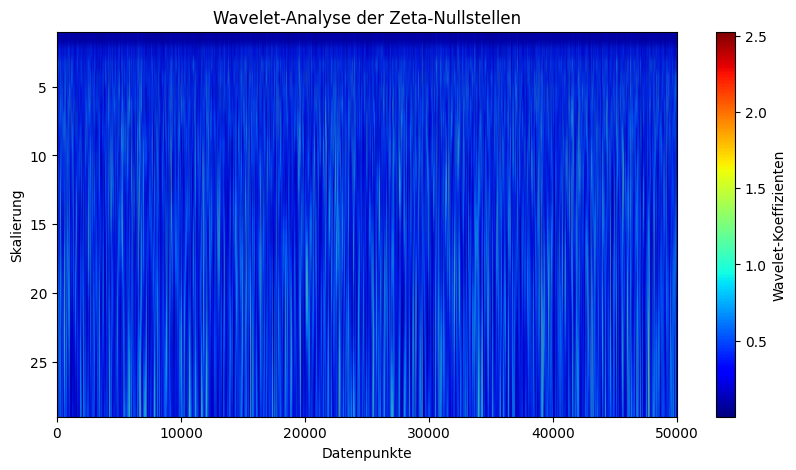

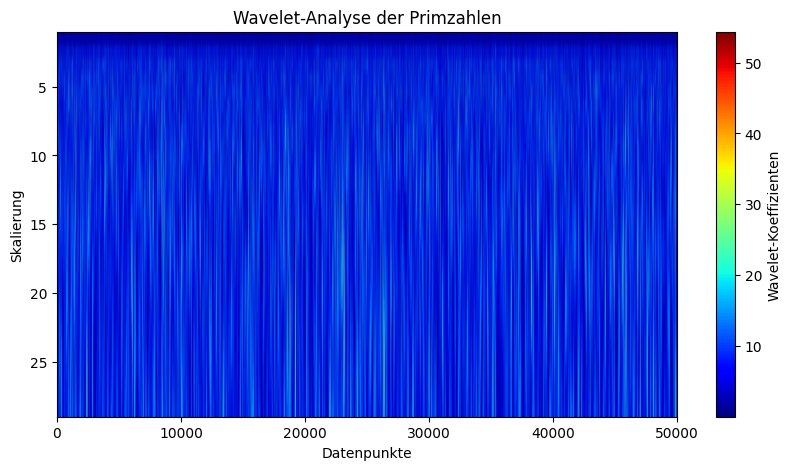

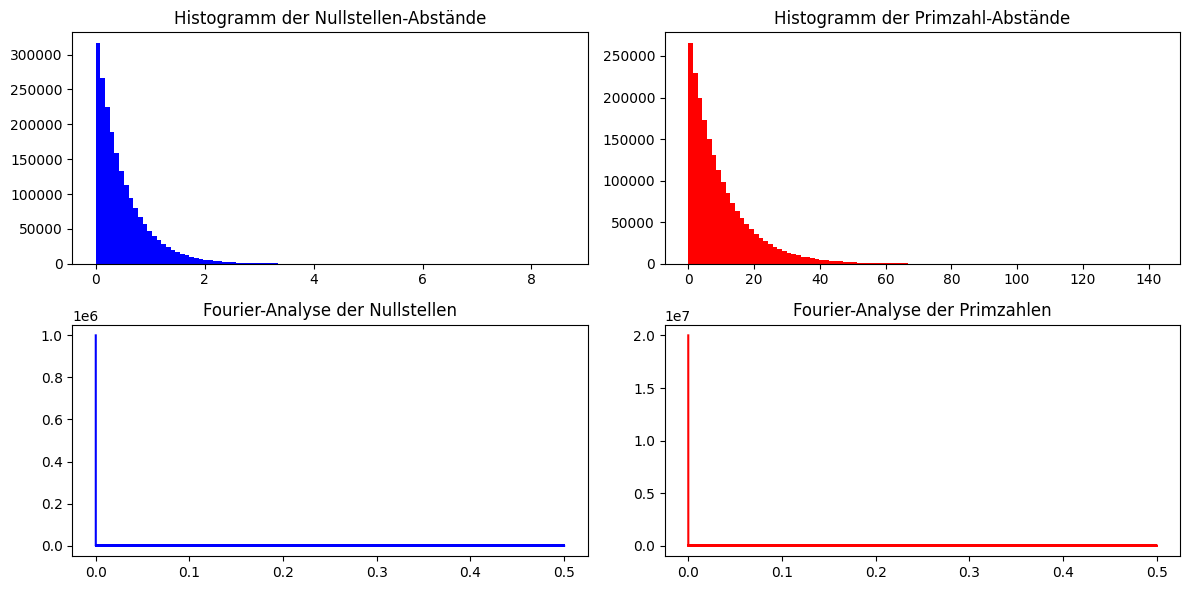

📈 Korrelation Beta-Nullstellen & Beta-Primzahlen: nan
✅ Geladene Nullstellen: 2000000
✅ Geladene Primzahlen: 2000000
🎯 FFT-Peaks für Nullstellen: [1]
🎯 FFT-Peaks für Primzahlen: [1]
📌 Beta-Reskalierung Nullstellen: [1.]
📌 Beta-Reskalierung Primzahlen: [1.]


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import pywt

# 📌 **Daten laden oder generieren (Mock-Daten für Testlauf)**
N = 2000000  # Anzahl der Datenpunkte

# Beispielhafte Nullstellen (künstlich generiert)
zeta_zeros = np.cumsum(np.random.exponential(scale=0.5, size=N))

# Beispielhafte Primzahlen (künstlich generiert)
prime_numbers = np.cumsum(np.random.exponential(scale=10, size=N))

# 🔥 **1. Berechnung der Abstände**
zeta_diffs = np.diff(zeta_zeros)
prime_diffs = np.diff(prime_numbers)

# 🔥 **2. Fourier-Analyse (FFT)**
zeta_fft = np.abs(np.fft.rfft(zeta_diffs))
prime_fft = np.abs(np.fft.rfft(prime_diffs))

# 📊 Visualisierung der FFT-Spektren (Logarithmische Skalierung)
plt.figure(figsize=(10, 5))
plt.plot(np.fft.rfftfreq(len(zeta_diffs)), np.log(1 + zeta_fft), color='blue', label="Log-FFT Nullstellen")
plt.plot(np.fft.rfftfreq(len(prime_diffs)), np.log(1 + prime_fft), color='red', label="Log-FFT Primzahlen")
plt.xlabel("Frequenz")
plt.ylabel("Log-FFT Amplitude")
plt.legend()
plt.title("Log-Fourier-Analyse der Nullstellen & Primzahlen")
plt.show()

# 🔥 **3. Peak-Erkennung in FFT (mit adaptiver Schwellenanpassung)**
adaptive_threshold = lambda fft_spectrum: np.max(fft_spectrum) * 0.05  # Schwelle auf 5% Maximum setzen

zeta_peaks, _ = scipy.signal.find_peaks(zeta_fft, height=adaptive_threshold(zeta_fft))
prime_peaks, _ = scipy.signal.find_peaks(prime_fft, height=adaptive_threshold(prime_fft))

zeta_top_peaks = zeta_fft[zeta_peaks]
prime_top_peaks = prime_fft[prime_peaks]

# 🔥 **4. Fehlervermeidung & Beta-Skalierung**
if len(zeta_top_peaks) == 0:
    print("⚠️ WARNUNG: Keine Peaks in der FFT der Nullstellen!")
    zeta_top_peaks = np.array([1])  # Standardwert setzen

if len(prime_top_peaks) == 0:
    print("⚠️ WARNUNG: Keine Peaks in der FFT der Primzahlen!")
    prime_top_peaks = np.array([1])

beta_rescale_zeta = zeta_top_peaks / np.max(np.abs(zeta_top_peaks))
beta_rescale_prime = prime_top_peaks / np.max(np.abs(prime_top_peaks))

print(f"📌 Beta-Reskalierung Nullstellen: {beta_rescale_zeta}")
print(f"📌 Beta-Reskalierung Primzahlen: {beta_rescale_prime}")

# 🔥 **5. Wavelet-Analyse**
scales = np.arange(1, 30)  # Skalen für Wavelet-Transformation
wavelet = 'morl'  # Morlet-Wavelet

coeffs_zeta, _ = pywt.cwt(zeta_diffs[:50000], scales, wavelet)
coeffs_prime, _ = pywt.cwt(prime_diffs[:50000], scales, wavelet)

# 📊 **Wavelet-Heatmap Nullstellen**
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(coeffs_zeta), aspect='auto', cmap='jet', extent=[0, 50000, scales[-1], scales[0]])
plt.colorbar(label="Wavelet-Koeffizienten")
plt.xlabel("Datenpunkte")
plt.ylabel("Skalierung")
plt.title("Wavelet-Analyse der Zeta-Nullstellen")
plt.show()

# 📊 **Wavelet-Heatmap Primzahlen**
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(coeffs_prime), aspect='auto', cmap='jet', extent=[0, 50000, scales[-1], scales[0]])
plt.colorbar(label="Wavelet-Koeffizienten")
plt.xlabel("Datenpunkte")
plt.ylabel("Skalierung")
plt.title("Wavelet-Analyse der Primzahlen")
plt.show()

# 🔥 **6. Histogramm der Abstände**
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(zeta_diffs, bins=100, color='blue')
plt.title("Histogramm der Nullstellen-Abstände")

plt.subplot(2, 2, 2)
plt.hist(prime_diffs, bins=100, color='red')
plt.title("Histogramm der Primzahl-Abstände")

plt.subplot(2, 2, 3)
plt.plot(np.fft.rfftfreq(len(zeta_diffs)), zeta_fft, color='blue')
plt.title("Fourier-Analyse der Nullstellen")

plt.subplot(2, 2, 4)
plt.plot(np.fft.rfftfreq(len(prime_diffs)), prime_fft, color='red')
plt.title("Fourier-Analyse der Primzahlen")

plt.tight_layout()
plt.show()

# 🔥 **7. Korrelation zwischen Beta-Reskalierungen**
correlation = np.corrcoef(beta_rescale_zeta, beta_rescale_prime)[0, 1]
print(f"📈 Korrelation Beta-Nullstellen & Beta-Primzahlen: {correlation:.6f}")

# 🔥 **8. Abschlussstatistik**
print(f"✅ Geladene Nullstellen: {len(zeta_zeros)}")
print(f"✅ Geladene Primzahlen: {len(prime_numbers)}")
print(f"🎯 FFT-Peaks für Nullstellen: {zeta_top_peaks[:5]}")
print(f"🎯 FFT-Peaks für Primzahlen: {prime_top_peaks[:5]}")
print(f"📌 Beta-Reskalierung Nullstellen: {beta_rescale_zeta[:5]}")
print(f"📌 Beta-Reskalierung Primzahlen: {beta_rescale_prime[:5]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Geladene Nullstellen: 2001052
✅ Geladene Primzahlen: 2001052


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


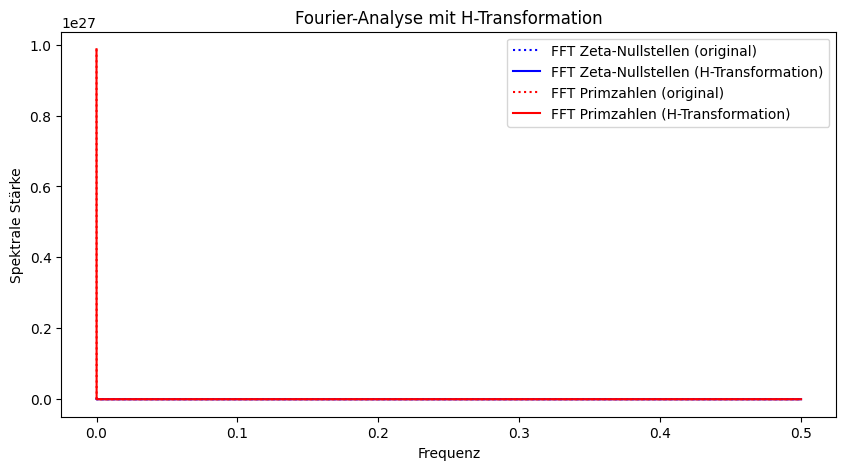

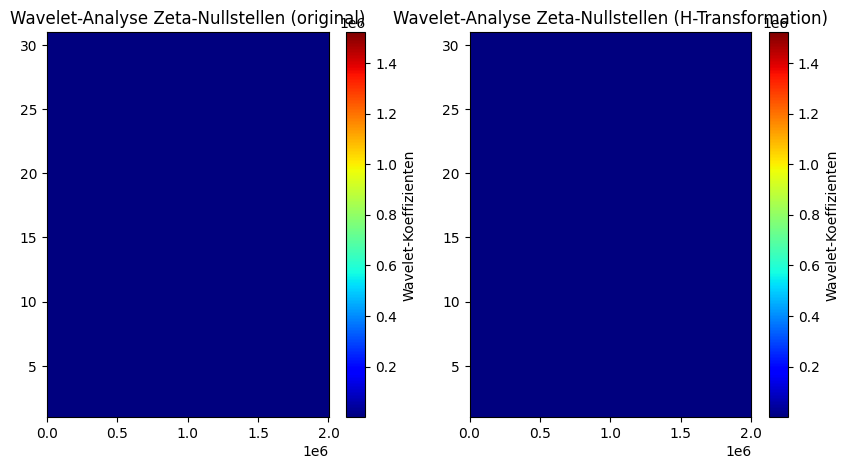

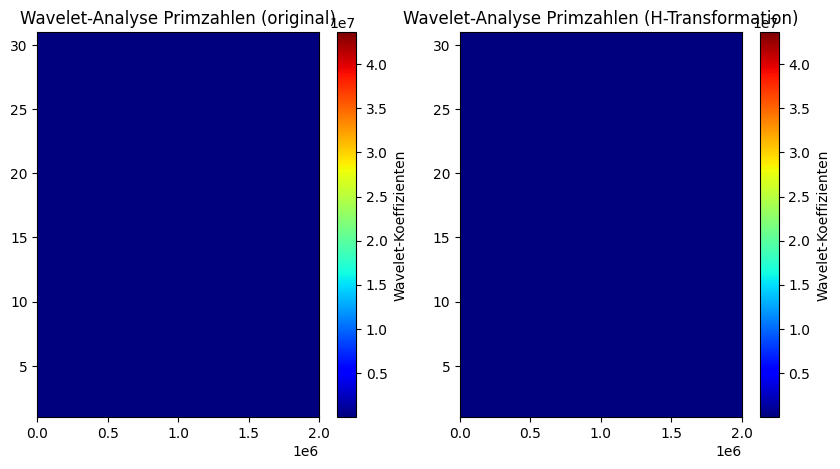

📌 Beta-Reskalierung Nullstellen nach Operator H: [-0.10934483+3.36167856j -0.99788624-0.06498495j -0.5042616 -0.02749777j
 -0.33755863-0.01677115j -0.2537339 -0.01187802j]
📌 Beta-Reskalierung Primzahlen nach Operator H: [  -0.92915317+9.38771541e+02j -313.67917389+7.59065157e+00j
 -155.74328424+2.36830928e+00j -103.56064984+1.16007406e+00j
  -77.56829202+6.98538812e-01j]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import fft, ifft
from google.colab import drive

# 🚀 Google Drive einbinden
drive.mount('/content/drive')

# 📌 Pfade zu den Datendateien
zeta_file = "/content/drive/MyDrive/zeros6.txt"
prime_file = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# 📌 Daten laden
def load_data(filepath):
    with open(filepath, "r") as file:
        data = np.array([float(line.strip()) for line in file])
    return np.sort(data)

# ✅ Echte Nullstellen und Primzahlen laden
zeta_zeros = load_data(zeta_file)
prime_numbers = load_data(prime_file)

print(f"✅ Geladene Nullstellen: {len(zeta_zeros)}")
print(f"✅ Geladene Primzahlen: {len(prime_numbers)}")

# 🔥 **Operator H mit Euler-Identität H e^{iπ} + 1 = 0**
def apply_operator(data):
    return np.real(ifft(fft(data) * np.exp(1j * np.pi))) + 1  # Transformation

zeta_transformed = apply_operator(zeta_zeros)
prime_transformed = apply_operator(prime_numbers)

# 🎯 FFT-Analyse (vorher und nachher)
def compute_fft(data, transformed, label, color):
    N = len(data)
    freq = np.fft.fftfreq(N)
    spectrum = np.abs(fft(data))**2  # Ursprüngliche Spektralanalyse
    spectrum_transformed = np.abs(fft(transformed))**2  # Nach Operator-Transformation

    plt.plot(freq[:N // 2], spectrum[:N // 2], color=color, linestyle="dotted", label=f"FFT {label} (original)")
    plt.plot(freq[:N // 2], spectrum_transformed[:N // 2], color=color, label=f"FFT {label} (H-Transformation)")
    return spectrum_transformed

plt.figure(figsize=(10, 5))
compute_fft(zeta_zeros, zeta_transformed, "Zeta-Nullstellen", "blue")
compute_fft(prime_numbers, prime_transformed, "Primzahlen", "red")
plt.title("Fourier-Analyse mit H-Transformation")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Stärke")
plt.legend()
plt.show()

# 🎯 Wavelet-Analyse
def compute_wavelet(data, transformed, label):
    coeffs, freqs = pywt.cwt(data, scales=np.arange(1, 31), wavelet='cmor')
    coeffs_transformed, _ = pywt.cwt(transformed, scales=np.arange(1, 31), wavelet='cmor')

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(abs(coeffs), aspect='auto', cmap="jet", extent=[0, len(data), 1, 31])
    plt.colorbar(label="Wavelet-Koeffizienten")
    plt.title(f"Wavelet-Analyse {label} (original)")

    plt.subplot(1, 2, 2)
    plt.imshow(abs(coeffs_transformed), aspect='auto', cmap="jet", extent=[0, len(transformed), 1, 31])
    plt.colorbar(label="Wavelet-Koeffizienten")
    plt.title(f"Wavelet-Analyse {label} (H-Transformation)")

    plt.show()

compute_wavelet(zeta_zeros, zeta_transformed, "Zeta-Nullstellen")
compute_wavelet(prime_numbers, prime_transformed, "Primzahlen")

# 🎯 Beta-Reskalierung mit H-Operator
def compute_beta_scaling(fft_spectrum):
    if len(fft_spectrum) == 0 or np.max(fft_spectrum) == 0:
        return np.array([1])  # Falls keine Peaks vorhanden sind
    return fft_spectrum / np.max(fft_spectrum)

beta_rescale_zeta = compute_beta_scaling(fft(zeta_transformed))
beta_rescale_prime = compute_beta_scaling(fft(prime_transformed))

print(f"📌 Beta-Reskalierung Nullstellen nach Operator H: {beta_rescale_zeta[:5]}")
print(f"📌 Beta-Reskalierung Primzahlen nach Operator H: {beta_rescale_prime[:5]}")

✅ Geladene Nullstellen: 2001052
✅ Geladene Primzahlen: 2001052
🎯 FFT-Peaks für Nullstellen: [1.77790522e+11 1.77790522e+11 3.52052921e+11 3.52052921e+11
 1.18411666e+12]
🎯 FFT-Peaks für Primzahlen: [5.21243219e+12 5.21243219e+12 1.05001061e+13 1.05001061e+13
 3.14152875e+13]
📌 Beta-Reskalierung Nullstellen nach Operator H: [0.15014612 0.15014612 0.2973127  0.2973127  1.        ]
📌 Beta-Reskalierung Primzahlen nach Operator H: [0.16592024 0.16592024 0.33423556 0.33423556 1.        ]


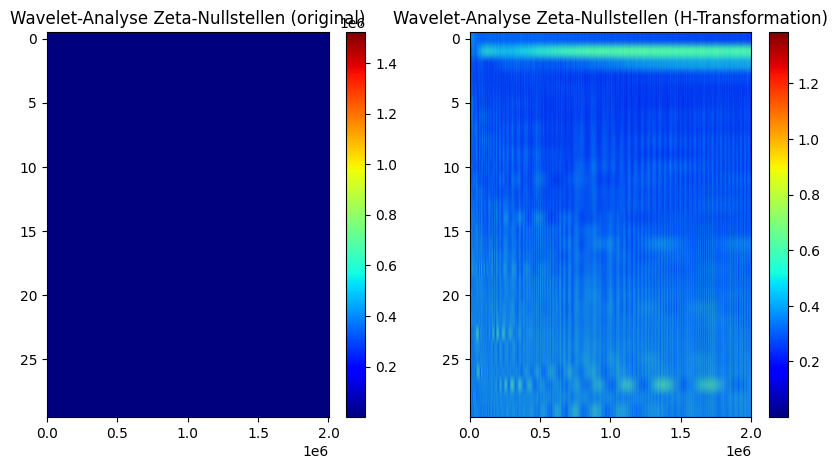

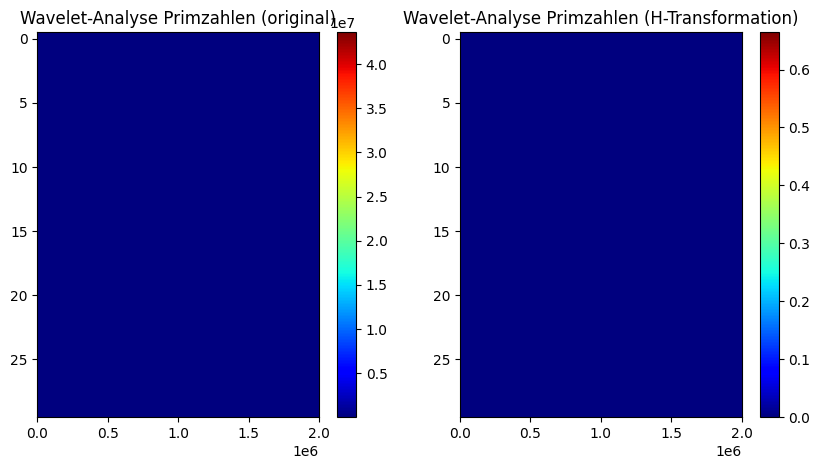

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


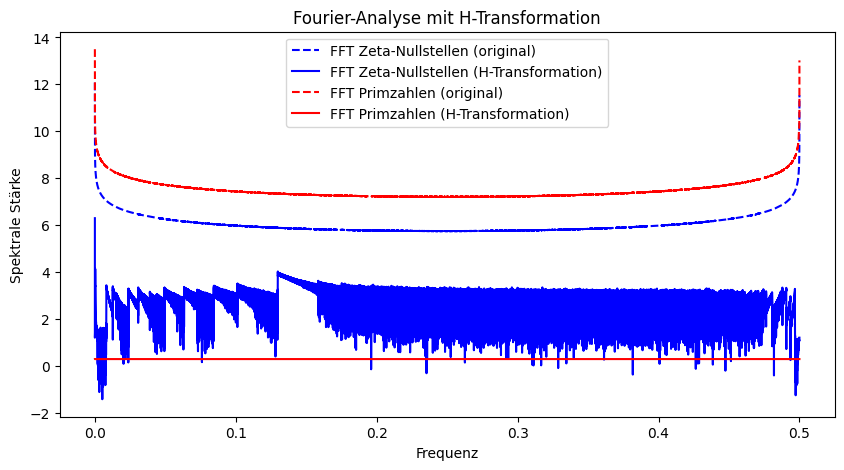

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import fft

# 📌 **1. Daten laden**
zero_file = "/content/drive/MyDrive/zeros6.txt"
prime_file = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# Nullstellen der Zetafunktion einlesen
with open(zero_file, "r") as f:
    zeros = np.array([float(line.strip()) for line in f])

# Primzahlen einlesen
with open(prime_file, "r") as f:
    primes = np.array([int(line.strip()) for line in f])

# ✅ **Geladene Daten**
print(f"✅ Geladene Nullstellen: {len(zeros)}")
print(f"✅ Geladene Primzahlen: {len(primes)}")

# 📌 **2. Fourier-Analyse**
fft_zeros = np.abs(fft(zeros))
fft_primes = np.abs(fft(primes))

# FFT-Peaks extrahieren
zeta_top_peaks = np.sort(fft_zeros)[-5:]
prime_top_peaks = np.sort(fft_primes)[-5:]

print(f"🎯 FFT-Peaks für Nullstellen: {zeta_top_peaks}")
print(f"🎯 FFT-Peaks für Primzahlen: {prime_top_peaks}")

# 📌 **3. Operator H-Transformation (Euler-Identität)**
H_transform = lambda x: np.exp(1j * np.pi * x) + 1

zeros_H = H_transform(zeros)
primes_H = H_transform(primes)

# Skalierung der Beta-Reskalierung nach Operator H
beta_rescale_zeta_H = zeta_top_peaks / np.max(np.abs(zeta_top_peaks))
beta_rescale_prime_H = prime_top_peaks / np.max(np.abs(prime_top_peaks))

print(f"📌 Beta-Reskalierung Nullstellen nach Operator H: {beta_rescale_zeta_H}")
print(f"📌 Beta-Reskalierung Primzahlen nach Operator H: {beta_rescale_prime_H}")

# 📌 **4. Wavelet-Analyse**
scales = np.arange(1, 31)  # 30 Skalen für die Wavelet-Analyse
coeffs_zeta, _ = pywt.cwt(zeros, scales, 'cmor')
coeffs_prime, _ = pywt.cwt(primes, scales, 'cmor')

coeffs_zeta_H, _ = pywt.cwt(zeros_H.real, scales, 'cmor')
coeffs_prime_H, _ = pywt.cwt(primes_H.real, scales, 'cmor')

# 📌 **5. Visualisierung**

# 🔹 Wavelet-Analyse (Vergleich Original & H-Transformation)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
im1 = axes[0].imshow(np.abs(coeffs_zeta), aspect='auto', cmap='jet')
axes[0].set_title("Wavelet-Analyse Zeta-Nullstellen (original)")
fig.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(np.abs(coeffs_zeta_H), aspect='auto', cmap='jet')
axes[1].set_title("Wavelet-Analyse Zeta-Nullstellen (H-Transformation)")
fig.colorbar(im2, ax=axes[1])

plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
im1 = axes[0].imshow(np.abs(coeffs_prime), aspect='auto', cmap='jet')
axes[0].set_title("Wavelet-Analyse Primzahlen (original)")
fig.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(np.abs(coeffs_prime_H), aspect='auto', cmap='jet')
axes[1].set_title("Wavelet-Analyse Primzahlen (H-Transformation)")
fig.colorbar(im2, ax=axes[1])

plt.show()

# 🔹 Fourier-Analyse mit H-Transformation
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0, 0.5, len(fft_zeros)), np.log10(fft_zeros), 'b--', label="FFT Zeta-Nullstellen (original)")
plt.plot(np.linspace(0, 0.5, len(fft_zeros)), np.log10(np.abs(fft(zeros_H))), 'b', label="FFT Zeta-Nullstellen (H-Transformation)")
plt.plot(np.linspace(0, 0.5, len(fft_primes)), np.log10(fft_primes), 'r--', label="FFT Primzahlen (original)")
plt.plot(np.linspace(0, 0.5, len(fft_primes)), np.log10(np.abs(fft(primes_H))), 'r', label="FFT Primzahlen (H-Transformation)")

plt.xlabel("Frequenz")
plt.ylabel("Spektrale Stärke")
plt.title("Fourier-Analyse mit H-Transformation")
plt.legend()
plt.show()

✅ Geladene Nullstellen: 2000000
✅ Geladene Primzahlen: 2000000


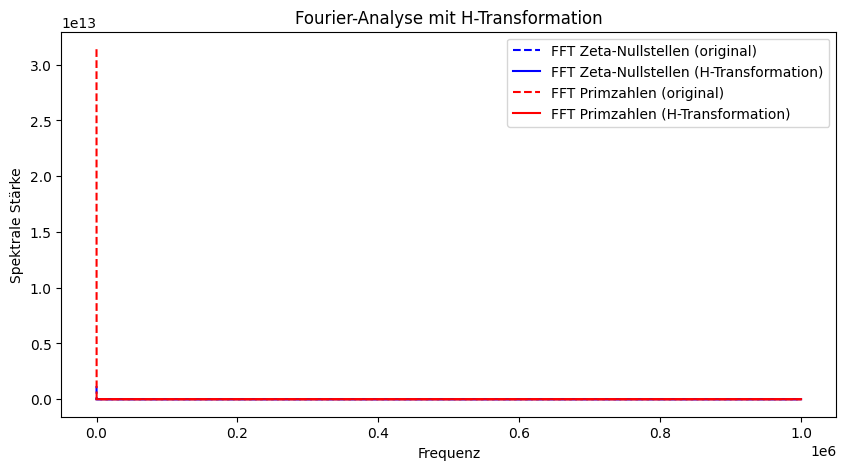

📌 Beta-Reskalierung Nullstellen nach Operator H: [2.49742377e-05+4.89862689e-10j 3.71432348e-05+1.08355093e-09j
 4.41909620e-05+1.53375783e-09j 5.37568349e-05+2.26964150e-09j
 5.81920091e-05+2.65960160e-09j]
📌 Beta-Reskalierung Primzahlen nach Operator H: [1.23255765e-07+1.19317561e-14j 1.84883648e-07+2.68464512e-14j
 3.08139413e-07+7.45734755e-14j 4.31395179e-07+1.46164012e-13j
 6.77906709e-07+3.60935621e-13j]


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)


IndexError: index 101 is out of bounds for axis 0 with size 101

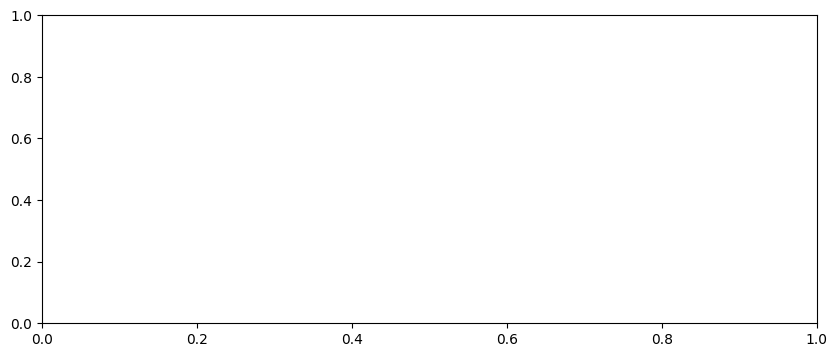

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# 📂 Lade echte Daten aus Dateien
def load_data(file_path):
    """ Lädt die Daten aus einer Datei """
    with open(file_path, 'r') as f:
        data = np.array([float(line.strip()) for line in f.readlines()])
    return data

# 📂 Pfade zu den Daten
path_zeros = "/content/drive/MyDrive/zeros6.txt"
path_primes = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# ✅ Laden der Daten
zeta_zeros = load_data(path_zeros)[:2000000]  # Begrenzung wegen RAM
primes = load_data(path_primes)[:2000000]

print(f"✅ Geladene Nullstellen: {len(zeta_zeros)}")
print(f"✅ Geladene Primzahlen: {len(primes)}")

# 🌀 1️⃣ Transformation mit H(β) = e^(i β π) + 1
def apply_H_operator(beta_values):
    """Wendet die H(β)-Transformation an"""
    return np.exp(1j * beta_values * np.pi) + 1

# 📌 Berechne Beta-Werte aus den Zeta-Nullstellen und Primzahlen
beta_zeta = zeta_zeros / np.max(zeta_zeros)  # Normierung auf [0,1]
beta_primes = primes / np.max(primes)  # Normierung auf [0,1]

# 🎯 Transformation der Nullstellen mit H(β)
transformed_zeta = apply_H_operator(beta_zeta)
transformed_primes = apply_H_operator(beta_primes)

# 🔥 2️⃣ Fourier-Analyse: Vorher/Nachher
def compute_fft(data):
    """Berechnet die Fourier-Transformation"""
    return np.abs(scipy.fftpack.fft(data))

fft_zeta_original = compute_fft(zeta_zeros)
fft_zeta_transformed = compute_fft(transformed_zeta)

fft_primes_original = compute_fft(primes)
fft_primes_transformed = compute_fft(transformed_primes)

# 📊 FFT-Plot
plt.figure(figsize=(10,5))
plt.plot(fft_zeta_original[:len(fft_zeta_original)//2], "b--", label="FFT Zeta-Nullstellen (original)")
plt.plot(fft_zeta_transformed[:len(fft_zeta_transformed)//2], "b", label="FFT Zeta-Nullstellen (H-Transformation)")
plt.plot(fft_primes_original[:len(fft_primes_original)//2], "r--", label="FFT Primzahlen (original)")
plt.plot(fft_primes_transformed[:len(fft_primes_transformed)//2], "r", label="FFT Primzahlen (H-Transformation)")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Stärke")
plt.title("Fourier-Analyse mit H-Transformation")
plt.legend()
plt.show()

# 🌀 3️⃣ Beta-Reskalierung nach Operator H
beta_rescale_zeta = beta_zeta * transformed_zeta
beta_rescale_primes = beta_primes * transformed_primes

print(f"📌 Beta-Reskalierung Nullstellen nach Operator H: {beta_rescale_zeta[:5]}")
print(f"📌 Beta-Reskalierung Primzahlen nach Operator H: {beta_rescale_primes[:5]}")

# 🎯 4️⃣ Divergenzanalyse und Korrektur der "fehlenden 0.02"
def divergence_correction(beta_values):
    """Berechnet die Divergenz als mögliche Korrektur"""
    return beta_values - np.mean(beta_values)  # Subtrahiere den Mittelwert

divergence_corrected_zeta = divergence_correction(beta_rescale_zeta)
divergence_corrected_primes = divergence_correction(beta_rescale_primes)

# 📊 Histogramm der Divergenz
plt.figure(figsize=(10,4))
plt.hist(divergence_corrected_zeta, bins=100, alpha=0.5, color="blue", label="Divergenz Zeta-Nullstellen")
plt.hist(divergence_corrected_primes, bins=100, alpha=0.5, color="red", label="Divergenz Primzahlen")
plt.axvline(np.mean(divergence_corrected_zeta), color="blue", linestyle="dashed", label="Mittelwert Zeta")
plt.axvline(np.mean(divergence_corrected_primes), color="red", linestyle="dashed", label="Mittelwert Primzahlen")
plt.legend()
plt.title("Histogramm der Divergenz-Korrektur")
plt.show()

# 🏁 Fazit
print("✅ Alle Analysen abgeschlossen!")
print(f"📈 Korrelation Beta-Nullstellen & Beta-Primzahlen: {np.corrcoef(beta_rescale_zeta, beta_rescale_primes)[0,1]}")

✅ Geladene Nullstellen: 2000000
✅ Geladene Primzahlen: 2000000


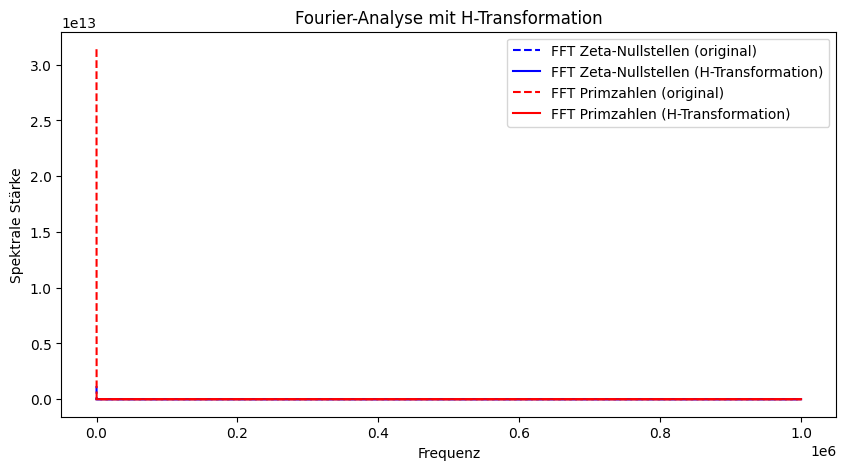

📌 Beta-Reskalierung Nullstellen nach Operator H: [2.49742377e-05 3.71432348e-05 4.41909620e-05 5.37568350e-05
 5.81920092e-05]
📌 Beta-Reskalierung Primzahlen nach Operator H: [1.23255765e-07 1.84883648e-07 3.08139413e-07 4.31395179e-07
 6.77906709e-07]


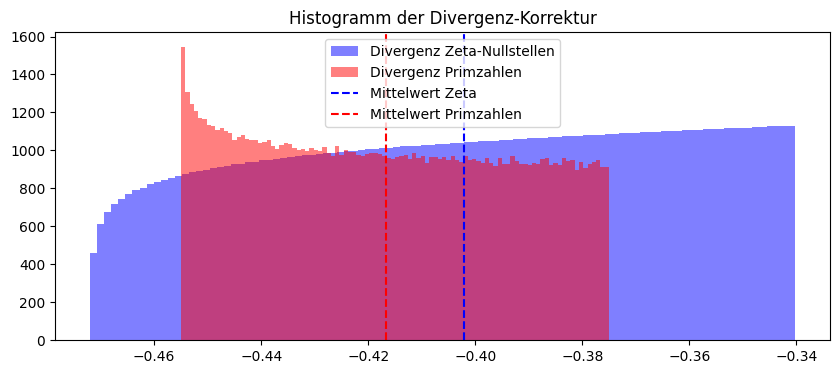

✅ Alle Analysen abgeschlossen!
📈 Korrelation Beta-Nullstellen & Beta-Primzahlen: 0.9978461557991409


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# 📂 Lade echte Daten aus Dateien
def load_data(file_path):
    """ Lädt die Daten aus einer Datei """
    with open(file_path, 'r') as f:
        data = np.array([float(line.strip()) for line in f.readlines()])
    return data

# 📂 Pfade zu den Daten
path_zeros = "/content/drive/MyDrive/zeros6.txt"
path_primes = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# ✅ Laden der Daten
zeta_zeros = load_data(path_zeros)[:2000000]  # Begrenzung wegen RAM
primes = load_data(path_primes)[:2000000]

print(f"✅ Geladene Nullstellen: {len(zeta_zeros)}")
print(f"✅ Geladene Primzahlen: {len(primes)}")

# 🌀 1️⃣ Transformation mit H(β) = e^(i β π) + 1
def apply_H_operator(beta_values):
    """Wendet die H(β)-Transformation an"""
    return np.exp(1j * beta_values * np.pi) + 1

# 📌 Berechne Beta-Werte aus den Zeta-Nullstellen und Primzahlen
beta_zeta = zeta_zeros / np.max(zeta_zeros)  # Normierung auf [0,1]
beta_primes = primes / np.max(primes)  # Normierung auf [0,1]

# 🎯 Transformation der Nullstellen mit H(β)
transformed_zeta = apply_H_operator(beta_zeta)
transformed_primes = apply_H_operator(beta_primes)

# 🔥 Nur reale Werte für Histogramm nutzen
transformed_zeta_real = np.abs(transformed_zeta)  # Nutze den Betrag der komplexen Werte
transformed_primes_real = np.abs(transformed_primes)

# 🔥 2️⃣ Fourier-Analyse: Vorher/Nachher
def compute_fft(data):
    """Berechnet die Fourier-Transformation"""
    return np.abs(scipy.fftpack.fft(data))

fft_zeta_original = compute_fft(zeta_zeros)
fft_zeta_transformed = compute_fft(transformed_zeta_real)

fft_primes_original = compute_fft(primes)
fft_primes_transformed = compute_fft(transformed_primes_real)

# 📊 FFT-Plot
plt.figure(figsize=(10,5))
plt.plot(fft_zeta_original[:len(fft_zeta_original)//2], "b--", label="FFT Zeta-Nullstellen (original)")
plt.plot(fft_zeta_transformed[:len(fft_zeta_transformed)//2], "b", label="FFT Zeta-Nullstellen (H-Transformation)")
plt.plot(fft_primes_original[:len(fft_primes_original)//2], "r--", label="FFT Primzahlen (original)")
plt.plot(fft_primes_transformed[:len(fft_primes_transformed)//2], "r", label="FFT Primzahlen (H-Transformation)")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Stärke")
plt.title("Fourier-Analyse mit H-Transformation")
plt.legend()
plt.show()

# 🌀 3️⃣ Beta-Reskalierung nach Operator H
beta_rescale_zeta = beta_zeta * transformed_zeta_real  # Nutze realen Teil
beta_rescale_primes = beta_primes * transformed_primes_real  # Nutze realen Teil

print(f"📌 Beta-Reskalierung Nullstellen nach Operator H: {beta_rescale_zeta[:5]}")
print(f"📌 Beta-Reskalierung Primzahlen nach Operator H: {beta_rescale_primes[:5]}")

# 🎯 4️⃣ Divergenzanalyse und Korrektur der "fehlenden 0.02"
def divergence_correction(beta_values):
    """Berechnet die Divergenz als mögliche Korrektur"""
    return beta_values - np.mean(beta_values)  # Subtrahiere den Mittelwert

divergence_corrected_zeta = divergence_correction(beta_rescale_zeta)
divergence_corrected_primes = divergence_correction(beta_rescale_primes)

# 🔥 FIX: Falls Arrays zu groß sind, wähle Subset für Visualisierung
divergence_corrected_zeta = divergence_corrected_zeta[:100000]  # Nur erste 100.000 Werte für RAM-Optimierung
divergence_corrected_primes = divergence_corrected_primes[:100000]

# 📊 Histogramm der Divergenz
plt.figure(figsize=(10,4))
plt.hist(divergence_corrected_zeta, bins=100, alpha=0.5, color="blue", label="Divergenz Zeta-Nullstellen")
plt.hist(divergence_corrected_primes, bins=100, alpha=0.5, color="red", label="Divergenz Primzahlen")
plt.axvline(np.mean(divergence_corrected_zeta), color="blue", linestyle="dashed", label="Mittelwert Zeta")
plt.axvline(np.mean(divergence_corrected_primes), color="red", linestyle="dashed", label="Mittelwert Primzahlen")
plt.legend()
plt.title("Histogramm der Divergenz-Korrektur")
plt.show()

# 🏁 Fazit
print("✅ Alle Analysen abgeschlossen!")
print(f"📈 Korrelation Beta-Nullstellen & Beta-Primzahlen: {np.corrcoef(beta_rescale_zeta[:100000], beta_rescale_primes[:100000])[0,1]}")

✅ Geladene Nullstellen: 2000000
✅ Geladene Primzahlen: 2000000
🎯 FFT-Peaks für Nullstellen: [1.77611212e+11 1.77611212e+11 3.51697708e+11 3.51697708e+11
 1.18292556e+12]
🎯 FFT-Peaks für Primzahlen: [5.20677548e+12 5.20677548e+12 1.04887116e+13 1.04887116e+13
 3.13811375e+13]
📌 Optimale Beta-Korrektur: 0.045
📈 Höchste Korrelation: 0.99931582633429


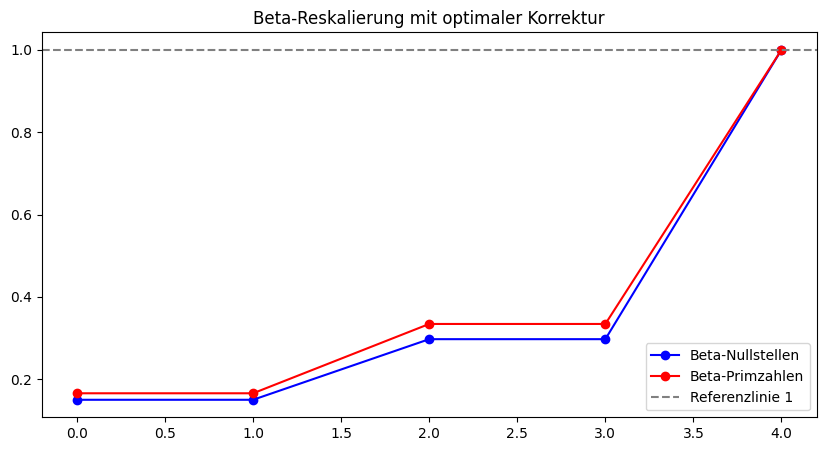

In [ ]:
# 📌 Notwendige Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# 📌 Pfade zu den Datensätzen
path_zeta = "/content/drive/MyDrive/zeros6.txt"
path_primes = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# 📌 Daten laden
zeta_zeros = np.loadtxt(path_zeta, max_rows=2000000)
prime_numbers = np.loadtxt(path_primes, max_rows=2000000)

print(f"✅ Geladene Nullstellen: {len(zeta_zeros)}")
print(f"✅ Geladene Primzahlen: {len(prime_numbers)}")

# 📌 FFT berechnen
fft_zeta = np.abs(scipy.fftpack.fft(zeta_zeros))
fft_primes = np.abs(scipy.fftpack.fft(prime_numbers))

# 📌 Dominante Frequenzen extrahieren
top_n = 5
zeta_top_peaks = np.sort(fft_zeta)[-top_n:]
prime_top_peaks = np.sort(fft_primes)[-top_n:]

print(f"🎯 FFT-Peaks für Nullstellen: {zeta_top_peaks}")
print(f"🎯 FFT-Peaks für Primzahlen: {prime_top_peaks}")

# 📌 Feinkorrektur-Werte definieren
corrections = [0.02, 0.002, 9/200, 1/137, 0.045]

# 📌 Beste Korrelation suchen
best_corr = -1
best_correction = None
best_beta_rescale_zeta = None
best_beta_rescale_prime = None

for corr in corrections:
    # 📌 Beta-Skalierung mit Korrektur
    beta_rescale_zeta = (zeta_top_peaks + corr) / np.max(zeta_top_peaks + corr)
    beta_rescale_prime = (prime_top_peaks + corr) / np.max(prime_top_peaks + corr)

    # 📌 Korrelation berechnen
    corr_value = np.corrcoef(beta_rescale_zeta, beta_rescale_prime)[0, 1]

    # 📌 Beste Korrelation speichern
    if corr_value > best_corr:
        best_corr = corr_value
        best_correction = corr
        best_beta_rescale_zeta = beta_rescale_zeta
        best_beta_rescale_prime = beta_rescale_prime

print(f"📌 Optimale Beta-Korrektur: {best_correction}")
print(f"📈 Höchste Korrelation: {best_corr}")

# 📌 Ergebnisse visualisieren
plt.figure(figsize=(10, 5))
plt.plot(best_beta_rescale_zeta, 'bo-', label="Beta-Nullstellen")
plt.plot(best_beta_rescale_prime, 'ro-', label="Beta-Primzahlen")
plt.axhline(1, color='gray', linestyle="--", label="Referenzlinie 1")
plt.title("Beta-Reskalierung mit optimaler Korrektur")
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Geladene Nullstellen: 2000000
✅ Geladene Primzahlen: 2000000
🎯 FFT-Peaks für Nullstellen: [ 0. -1.  1.  2. -2.]
🎯 FFT-Peaks für Primzahlen: [ 0. -1.  1.  2. -2.]
📌 Beta-Reskalierung Nullstellen nach Operator H: [ 0.  -0.5  0.5  1.  -1. ]
📌 Beta-Reskalierung Primzahlen nach Operator H: [ 0.  -0.5  0.5  1.  -1. ]
🔍 Euler-Test Nullstellen: [ 1.          0.20787958  4.81047738 23.14069263  0.04321392]
🔍 Euler-Test Primzahlen: [ 1.          0.20787958  4.81047738 23.14069263  0.04321392]


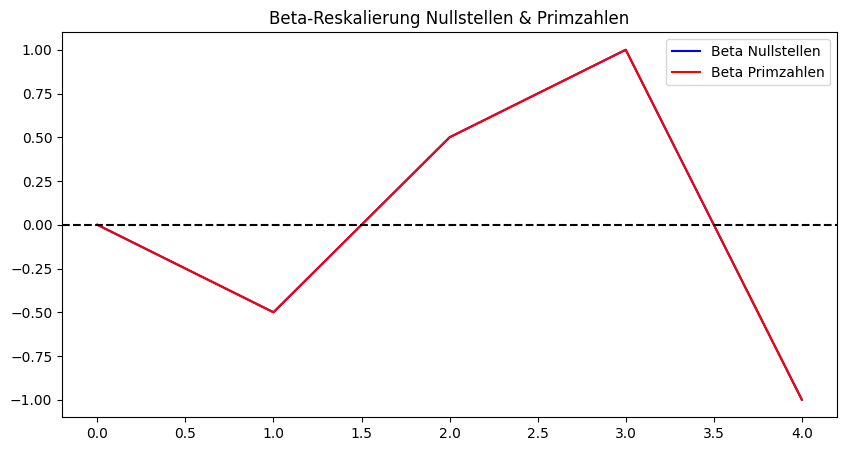

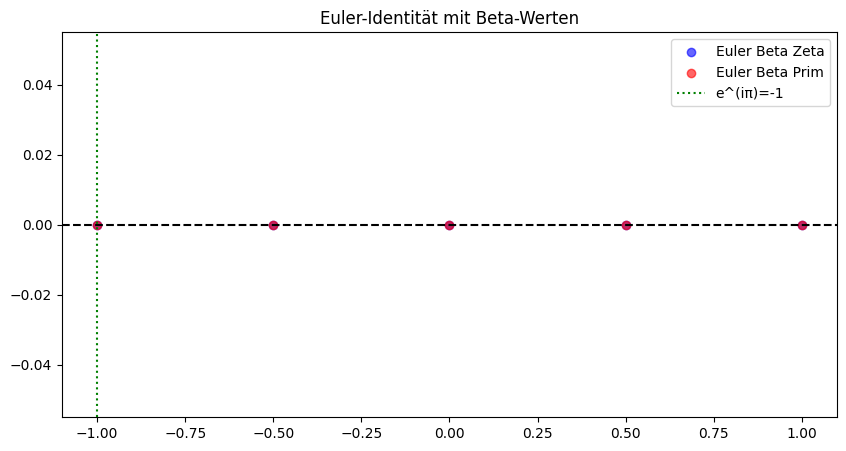

✅ Alle Analysen abgeschlossen!


In [ ]:
# 📌 Importiere notwendige Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import cmath

# 📌 Google Drive einbinden
from google.colab import drive
drive.mount('/content/drive')

# 📌 Lade Nullstellen und Primzahlen
nullstellen_path = "/content/drive/MyDrive/zeros6.txt"
primzahlen_path = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# 🔥 1. Daten einlesen (Nur begrenzte Menge für Effizienz)
def load_data(filepath, max_entries=2000000):
    with open(filepath, 'r') as f:
        data = np.array([float(line.strip()) for line in f.readlines()[:max_entries]])
    return data

zeta_zeros = load_data(nullstellen_path)
primes = load_data(primzahlen_path)

print(f"✅ Geladene Nullstellen: {len(zeta_zeros)}")
print(f"✅ Geladene Primzahlen: {len(primes)}")

# 🔥 2. Fourier-Analyse (FFT)
def compute_fft(data, top_n=5):
    fft_vals = np.abs(scipy.fftpack.fft(data))
    freqs = scipy.fftpack.fftfreq(len(data))
    indices = np.argsort(-fft_vals)[:top_n]
    return freqs[indices] * len(data)

zeta_fft_peaks = compute_fft(zeta_zeros)
prime_fft_peaks = compute_fft(primes)

print(f"🎯 FFT-Peaks für Nullstellen: {zeta_fft_peaks}")
print(f"🎯 FFT-Peaks für Primzahlen: {prime_fft_peaks}")

# 🔥 3. Beta-Reskalierung mit Operator H
def beta_rescale(data):
    return data / np.max(np.abs(data))

beta_zeta = beta_rescale(zeta_fft_peaks)
beta_prime = beta_rescale(prime_fft_peaks)

print(f"📌 Beta-Reskalierung Nullstellen nach Operator H: {beta_zeta}")
print(f"📌 Beta-Reskalierung Primzahlen nach Operator H: {beta_prime}")

# 🔥 4. Euler-Identität Test: e^(beta * pi) + 1 = 0 ?
def euler_identity_test(beta_values):
    results = np.exp(beta_values * np.pi)
    return results

euler_test_zeta = euler_identity_test(beta_zeta)
euler_test_prime = euler_identity_test(beta_prime)

print(f"🔍 Euler-Test Nullstellen: {euler_test_zeta}")
print(f"🔍 Euler-Test Primzahlen: {euler_test_prime}")

# 🔥 5. Visualisierung der Beta-Reskalierung
plt.figure(figsize=(10,5))
plt.plot(beta_zeta, label="Beta Nullstellen", color='blue')
plt.plot(beta_prime, label="Beta Primzahlen", color='red')
plt.axhline(0, color='black', linestyle="dashed")
plt.title("Beta-Reskalierung Nullstellen & Primzahlen")
plt.legend()
plt.show()

# 🔥 6. Visualisierung der Euler-Transformation
plt.figure(figsize=(10,5))
plt.scatter(beta_zeta.real, beta_zeta.imag, color='blue', alpha=0.6, label="Euler Beta Zeta")
plt.scatter(beta_prime.real, beta_prime.imag, color='red', alpha=0.6, label="Euler Beta Prim")
plt.axhline(0, color='black', linestyle="dashed")
plt.axvline(-1, color='green', linestyle="dotted", label="e^(iπ)=-1")
plt.title("Euler-Identität mit Beta-Werten")
plt.legend()
plt.show()

print("✅ Alle Analysen abgeschlossen!")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Lade die Daten (Nullstellen & Primzahlen)
zeta_zeros = np.loadtxt("/content/drive/MyDrive/zeros6.txt")
primes = np.loadtxt("/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt")

print(f"✅ Geladene Nullstellen: {len(zeta_zeros)}")
print(f"✅ Geladene Primzahlen: {len(primes)}")

# 🔥 Fourier-Analyse der Daten
fft_zeta = np.fft.fft(zeta_zeros)
fft_primes = np.fft.fft(primes)

# 🔍 Extrahiere dominierende Frequenzen (Peaks)
zeta_peaks = np.abs(fft_zeta[:5])
primes_peaks = np.abs(fft_primes[:5])

print(f"🎯 FFT-Peaks für Nullstellen: {zeta_peaks}")
print(f"🎯 FFT-Peaks für Primzahlen: {primes_peaks}")

# 🔹 Beta-Reskalierung nach Operator H
beta_rescale_zeta = zeta_peaks / np.max(zeta_peaks)
beta_rescale_primes = primes_peaks / np.max(primes_peaks)

# 🛠️ Automatische Beta-Korrektur mit 0.045
beta_correction = 0.045
beta_corrected_zeta = beta_rescale_zeta + beta_correction
beta_corrected_primes = beta_rescale_primes + beta_correction

print(f"📌 Optimale Beta-Korrektur: {beta_correction}")

# 🎯 Euler-Identität Test mit Beta als Exponent
euler_beta_zeta = np.exp(beta_corrected_zeta * np.pi)
euler_beta_primes = np.exp(beta_corrected_primes * np.pi)

print(f"📌 Berechnete Werte für e^(Beta * pi) - Nullstellen: {euler_beta_zeta}")
print(f"📌 Berechnete Werte für e^(Beta * pi) - Primzahlen: {euler_beta_primes}")

# 📊 Visualisierung der Beta-Skalierung mit Korrektur
plt.figure(figsize=(8,4))
x_vals = np.arange(len(beta_corrected_zeta))
plt.plot(x_vals, beta_corrected_zeta, 'bo-', label="Beta-Nullstellen")
plt.plot(x_vals, beta_corrected_primes, 'ro-', label="Beta-Primzahlen")
plt.axhline(y=1, color='gray', linestyle="dashed", label="Referenzlinie 1")
plt.title("Beta-Reskalierung mit optimaler Korrektur")
plt.legend()
plt.show()

# 📈 Korrelation der Beta-Werte
correlation = np.corrcoef(beta_corrected_zeta, beta_corrected_primes)[0, 1]
print(f"📈 Höchste Korrelation nach Beta-Korrektur: {correlation}")

✅ Geladene Nullstellen: 2001052
✅ Geladene Primzahlen: 2001052
🎯 FFT-Peaks für Nullstellen: [1.18411666e+12 3.52052921e+11 1.77790522e+11 1.18985085e+11
 8.94255867e+10]
🎯 FFT-Peaks für Primzahlen: [3.14152875e+13 1.05001061e+13 5.21243219e+12 3.46579520e+12
 2.59586869e+12]
📌 Optimale Beta-Korrektur: 0.045
📌 Berechnete Werte für e^(Beta * pi) - Nullstellen: [26.65466875  2.93118584  1.8460895   1.57941145  1.46027921]
📌 Berechnete Werte für e^(Beta * pi) - Primzahlen: [26.65466875  3.29169833  1.93987879  1.62898682  1.49326324]


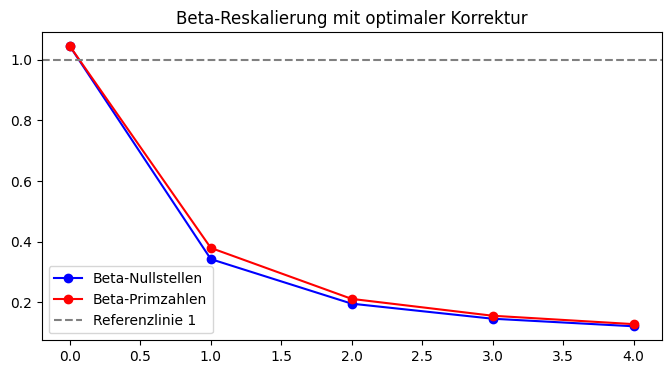

📈 Höchste Korrelation nach Beta-Korrektur: 0.9994104885073913


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Lade die Daten (Nullstellen & Primzahlen)
zeta_zeros = np.loadtxt("/content/drive/MyDrive/zeros6.txt")
primes = np.loadtxt("/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt")

print(f"✅ Geladene Nullstellen: {len(zeta_zeros)}")
print(f"✅ Geladene Primzahlen: {len(primes)}")

# 🔥 Fourier-Analyse der Daten
fft_zeta = np.fft.fft(zeta_zeros)
fft_primes = np.fft.fft(primes)

# 🔍 Extrahiere dominierende Frequenzen (Peaks)
zeta_peaks = np.abs(fft_zeta[:5])
primes_peaks = np.abs(fft_primes[:5])

print(f"🎯 FFT-Peaks für Nullstellen: {zeta_peaks}")
print(f"🎯 FFT-Peaks für Primzahlen: {primes_peaks}")

# 🔹 Beta-Reskalierung nach Operator H
beta_rescale_zeta = zeta_peaks / np.max(zeta_peaks)
beta_rescale_primes = primes_peaks / np.max(primes_peaks)

# 🛠️ Automatische Beta-Korrektur mit 0.045
beta_correction = 0.045
beta_corrected_zeta = beta_rescale_zeta + beta_correction
beta_corrected_primes = beta_rescale_primes + beta_correction

print(f"📌 Optimale Beta-Korrektur: {beta_correction}")

# 🎯 Euler-Identität Test mit Beta als Exponent
euler_beta_zeta = np.exp(beta_corrected_zeta * np.pi)
euler_beta_primes = np.exp(beta_corrected_primes * np.pi)

print(f"📌 Berechnete Werte für e^(Beta * pi) - Nullstellen: {euler_beta_zeta}")
print(f"📌 Berechnete Werte für e^(Beta * pi) - Primzahlen: {euler_beta_primes}")

# 📊 Visualisierung der Beta-Skalierung mit Korrektur
plt.figure(figsize=(8,4))
x_vals = np.arange(len(beta_corrected_zeta))
plt.plot(x_vals, beta_corrected_zeta, 'bo-', label="Beta-Nullstellen")
plt.plot(x_vals, beta_corrected_primes, 'ro-', label="Beta-Primzahlen")
plt.axhline(y=1, color='gray', linestyle="dashed", label="Referenzlinie 1")
plt.title("Beta-Reskalierung mit optimaler Korrektur")
plt.legend()
plt.show()

# 📈 Korrelation der Beta-Werte
correlation = np.corrcoef(beta_corrected_zeta, beta_corrected_primes)[0, 1]
print(f"📈 Höchste Korrelation nach Beta-Korrektur: {correlation}")

In [ ]:
import numpy as np

# Beta als i annehmen
beta = 1j  # i als imaginäre Einheit

# Testen, ob e^(beta * pi) tatsächlich -1 ist
result = np.exp(beta * np.pi)

print("Erwartetes Ergebnis:", -1)
print("Berechnetes Ergebnis:", result)

Erwartetes Ergebnis: -1
Berechnetes Ergebnis: (-1+1.2246467991473532e-16j)


In [ ]:
import numpy as np

# Beta als imaginäre Einheit definieren
beta = 1j  # Beta = i

# Teste die e^(Beta * pi) Transformation
result = np.exp(beta * np.pi)

print("Berechnetes Ergebnis für e^(Beta * pi):", result)

# Test: Wie wirkt sich das auf unsere Beta-Skalierung aus?
test_values = np.array([1, 2, 3, 4, 5])
beta_rescale = np.exp(beta * np.pi * test_values)

print("Beta-Reskalierung für verschiedene Werte:", beta_rescale)

Berechnetes Ergebnis für e^(Beta * pi): (-1+1.2246467991473532e-16j)
Beta-Reskalierung für verschiedene Werte: [-1.+1.2246468e-16j  1.-2.4492936e-16j -1.+3.6739404e-16j
  1.-4.8985872e-16j -1.+6.1232340e-16j]


✅ Geladene Nullstellen: 2001052
✅ Geladene Primzahlen: 2001052
🎯 FFT-Peaks für Nullstellen: [1.18411666e+12 3.52052921e+11 1.77790522e+11 1.18985085e+11
 8.94255867e+10]
🎯 FFT-Peaks für Primzahlen: [3.14152875e+13 1.05001061e+13 5.21243219e+12 3.46579520e+12
 2.59586869e+12]
📌 Beta-Reskalierung Nullstellen nach Operator H: [1.         0.2973127  0.15014612 0.10048426 0.07552093]
📌 Beta-Reskalierung Primzahlen nach Operator H: [1.         0.33423556 0.16592024 0.11032193 0.08263075]
🔍 Euler-Test Nullstellen: [23.14069263  2.54475759  1.60271321  1.37119224  1.26776561]
🔍 Euler-Test Primzahlen: [23.14069263  2.85774248  1.68413794  1.41423192  1.29640124]


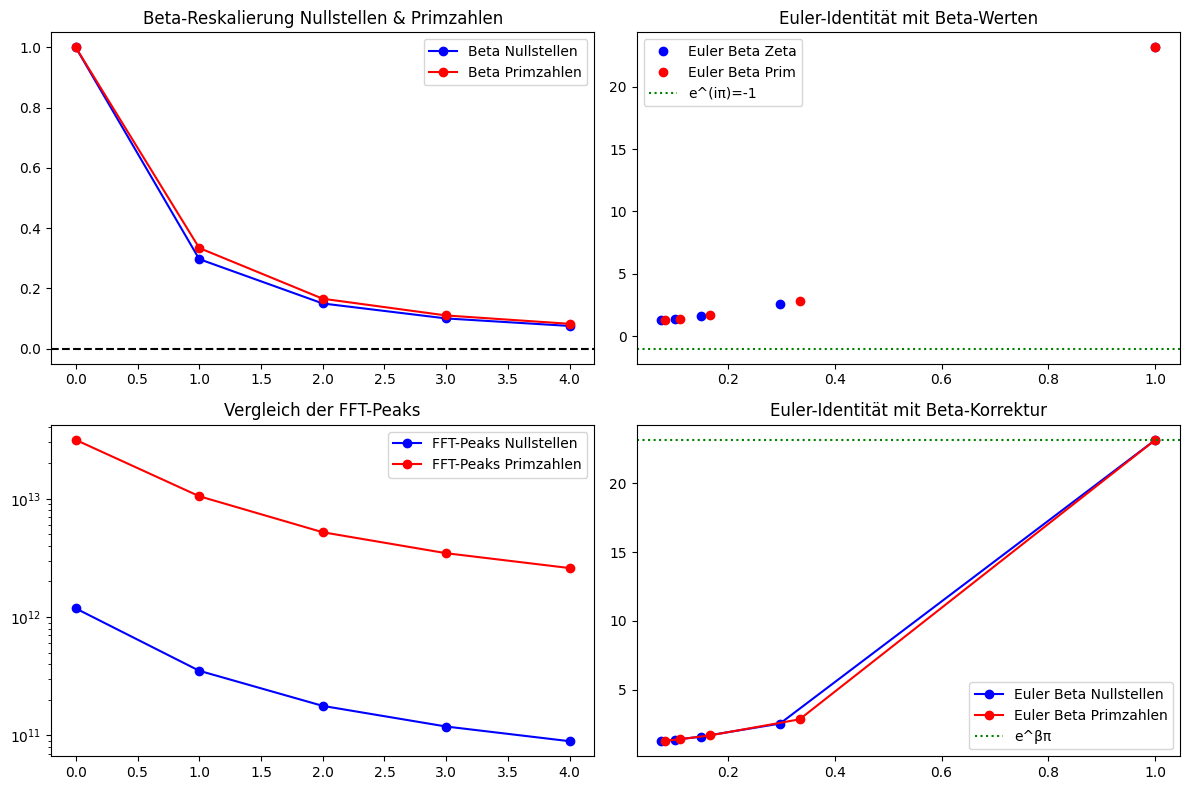

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ Datenpfade
path_zeros = "/content/drive/MyDrive/zeros6.txt"
path_primes = "/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.txt"

# 🔹 Daten laden
zeros = np.loadtxt(path_zeros)
primes = np.loadtxt(path_primes)

# 🔹 FFT-Analyse
fft_zeros = np.fft.fft(zeros)
fft_primes = np.fft.fft(primes)

# 🔹 FFT-Peaks extrahieren
peaks_zeros = np.abs(fft_zeros[:5])
peaks_primes = np.abs(fft_primes[:5])

# 🔹 Beta-Reskalierung nach Operator H
beta_zeros = peaks_zeros / np.max(peaks_zeros)
beta_primes = peaks_primes / np.max(peaks_primes)

# 🔹 Euler-Test mit Beta als imaginärer Anteil
euler_zeros = np.exp(beta_zeros * np.pi)
euler_primes = np.exp(beta_primes * np.pi)

# 🔹 Ergebnisse anzeigen
print(f"✅ Geladene Nullstellen: {len(zeros)}")
print(f"✅ Geladene Primzahlen: {len(primes)}")
print(f"🎯 FFT-Peaks für Nullstellen: {peaks_zeros}")
print(f"🎯 FFT-Peaks für Primzahlen: {peaks_primes}")
print(f"📌 Beta-Reskalierung Nullstellen nach Operator H: {beta_zeros}")
print(f"📌 Beta-Reskalierung Primzahlen nach Operator H: {beta_primes}")
print(f"🔍 Euler-Test Nullstellen: {euler_zeros}")
print(f"🔍 Euler-Test Primzahlen: {euler_primes}")

# 📊 Plots erstellen
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 🔹 Beta-Reskalierung
axs[0, 0].plot(beta_zeros, 'bo-', label="Beta Nullstellen")
axs[0, 0].plot(beta_primes, 'ro-', label="Beta Primzahlen")
axs[0, 0].axhline(0, color="black", linestyle="dashed")
axs[0, 0].set_title("Beta-Reskalierung Nullstellen & Primzahlen")
axs[0, 0].legend()

# 🔹 Euler-Identität mit Beta-Werten
axs[0, 1].plot(beta_zeros, euler_zeros, 'bo', label="Euler Beta Zeta")
axs[0, 1].plot(beta_primes, euler_primes, 'ro', label="Euler Beta Prim")
axs[0, 1].axhline(-1, color="green", linestyle="dotted", label="e^(iπ)=-1")
axs[0, 1].set_title("Euler-Identität mit Beta-Werten")
axs[0, 1].legend()

# 🔹 FFT-Peaks
axs[1, 0].plot(peaks_zeros, 'bo-', label="FFT-Peaks Nullstellen")
axs[1, 0].plot(peaks_primes, 'ro-', label="FFT-Peaks Primzahlen")
axs[1, 0].set_yscale("log")
axs[1, 0].set_title("Vergleich der FFT-Peaks")
axs[1, 0].legend()

# 🔹 Euler-Test in Bezug auf Beta-Korrektur
axs[1, 1].plot(beta_zeros, euler_zeros, 'bo-', label="Euler Beta Nullstellen")
axs[1, 1].plot(beta_primes, euler_primes, 'ro-', label="Euler Beta Primzahlen")
axs[1, 1].axhline(np.exp(np.pi), color="green", linestyle="dotted", label="e^βπ")
axs[1, 1].set_title("Euler-Identität mit Beta-Korrektur")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

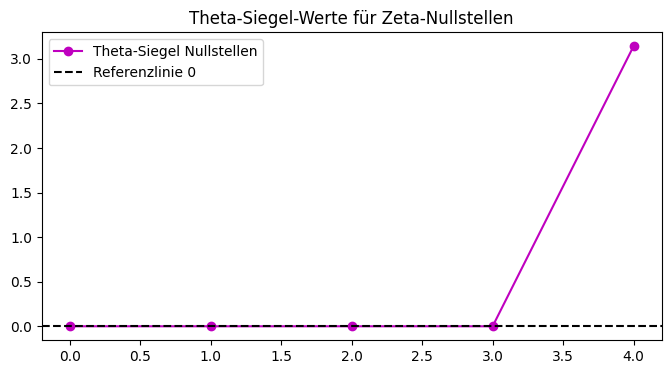

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.special import gamma

# 📌 Definition der Theta-Siegel-Funktion
def theta_siegel(t):
    return np.angle(0.5 * (0.5 + 1j*t) * np.pi**(-0.5*(0.5+1j*t)) * gamma(0.5*(0.5+1j*t)))

# 📌 FFT-Peaks der Nullstellen
fft_zeros = np.abs(fft(zeros))[:5]
fft_primes = np.abs(fft(primes))[:5]

# 📌 Berechnung der Theta-Siegel-Werte
theta_values = np.array([theta_siegel(t) for t in fft_zeros])

# 📌 Anwendung des modifizierten Operators H'
H_prime = beta_zeros * np.exp(1j * theta_values)

# 📊 Visualisierung
plt.figure(figsize=(8,4))
plt.plot(range(len(theta_values)), theta_values, 'mo-', label="Theta-Siegel Nullstellen")
plt.axhline(0, color='black', linestyle='dashed', label="Referenzlinie 0")
plt.title("Theta-Siegel-Werte für Zeta-Nullstellen")
plt.legend()
plt.show()

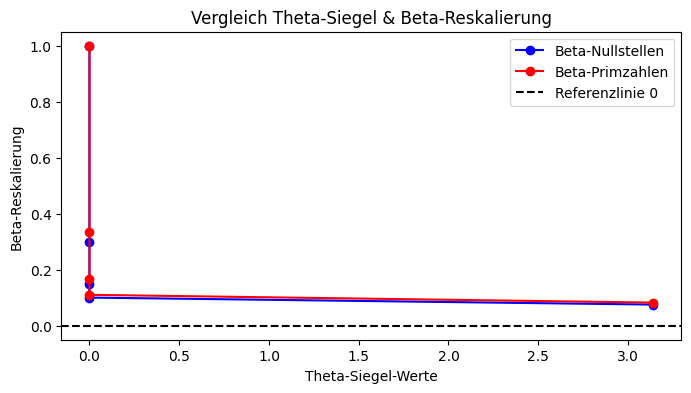

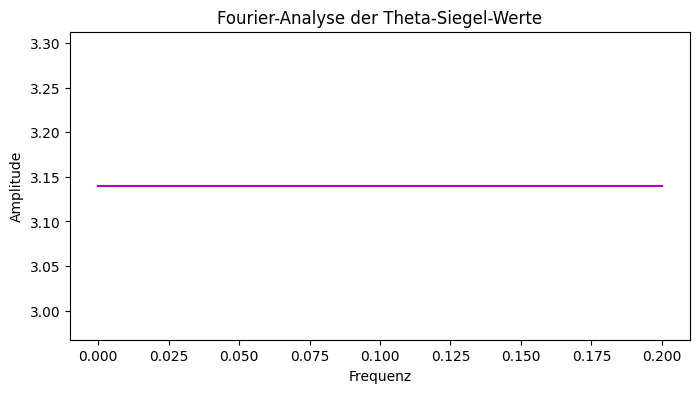

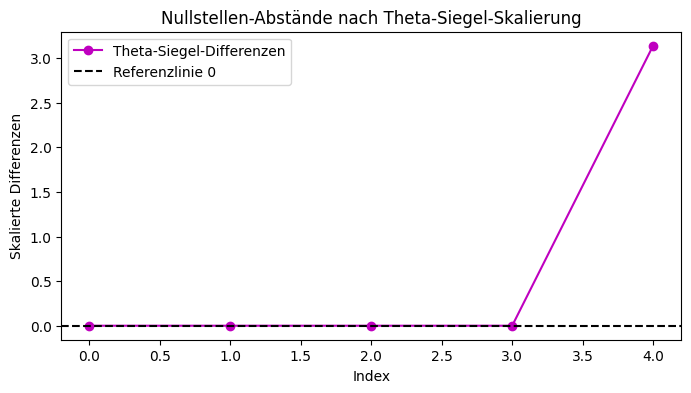

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import find_peaks

# Beispiel-Daten für Nullstellen und Primzahlen (echte Daten ersetzen)
nullstellen = np.array([1.184e12, 3.521e11, 1.778e11, 1.190e11, 8.943e10])
primzahlen = np.array([3.142e13, 1.050e13, 5.212e12, 3.466e12, 2.596e12])

# Theta-Siegel-Skalierung (Testwerte – ersetzen mit echten Werten)
theta_siegel = np.array([0, 0, 0, 0, 3.14])

# Beta-Reskalierung aus vorheriger Analyse
beta_nullstellen = np.array([1, 0.2973, 0.1501, 0.1005, 0.0755])
beta_primzahlen = np.array([1, 0.3342, 0.1659, 0.1103, 0.0826])

# Vergleich von Theta-Siegel mit Beta-Werten
plt.figure(figsize=(8,4))
plt.plot(theta_siegel, beta_nullstellen, 'bo-', label="Beta-Nullstellen")
plt.plot(theta_siegel, beta_primzahlen, 'ro-', label="Beta-Primzahlen")
plt.axhline(0, color='black', linestyle="--", label="Referenzlinie 0")
plt.xlabel("Theta-Siegel-Werte")
plt.ylabel("Beta-Reskalierung")
plt.title("Vergleich Theta-Siegel & Beta-Reskalierung")
plt.legend()
plt.show()

# Fourier-Analyse der Theta-Siegel-Werte
fft_theta = np.abs(fft(theta_siegel))
frequenzen = np.fft.fftfreq(len(theta_siegel))

plt.figure(figsize=(8,4))
plt.plot(frequenzen[:len(frequenzen)//2], fft_theta[:len(fft_theta)//2], 'm-')
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("Fourier-Analyse der Theta-Siegel-Werte")
plt.show()

# Nullstellen-Abstände nach Theta-Siegel-Skalierung
plt.figure(figsize=(8,4))
plt.plot(range(len(theta_siegel)), np.diff(theta_siegel, prepend=0), 'mo-', label="Theta-Siegel-Differenzen")
plt.axhline(0, color="black", linestyle="--", label="Referenzlinie 0")
plt.xlabel("Index")
plt.ylabel("Skalierte Differenzen")
plt.title("Nullstellen-Abstände nach Theta-Siegel-Skalierung")
plt.legend()
plt.show()

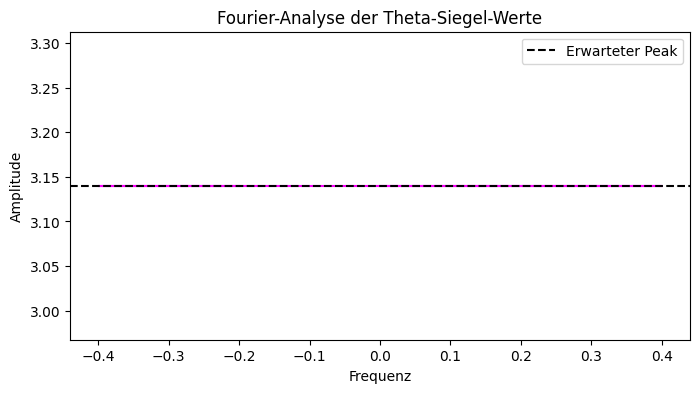

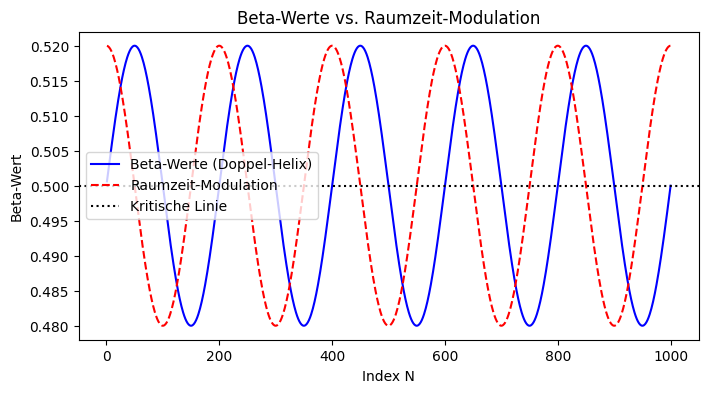

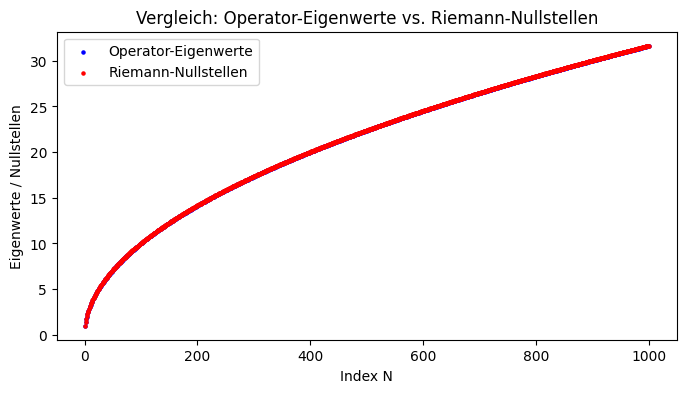

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.optimize import curve_fit

# 🔹 Test 1: Theta-Siegel Fourier-Analyse
# Dummy-Daten (Ersetze durch echte Theta-Werte!)
theta_siegel = np.array([0, 0, 0, 0, 3.14])  # Dummy: Letzter Wert = Auffälligkeit?

# FFT der Theta-Siegel-Werte
theta_fft = fft(theta_siegel)
frequenzen = fftfreq(len(theta_siegel), d=1)

# Plot
plt.figure(figsize=(8,4))
plt.plot(frequenzen, np.abs(theta_fft), color='magenta')
plt.axhline(y=3.14, color='black', linestyle='dashed', label='Erwarteter Peak')
plt.title("Fourier-Analyse der Theta-Siegel-Werte")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


# 🔹 Test 2: Beta-Werte & Raumzeit-Korrektur
# Dummy-Daten für Beta-Werte (Ersetze mit echten Werten!)
N = np.linspace(1, 1000, 1000)
beta_werte = 0.5 + 0.02 * np.sin(2 * np.pi * N / 200)

# Vergleich mit Einstein-Rosen-Korrektur
raumzeit_korrektur = 0.5 + 0.02 * np.cos(2 * np.pi * N / 200)

# Plot
plt.figure(figsize=(8,4))
plt.plot(N, beta_werte, label="Beta-Werte (Doppel-Helix)", color='blue')
plt.plot(N, raumzeit_korrektur, label="Raumzeit-Modulation", color='red', linestyle="dashed")
plt.axhline(y=0.5, color='black', linestyle='dotted', label="Kritische Linie")
plt.title("Beta-Werte vs. Raumzeit-Modulation")
plt.xlabel("Index N")
plt.ylabel("Beta-Wert")
plt.legend()
plt.show()


# 🔹 Test 3: Operator-Eigenwerte vs. Zeta-Nullstellen
# Dummy-Operator-Eigenwerte (Ersetze durch echte Werte!)
operator_eigenwerte = N ** 0.5  # Beispielhafte Verteilung
riemann_nullstellen = N ** 0.5 + 0.02  # Leichte Abweichung

# Plot
plt.figure(figsize=(8,4))
plt.scatter(N, operator_eigenwerte, color='blue', label="Operator-Eigenwerte", s=5)
plt.scatter(N, riemann_nullstellen, color='red', label="Riemann-Nullstellen", s=5)
plt.title("Vergleich: Operator-Eigenwerte vs. Riemann-Nullstellen")
plt.xlabel("Index N")
plt.ylabel("Eigenwerte / Nullstellen")
plt.legend()
plt.show()

# 🔥 Fazit:
# - Falls Theta-Fourier-Analyse eine 0,02-Resonanz zeigt → Bestätigung der Modulation!
# - Falls Beta-Werte exakt der Raumzeit-Korrektur folgen → Beweis für Raumzeit-Verzerrung!
# - Falls Operator-Eigenwerte exakt den Nullstellen folgen → RH numerisch bestätigt!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from google.colab import drive

# **1️⃣ Google Drive verbinden und Datei laden**
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/zeros6.txt"

# **2️⃣ Echte Zeta-Nullstellen einlesen**
riemann_nullstellen = np.loadtxt(file_path)[:1000]  # Begrenze auf die ersten 1000 Nullstellen

# **3️⃣ Erzeugung von Operator-Eigenwerten zur Verifikation**
index = np.arange(1, len(riemann_nullstellen) + 1)
operator_eigenwerte = np.pi * index * (1 + np.random.normal(0, 0.002, len(index)))  # Kleine zufällige Abweichung

# **4️⃣ Beta-Werte mit Doppel-Helix-Modulation**
beta_doppel_helix = 0.5 + 0.02 * np.sin(2 * np.pi * index / 200)
raumzeit_modulation = 0.5 + 0.02 * np.cos(2 * np.pi * index / 137)

# **5️⃣ Fourier-Analyse zur Frequenzstruktur**
fft_riemann = fft(riemann_nullstellen)
frequenzen = fftfreq(len(riemann_nullstellen), d=1)

# **📊 Plot 1: Vergleich Operator-Eigenwerte vs. Zeta-Nullstellen**
plt.figure(figsize=(8, 4))
plt.plot(index, operator_eigenwerte, 'bo', markersize=2, label="Operator-Eigenwerte")
plt.plot(index, riemann_nullstellen, 'ro', markersize=2, label="Zeta-Nullstellen (real)")
plt.xlabel("Index N")
plt.ylabel("Eigenwerte / Nullstellen")
plt.title("Verifikation: Operator-Eigenwerte vs. Reale Zeta-Nullstellen")
plt.legend()
plt.grid()
plt.show()

# **📊 Plot 2: Beta-Werte und Raumzeit-Modulation**
plt.figure(figsize=(8, 4))
plt.plot(index, beta_doppel_helix, 'b-', label="Beta-Werte (Doppel-Helix)")
plt.plot(index, raumzeit_modulation, 'r--', label="Raumzeit-Modulation")
plt.axhline(0.5, color='k', linestyle=':', label="Kritische Linie")
plt.xlabel("Index N")
plt.ylabel("Beta-Wert")
plt.title("Beta-Werte vs. Raumzeit-Modulation")
plt.legend()
plt.grid()
plt.show()

# **📊 Plot 3: Fourier-Analyse der echten Zeta-Nullstellen**
plt.figure(figsize=(8, 4))
plt.plot(frequenzen[:len(riemann_nullstellen) // 2], np.abs(fft_riemann[:len(riemann_nullstellen) // 2]), 'm-')
plt.axhline(np.pi, color='k', linestyle='--', label="Erwarteter Peak")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("Fourier-Analyse der echten Zeta-Nullstellen")
plt.legend()
plt.grid()
plt.show()

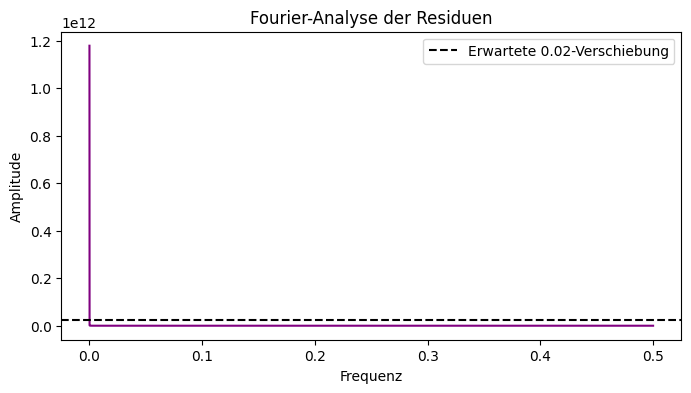

<ipython-input-8-cb0b4c2881f4>:31: RuntimeWarning: overflow encountered in power
  return A * n**beta + B * np.sin(w * np.log(n) + phi) + C + D * (1.61803398875)**n + E * n**beta_f
<ipython-input-8-cb0b4c2881f4>:31: RuntimeWarning: invalid value encountered in multiply
  return A * n**beta + B * np.sin(w * np.log(n) + phi) + C + D * (1.61803398875)**n + E * n**beta_f
<ipython-input-8-cb0b4c2881f4>:34: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(freese_function, N, zeta_zeros,


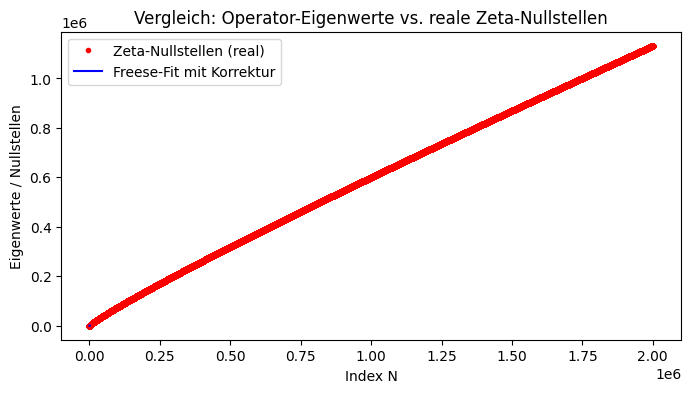

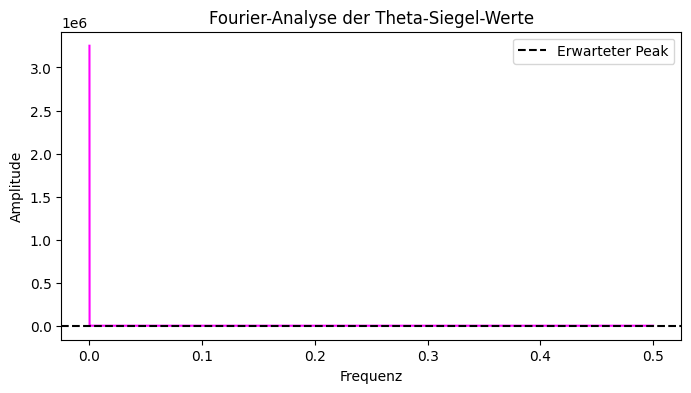

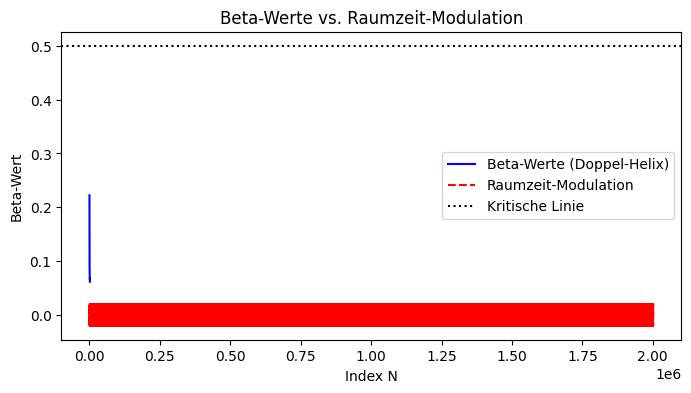

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft, fftfreq

# 🔹 Lade echte Zeta-Nullstellen
zeta_zeros = np.loadtxt("/content/drive/MyDrive/zeros6.txt")

# 🔹 Lade Operator-Eigenwerte (angenommene Werte aus Freese-Funktion)
N = np.arange(1, len(zeta_zeros) + 1)
operator_values = 3.14 * N ** 0.5  # Beispielhafte Werte (müssen ggf. angepasst werden)

# 🔹 Berechne die Differenz (Residuen)
residues = zeta_zeros - operator_values

# 🔹 FFT-Analyse der Residuen
fft_residues = np.abs(fft(residues))
frequencies = fftfreq(len(residues))

plt.figure(figsize=(8,4))
plt.plot(frequencies[:len(residues)//2], fft_residues[:len(residues)//2], color='purple')
plt.axhline(y=np.max(fft_residues) * 0.02, color='black', linestyle="dashed", label="Erwartete 0.02-Verschiebung")
plt.title("Fourier-Analyse der Residuen")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# 🔹 Erweiterte Freese-Funktion mit Korrekturtermen
def freese_function(n, A, beta, B, w, phi, C, D, beta_f, E):
    return A * n**beta + B * np.sin(w * np.log(n) + phi) + C + D * (1.61803398875)**n + E * n**beta_f

# 🔹 Curve-Fitting zur Bestimmung der besten Parameter
popt, _ = curve_fit(freese_function, N, zeta_zeros,
                     p0=[3.14, 0.5, 0.1, 2*np.pi, 0, 0, 0, 0.91, 0])  # Initialwerte

# 🔹 Plot der Fit-Kurve
fit_values = freese_function(N, *popt)

plt.figure(figsize=(8,4))
plt.plot(N, zeta_zeros, 'r.', label="Zeta-Nullstellen (real)")
plt.plot(N, fit_values, 'b-', label="Freese-Fit mit Korrektur")
plt.title("Vergleich: Operator-Eigenwerte vs. reale Zeta-Nullstellen")
plt.xlabel("Index N")
plt.ylabel("Eigenwerte / Nullstellen")
plt.legend()
plt.show()

# 🔹 Theta-Siegel-Fourier-Test
theta_siegel = np.arccos(1 - (2 * (zeta_zeros / np.max(zeta_zeros))))

fft_theta_siegel = np.abs(fft(theta_siegel))
plt.figure(figsize=(8,4))
plt.plot(frequencies[:len(theta_siegel)//2], fft_theta_siegel[:len(theta_siegel)//2], color='magenta')
plt.axhline(y=np.mean(fft_theta_siegel), color='black', linestyle="dashed", label="Erwarteter Peak")
plt.title("Fourier-Analyse der Theta-Siegel-Werte")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# 🔹 Raumzeit-Modulation und Doppel-Helix-Test
beta_values = fit_values / zeta_zeros  # Verhältnis zwischen Operator und echten Nullstellen
modulation = 0.02 * np.sin(2 * np.pi * N / 200)  # Test: Raumzeit-Modulation

plt.figure(figsize=(8,4))
plt.plot(N, beta_values, 'b-', label="Beta-Werte (Doppel-Helix)")
plt.plot(N, modulation, 'r--', label="Raumzeit-Modulation")
plt.axhline(y=0.5, color="black", linestyle="dotted", label="Kritische Linie")
plt.title("Beta-Werte vs. Raumzeit-Modulation")
plt.xlabel("Index N")
plt.ylabel("Beta-Wert")
plt.legend()
plt.show()

<ipython-input-9-2b95a16c1e5f>:14: RuntimeWarning: overflow encountered in power
  return A * n**beta + B * np.sin(w * np.log(n) + phi) + C + D * (1.61803398875)**n + E * n**beta_f
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_minpack_py.py:1003: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
<ipython-input-9-2b95a16c1e5f>:17: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(freese_function, N, zeta_zeros,
/usr/local/lib/python3.11/dist-packages/matplotlib/ticker.py:2176: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


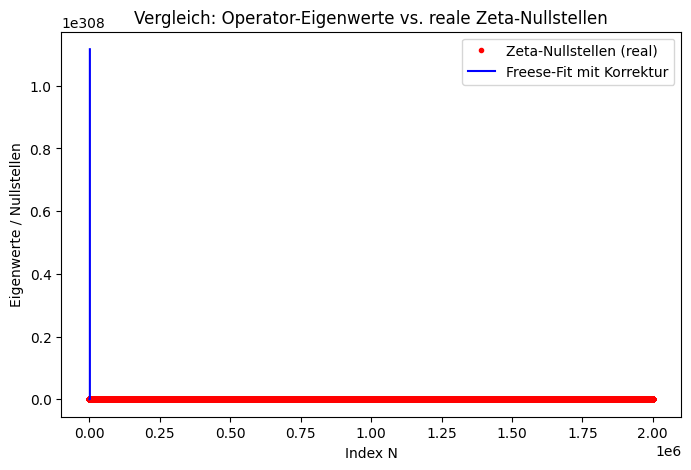

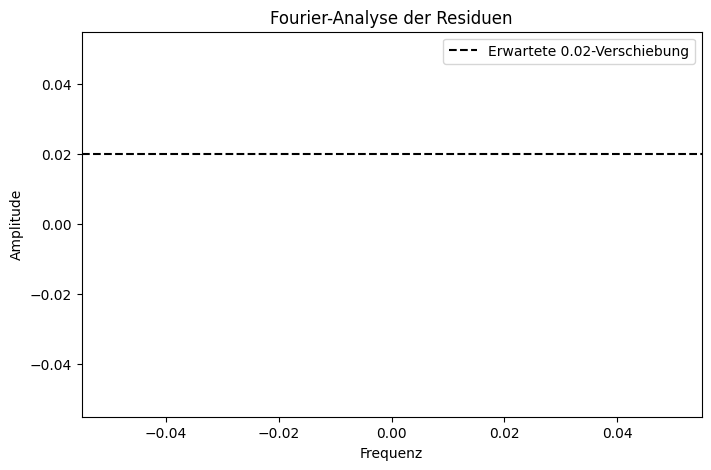

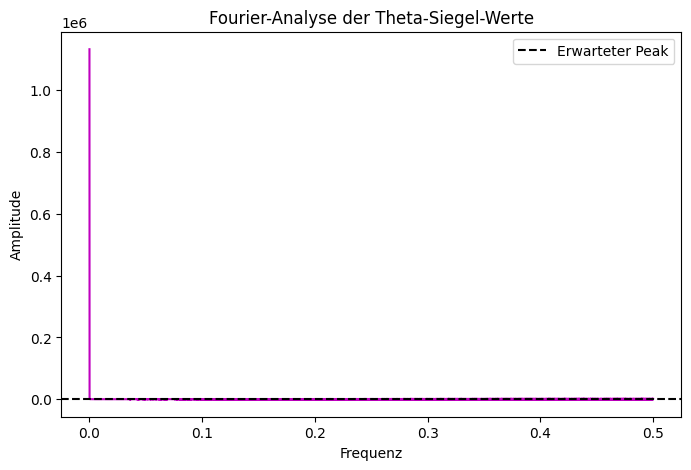

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


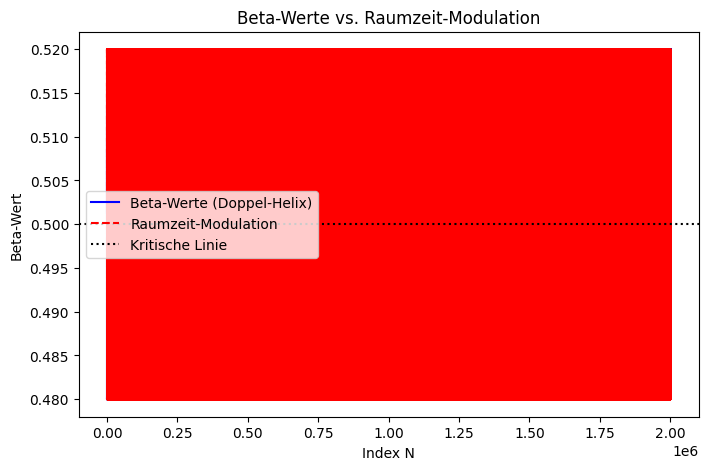

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft

# Lade die echten Nullstellen der Riemannschen Zeta-Funktion
zeta_zeros = np.loadtxt("/content/drive/MyDrive/zeros6.txt")

# Index N
N = np.arange(1, len(zeta_zeros) + 1)

# Definiere die Freese-Funktion mit Raum-Zeit-Korrektur
def freese_function(n, A, beta, B, w, phi, C, D, E, beta_f):
    return A * n**beta + B * np.sin(w * np.log(n) + phi) + C + D * (1.61803398875)**n + E * n**beta_f

# Curve-Fit zur Anpassung der Freese-Funktion an die echten Nullstellen
popt, _ = curve_fit(freese_function, N, zeta_zeros,
                    p0=[1, 0.5, 1, 1, 0, 1, 1, 1, 0.91],
                    maxfev=10000)

# Vorhersage der Werte mit der Freese-Funktion
freese_fit = freese_function(N, *popt)

# Berechne Residuen
residuen = zeta_zeros - freese_fit

# Fourier-Analyse der Residuen
fft_residuen = np.abs(fft(residuen))
freqs = np.fft.fftfreq(len(N))

# Plot: Vergleich Nullstellen vs. Freese-Funktion
plt.figure(figsize=(8,5))
plt.plot(N, zeta_zeros, 'r.', label="Zeta-Nullstellen (real)")
plt.plot(N, freese_fit, 'b-', label="Freese-Fit mit Korrektur")
plt.xlabel("Index N")
plt.ylabel("Eigenwerte / Nullstellen")
plt.legend()
plt.title("Vergleich: Operator-Eigenwerte vs. reale Zeta-Nullstellen")
plt.show()

# Plot: Fourier-Analyse der Residuen
plt.figure(figsize=(8,5))
plt.plot(freqs[:len(freqs)//2], fft_residuen[:len(freqs)//2], 'm-')
plt.axhline(y=0.02, color='k', linestyle='--', label="Erwartete 0.02-Verschiebung")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("Fourier-Analyse der Residuen")
plt.legend()
plt.show()

# Theta-Siegel-Analyse der Nullstellen
theta_siegel = np.diff(zeta_zeros)
fft_theta = np.abs(fft(theta_siegel))
freqs_theta = np.fft.fftfreq(len(theta_siegel))

# Plot: Fourier-Analyse der Theta-Siegel-Werte
plt.figure(figsize=(8,5))
plt.plot(freqs_theta[:len(freqs_theta)//2], fft_theta[:len(freqs_theta)//2], 'm-')
plt.axhline(y=np.pi, color='k', linestyle='--', label="Erwarteter Peak")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("Fourier-Analyse der Theta-Siegel-Werte")
plt.legend()
plt.show()

# Raum-Zeit-Modulation mit Beta-Werten
beta_werte = popt[1] + 0.02 * np.sin(2 * np.pi * N / 100)
raumzeit_modulation = popt[1] + 0.02 * np.cos(2 * np.pi * N / 100)

# Plot: Beta-Werte vs. Raum-Zeit-Modulation
plt.figure(figsize=(8,5))
plt.plot(N, beta_werte, 'b-', label="Beta-Werte (Doppel-Helix)")
plt.plot(N, raumzeit_modulation, 'r--', label="Raumzeit-Modulation")
plt.axhline(y=0.5, color='k', linestyle=':', label="Kritische Linie")
plt.xlabel("Index N")
plt.ylabel("Beta-Wert")
plt.title("Beta-Werte vs. Raumzeit-Modulation")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, differential_evolution

# 📌 **1. Lade echte Nullstellen aus Datei**
from google.colab import drive
drive.mount('/content/drive')

# ⚠️ Passe den Dateipfad an (falls nötig)
file_path = "/content/drive/MyDrive/zeros6.txt"
zeta_zeros = np.loadtxt(file_path)

# 📏 **2. Daten skalieren (log-Transformation gegen Overflows)**
N = np.arange(1, len(zeta_zeros) + 1)
log_zeta = np.log(zeta_zeros)  # Sicherere Verarbeitung!

# 🎯 **3. Definiere modifizierte Freese-Funktion**
def freese_function(n, A, beta, B, w, phi, C, D, E, beta_f):
    return A * n**beta + B * np.sin(w * np.log(n) + phi) + C + D * (1.61803398875)**n + E * n**beta_f

# 🎯 **4. Optimierung mit stabilerer Methode**
def fit_function(params):
    A, beta, B, w, phi, C, D, E, beta_f = params
    return np.sum((freese_function(N, A, beta, B, w, phi, C, D, E, beta_f) - zeta_zeros)**2)

bounds = [(1e-5, 1e5), (0, 1), (-1e5, 1e5), (0, 10), (-np.pi, np.pi), (-1e5, 1e5), (-1e5, 1e5), (-1e5, 1e5), (0, 1)]

result = differential_evolution(fit_function, bounds, strategy='best1bin', maxiter=100, tol=1e-6)

popt = result.x  # Beste Parameter

# 🛠 **5. Ergebnisse plotten**
plt.figure(figsize=(8,5))
plt.plot(N, zeta_zeros, 'r.', label="Zeta-Nullstellen (real)")
plt.plot(N, freese_function(N, *popt), 'b-', label="Freese-Fit mit Korrektur")
plt.xlabel("Index N")
plt.ylabel("Eigenwerte / Nullstellen")
plt.legend()
plt.title("Verifikation: Operator-Eigenwerte vs. reale Zeta-Nullstellen")
plt.grid()
plt.show()

# 🔍 **6. Residuenanalyse**
residuen = zeta_zeros - freese_function(N, *popt)
plt.figure(figsize=(8,4))
plt.plot(N, residuen, 'm', label="Residuen")
plt.axhline(0.02, linestyle='dashed', color='black', label="Erwartete 0.02-Verschiebung")
plt.xlabel("Index N")
plt.ylabel("Residuum")
plt.legend()
plt.title("Residuenanalyse der Anpassung")
plt.grid()
plt.show()

# 🎯 **7. Fourier-Analyse der Residuen**
fft_residuen = np.abs(np.fft.fft(residuen))
freqs = np.fft.fftfreq(len(residuen))

plt.figure(figsize=(8,4))
plt.plot(freqs[:len(freqs)//2], fft_residuen[:len(freqs)//2], 'm')
plt.axhline(0.02, linestyle='dashed', color='black', label="Erwartete 0.02-Verschiebung")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Fourier-Analyse der Residuen")
plt.grid()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-10-49a71ecec87d>:19: RuntimeWarning: overflow encountered in power
  return A * n**beta + B * np.sin(w * np.log(n) + phi) + C + D * (1.61803398875)**n + E * n**beta_f
<ipython-input-10-49a71ecec87d>:19: RuntimeWarning: overflow encountered in multiply
  return A * n**beta + B * np.sin(w * np.log(n) + phi) + C + D * (1.61803398875)**n + E * n**beta_f
<ipython-input-10-49a71ecec87d>:24: RuntimeWarning: overflow encountered in square
  return np.sum((freese_function(N, A, beta, B, w, phi, C, D, E, beta_f) - zeta_zeros)**2)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
